# PROTAC-Degradation-Predictor

In [1]:
import pandas as pd

protac_df = pd.read_csv('../data/PROTAC-Degradation-DB.csv')
protac_df.head()

Compound ID Uniprot                                             Smiles  \
0            1  Q07817  Cc1ncsc1-c1ccc([C@H](C)NC(=O)[C@@H]2C[C@@H](O)...   
1            2  Q07817  Cc1ncsc1-c1ccc([C@H](C)NC(=O)[C@@H]2C[C@@H](O)...   
2            3  Q07817  Cc1ncsc1-c1ccc([C@H](C)NC(=O)[C@@H]2C[C@@H](O)...   
3            4  Q07817  Cc1ncsc1-c1ccc([C@H](C)NC(=O)[C@@H]2C[C@@H](O)...   
4            5  Q07817  Cc1ncsc1-c1ccc([C@H](C)NC(=O)[C@@H]2C[C@@H](O)...   

  E3 Ligase                                              InChI  \
0       VHL  InChI=1S/C73H88ClF3N10O10S4/c1-47(49-13-15-51(...   
1       VHL  InChI=1S/C74H90ClF3N10O10S4/c1-48(50-13-15-52(...   
2       VHL  InChI=1S/C75H92ClF3N10O10S4/c1-49(51-16-18-53(...   
3       VHL  InChI=1S/C76H94ClF3N10O10S4/c1-50(52-17-19-54(...   
4       VHL  InChI=1S/C77H96ClF3N10O10S4/c1-51(53-18-20-55(...   

                     InChI Key  Molecular Weight  Heavy Atom Count  \
0  SXPDUCVNMGMWBJ-FMZBIETASA-N          1486.282               101   
1  HQKUMELJMUNTTF-NMKDNUEVSA-N          1500.309               102   
2  ATQCEJKUPSBDMA-QARNUTPLSA-N          1514.336               103   
3  FNKQAGMHNFFSEI-DTTPTBRMSA-N          1528.363               104   
4  PXVFFBGSTYQHRO-REQIQPEASA-N          1542.390               105   

   Ring Count  Rotatable Bond Count  ...  Name  Assay (DC50/Dmax)  Exact Mass  \
0          10                    24  ...   NaN                NaN         NaN   
1          10                    25  ...   NaN                NaN         NaN   
2          10                    26  ...   NaN                NaN         NaN   
3          10                    27  ...   NaN                NaN         NaN   
4          10                    28  ...   NaN                NaN         NaN   

  XLogP3  Target (Parsed)                                       POI Sequence  \
0    NaN              NaN  MSQSNRELVVDFLSYKLSQKGYSWSQFSDVEENRTEAPEGTESEME...   
1    NaN              NaN  MSQSNRELVVDFLSYKLSQKGYSWSQFSDVEENRTEAPEGTESEME...   
2    NaN              NaN  MSQSNRELVVDFLSYKLSQKGYSWSQFSDVEENRTEAPEGTESEME...   
3    NaN              NaN  MSQSNRELVVDFLSYKLSQKGYSWSQFSDVEENRTEAPEGTESEME...   
4    NaN              NaN  MSQSNRELVVDFLSYKLSQKGYSWSQFSDVEENRTEAPEGTESEME...   

   E3 Ligase Uniprot                                 E3 Ligase Sequence  \
0             P40337  MPRRAENWDEAEVGAEEAGVEEYGPEEDGGEESGAEESGPEESGPE...   
1             P40337  MPRRAENWDEAEVGAEEAGVEEYGPEEDGGEESGAEESGPEESGPE...   
2             P40337  MPRRAENWDEAEVGAEEAGVEEYGPEEDGGEESGAEESGPEESGPE...   
3             P40337  MPRRAENWDEAEVGAEEAGVEEYGPEEDGGEESGAEESGPEESGPE...   
4             P40337  MPRRAENWDEAEVGAEEAGVEEYGPEEDGGEESGAEESGPEESGPE...   

  Cell Line Identifier Active - OR  
0               MOLT-4         NaN  
1               MOLT-4         NaN  
2               MOLT-4         NaN  
3               MOLT-4         NaN  
4               MOLT-4        True  

[5 rows x 35 columns]

In [2]:
import numpy as np

def is_active(DC50: float, Dmax: float, oring=False, pDC50_threshold=7.0, Dmax_threshold=0.8) -> bool:
    """ Check if a PROTAC is active based on DC50 and Dmax.	
    Args:
        DC50(float): DC50 in nM
        Dmax(float): Dmax in %
    Returns:
        bool: True if active, False if inactive, np.nan if either DC50 or Dmax is NaN
    """
    pDC50 = -np.log10(DC50 * 1e-9) if pd.notnull(DC50) else np.nan
    Dmax = Dmax / 100
    if pd.notnull(pDC50):
        if pDC50 < pDC50_threshold:
            return False
    if pd.notnull(Dmax):
        if Dmax < Dmax_threshold:
            return False
    if oring:
        if pd.notnull(pDC50):
            return True if pDC50 >= pDC50_threshold else False
        elif pd.notnull(Dmax):
            return True if Dmax >= Dmax_threshold else False
        else:
            return np.nan
    else:
        if pd.notnull(pDC50) and pd.notnull(Dmax):
            return True if pDC50 >= pDC50_threshold and Dmax >= Dmax_threshold else False
        else:
            return np.nan


# # Add a column for a definition of activivity in which 
# for Dmax_threshold in range(10):
#     for pDC50_threshold in [5 + 0.5 * i for i in range(10)]:
#         protac_df[f'Active (Dmax {round(Dmax_threshold * 0.1, 1)}, pDC50 {round(pDC50_threshold, 1)})'] = protac_df.apply(
#             lambda x: is_active(x['DC50 (nM)'], x['Dmax (%)'], pDC50_threshold=pDC50_threshold, Dmax_threshold=Dmax_threshold * 0.1), axis=1
#         )
#         num_active = protac_df[f'Active (Dmax {round(Dmax_threshold * 0.1, 1)}, pDC50 {round(pDC50_threshold, 1)})'].value_counts()
#         num_nans = protac_df[f'Active (Dmax {round(Dmax_threshold * 0.1, 1)}, pDC50 {round(pDC50_threshold, 1)})'].isnull().sum()
#         total = len(protac_df[f'Active (Dmax {round(Dmax_threshold * 0.1, 1)}, pDC50 {round(pDC50_threshold, 1)})'])
#         # If the number of active, i.e. num_active[True], is close to the number of inactive, i.e. num_active[False],
#         # then plot the histogram of the active values with different Dmax and pDC50 definitions
#         if abs(num_active[True] - num_active[False]) < 50:
#             sns.histplot(protac_df[f'Active (Dmax {round(Dmax_threshold * 0.1, 1)}, pDC50 {round(pDC50_threshold, 1)})'].dropna())
#             plt.title(f'Dmax threshold: {Dmax_threshold * 0.1:.0%}, pDC50 threshold: {round(pDC50_threshold, 1)}, Active: {num_active[True]}, Inactive: {num_active[False]}, NaN: {num_nans}, Total: {num_active[True] + num_active[False]}')
#             plt.tight_layout()
#             plt.show()

print(f'Number of non-nan Dmax/DC50 values: {protac_df[["Dmax (%)", "DC50 (nM)"]].count()}')

active_col = 'Active (Dmax 0.6, pDC50 6.0)'
protac_df[active_col] = protac_df.apply(
    lambda x: is_active(x['DC50 (nM)'], x['Dmax (%)'], pDC50_threshold=6.0, Dmax_threshold=0.6), axis=1
)

Number of non-nan Dmax/DC50 values: Dmax (%)      812
DC50 (nM)    1350
dtype: int64


In [3]:
# Get the unique Article IDs of the entries with NaN values in the Active column
nan_active = protac_df[protac_df[active_col].isna()]['Article DOI'].unique()
nan_active

array(['10.1016/j.ejmech.2020.112186', '10.1016/j.ejmech.2020.112199',
       '10.1021/acsmedchemlett.9b00219', '10.1021/acs.jmedchem.9b01264',
       '10.1016/j.bmc.2020.115326', '10.1016/j.ejmech.2020.112061',
       '10.1021/acs.jmedchem.7b00635', '10.1039/c7cc03879h',
       '10.1021/acs.biochem.8b00391', '10.1002/anie.201507634',
       '10.1002/anie.201611281', '10.1038/nchembio.2538',
       '10.1021/acs.jmedchem.9b00455', '10.1038/s41589-019-0294-6',
       '10.1016/j.chembiol.2019.11.014', '10.1016/j.ejmech.2019.111952',
       '10.1002/anie.201913904', '10.1021/acs.jmedchem.9b01393',
       '10.1007/s10549-020-05564-y', '10.1016/j.ejmech.2019.01.023',
       '10.1016/j.bmcl.2008.07.114', '10.1016/j.chembiol.2018.11.006',
       '10.1016/j.bmcl.2018.05.057', '10.1021/acs.jmedchem.6b01781',
       '10.1038/nchembio.2329', '10.1021/acschembio.8b00705',
       '10.1016/j.chembiol.2019.11.004', '10.1021/acs.jmedchem.9b00919',
       '10.1039/c9cc08238g', '10.1021/acs.jmedchem.9b00

In [4]:
# Map E3 Ligase Iap to IAP
protac_df['E3 Ligase'] = protac_df['E3 Ligase'].str.replace('Iap', 'IAP')

In [5]:
protac_df.columns

Index(['Compound ID', 'Uniprot', 'Smiles', 'E3 Ligase', 'InChI', 'InChI Key',
       'Molecular Weight', 'Heavy Atom Count', 'Ring Count',
       'Rotatable Bond Count', 'Topological Polar Surface Area',
       'Hydrogen Bond Acceptor Count', 'Hydrogen Bond Donor Count',
       'Cell Type', 'Treatment Time (h)', 'DC50 (nM)', 'Dmax (%)', 'Active',
       'Article DOI', 'Comments', 'Database', 'Molecular Formula', 'cLogP',
       'Target', 'PDB', 'Name', 'Assay (DC50/Dmax)', 'Exact Mass', 'XLogP3',
       'Target (Parsed)', 'POI Sequence', 'E3 Ligase Uniprot',
       'E3 Ligase Sequence', 'Cell Line Identifier', 'Active - OR',
       'Active (Dmax 0.6, pDC50 6.0)'],
      dtype='object')

In [6]:
cells = sorted(protac_df['Cell Type'].dropna().unique().tolist())
print(f'Number of non-cleaned cell lines: {len(cells)}')

Number of non-cleaned cell lines: 180


In [7]:
cells = sorted(protac_df['Cell Line Identifier'].dropna().unique().tolist())
print(f'Number of cleaned cell lines: {len(cells)}')

Number of cleaned cell lines: 138


In [8]:
unlabeled_df = protac_df[protac_df[active_col].isna()]
print(f'Number of compounds in test set: {len(unlabeled_df)}')

Number of compounds in test set: 1284


## Load Protein Embeddings

Protein embeddings downloaded from [Uniprot](https://www.uniprot.org/help/embeddings).

Please note that running the following cell the first time might take a while.

In [9]:
import os
import urllib.request

download_link = "https://ftp.uniprot.org/pub/databases/uniprot/current_release/knowledgebase/embeddings/UP000005640_9606/per-protein.h5"
embeddings_path = "../data/uniprot2embedding.h5"
if not os.path.exists(embeddings_path):
    # Download the file
    print(f'Downloading embeddings from {download_link}')
    urllib.request.urlretrieve(download_link, embeddings_path)

URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: self signed certificate in certificate chain (_ssl.c:997)>

In [11]:
import h5py
import numpy as np
from tqdm.auto import tqdm

protein_embeddings = {}
with h5py.File("../data/uniprot2embedding.h5", "r") as file:
    print(f"number of entries: {len(file.items()):,}")
    uniprots = protac_df['Uniprot'].unique().tolist()
    uniprots += protac_df['E3 Ligase Uniprot'].unique().tolist()
    for i, sequence_id in tqdm(enumerate(uniprots), desc='Loading protein embeddings'):
        try:
            embedding = file[sequence_id][:]
            protein_embeddings[sequence_id] = np.array(embedding)
            if i < 10:
                print(
                    f"\tid: {sequence_id}, "
                    f"\tembeddings shape: {embedding.shape}, "
                    f"\tembeddings mean: {np.array(embedding).mean()}"
                )
        except KeyError:
            print(f'KeyError for {sequence_id}')
            protein_embeddings[sequence_id] = np.zeros((1024,))

number of entries: 20,594


Loading protein embeddings: 0it [00:00, ?it/s]

	id: Q07817, 	embeddings shape: (1024,), 	embeddings mean: -0.0005679130554199219
	id: P00533, 	embeddings shape: (1024,), 	embeddings mean: 0.001171112060546875
	id: Q9NWZ3, 	embeddings shape: (1024,), 	embeddings mean: 0.00041985511779785156
	id: P00519, 	embeddings shape: (1024,), 	embeddings mean: 0.0009603500366210938
	id: P11474, 	embeddings shape: (1024,), 	embeddings mean: -0.0018215179443359375
	id: Q16288, 	embeddings shape: (1024,), 	embeddings mean: 0.0010194778442382812
	id: O60674, 	embeddings shape: (1024,), 	embeddings mean: 0.0015687942504882812
	id: Q06187, 	embeddings shape: (1024,), 	embeddings mean: 0.0006914138793945312
	id: Q9UHD2, 	embeddings shape: (1024,), 	embeddings mean: 0.0012235641479492188
	id: Q8IXJ6, 	embeddings shape: (1024,), 	embeddings mean: -0.00042366981506347656
KeyError for P31750
KeyError for P00520
KeyError for A8DG50


## Load Cell Embeddings

In [12]:
import pickle

cell2embedding_filepath = '../data/cell2embedding.pkl'
with open(cell2embedding_filepath, 'rb') as f:
    cell2embedding = pickle.load(f)
print(f'Loaded {len(cell2embedding)} cell lines')

Loaded 1138 cell lines


In [13]:
emb_shape = cell2embedding[list(cell2embedding.keys())[0]].shape
# Assign all-zero vectors to cell lines that are not in the embedding file
for cell_line in protac_df['Cell Line Identifier'].unique():
    if cell_line not in cell2embedding:
        cell2embedding[cell_line] = np.zeros(emb_shape)

## Precompute Molecular Fingerprints

In [14]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem import MACCSkeys
from rdkit.Chem import AllChem, Descriptors3D

fingerprint_size = 128 + 64 + 32
morgan_fpgen = AllChem.GetMorganGenerator(
    radius=15,
    fpSize=fingerprint_size,
    includeChirality=True,
)

smiles2fp = {}
for smiles in tqdm(protac_df['Smiles'].unique().tolist(), desc='Precomputing fingerprints'):
    mol = Chem.MolFromSmiles(smiles)
    # Get the fingerprint as a bit vector
    morgan_fp = morgan_fpgen.GetFingerprint(mol)
    smiles2fp[smiles] = morgan_fp

# Count the number of unique SMILES and the number of unique Morgan fingerprints
unique_fps = set([tuple(fp) for fp in smiles2fp.values()])
print(f'Number of unique SMILES: {len(smiles2fp)}')
print(f'Number of unique fingerprints: {len(unique_fps)}')
# Get the list of SMILES with overlapping fingerprints
overlapping_smiles = []
unique_fps = set()
for smiles, fp in smiles2fp.items():
    if tuple(fp) in unique_fps:
        overlapping_smiles.append(smiles)
    else:
        unique_fps.add(tuple(fp))
print(f'Number of SMILES with overlapping fingerprints: {len(overlapping_smiles)}')
print(f'Number of overlapping SMILES in protac_df: {len(protac_df[protac_df["Smiles"].isin(overlapping_smiles)])}')

Precomputing fingerprints:   0%|          | 0/1467 [00:00<?, ?it/s]

Number of unique SMILES: 1467
Number of unique fingerprints: 1467
Number of SMILES with overlapping fingerprints: 0
Number of overlapping SMILES in protac_df: 0


In [15]:
# Get the pair-wise tanimoto similarity between the PROTAC fingerprints
from rdkit import DataStructs
from collections import defaultdict

tanimoto_matrix = defaultdict(list)
for i, smiles1 in enumerate(tqdm(protac_df['Smiles'].unique(), desc='Computing Tanimoto similarity')):
    fp1 = smiles2fp[smiles1]
    # TODO: Use BulkTanimotoSimilarity
    for j, smiles2 in enumerate(protac_df['Smiles'].unique()):
        if j < i:
            continue
        fp2 = smiles2fp[smiles2]
        tanimoto_dist = DataStructs.TanimotoSimilarity(fp1, fp2)
        tanimoto_matrix[smiles1].append(tanimoto_dist)
avg_tanimoto = {k: np.mean(v) for k, v in tanimoto_matrix.items()}
protac_df['Avg Tanimoto'] = protac_df['Smiles'].map(avg_tanimoto)
protac_df['Avg Tanimoto'].describe()

Computing Tanimoto similarity:   0%|          | 0/1467 [00:00<?, ?it/s]

count    2141.000000
mean        0.736825
std         0.049720
min         0.295575
25%         0.712771
50%         0.742824
75%         0.768864
max         1.000000
Name: Avg Tanimoto, dtype: float64

In [17]:
# # Plot the distribution of the average Tanimoto similarity
# import seaborn as sns
# import matplotlib.pyplot as plt

# sns.histplot(protac_df['Avg Tanimoto'], bins=50)
# plt.xlabel('Average Tanimoto similarity')
# plt.ylabel('Count')
# plt.title('Distribution of average Tanimoto similarity')
# plt.grid(axis='y', alpha=0.5)
# plt.show()

In [18]:
smiles2fp = {s: np.array(fp) for s, fp in smiles2fp.items()}

## Set the Column to Predict

In [19]:
# active_col = active_col
# active_col = 'Active - OR'

## Dimensionality Reduction

In [20]:
RUN_DIMENSIONALITY_REDUCTION = False

In [21]:
from collections import defaultdict

def get_data_for_dim_reduction(
        protac_df,
        lookup_embeddings=True,
        protein_embeddings=protein_embeddings,
        cell2embedding=cell2embedding,
        smiles2fp=smiles2fp,
):
    """ Get the data and labels for dimensionality reduction.

    Args:
        protac_df (pd.DataFrame): The PROTAC dataframe.
        lookup_embeddings (bool): Whether to look up the embeddings or use the provided ones.
        protein_embeddings (dict): The protein embeddings.
        cell2embedding (dict): The cell line embeddings.
        smiles2fp (dict): The SMILES to fingerprint dictionary.

    Returns:
        np.ndarray: The data for dimensionality reduction.
        dict: The labels for dimensionality reduction.
    """
    protac_data = []
    protac_labels = defaultdict(list)
    for _, row in protac_df.iterrows():
        if lookup_embeddings:
            protac_data.append(
                np.concatenate([
                    protein_embeddings[row['Uniprot']],
                    protein_embeddings[row['E3 Ligase Uniprot']],
                    cell2embedding[row['Cell Line Identifier']],
                    smiles2fp[row['Smiles']],
                    # [row['Treatment Time (h)']] if not pd.isna(row['Treatment Time (h)']) else [0],
                ])
            )
            for col in row.keys():
                protac_labels[col].append(row[col])
        else:
            protac_data.append(
                np.concatenate([
                    row['Uniprot'],
                    row['E3 Ligase Uniprot'],
                    row['Cell Line Identifier'],
                    row['Smiles'],
                ])
            )
            for col in [active_col, 'Active - OR']:
                if col in row:
                    protac_labels[col].append(row[col])
    protac_data = np.array(protac_data)
    return protac_data, protac_labels

if RUN_DIMENSIONALITY_REDUCTION:
    protac_data, protac_labels = get_data_for_dim_reduction(protac_df)

### UMAP-ing

In [22]:
if RUN_DIMENSIONALITY_REDUCTION:
    import umap
    from sklearn.preprocessing import StandardScaler

In [23]:
if RUN_DIMENSIONALITY_REDUCTION:
    # Define UMAP and Scaler
    umap_reducer = umap.UMAP(
        n_neighbors=50,  # Good value: 50
        min_dist=0.5,  # Good value: 0.5
        # spread=1.0, # Good value: (not set, default)
        metric='euclidean',
        random_state=42,
        unique=True,
        # n_epochs=100,
        init='spectral',  # Default: 'spectral'
        learning_rate=0.8,  # Default: 1.0
        verbose=False,
    )
    scaler = StandardScaler()

    # Get the embeddings as a numpy array
    umap_data = umap_reducer.fit_transform(scaler.fit_transform(protac_data))

    umap_data.shape

In [24]:
if RUN_DIMENSIONALITY_REDUCTION:
    import seaborn as sns
    import matplotlib.pyplot as plt
    import warnings

    labels_to_plot = [
        active_col,
        'Active - OR',
        'Cell Line Identifier',
        'E3 Ligase',
        'Uniprot',
        # 'Smiles',
        'Treatment Time (h)',
        'DC50 (nM)',
        'Dmax (%)',
    ]
    for col in labels_to_plot:
        # print(f'Plotting UMAP for {col}')
        umap_embeddings = {
            'UMAP 1': umap_data[:, 0],
            'UMAP 2': umap_data[:, 1],
            col: protac_labels[col],
        }
        umap_embeddings = pd.DataFrame(umap_embeddings).drop_duplicates()

        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            sns.scatterplot(data=umap_embeddings, x='UMAP 1', y='UMAP 2',
                            hue=col) #, palette=sns.color_palette('tab10'))
            # Make the legend external and plot it for active and e3 ligase only
            if col in [active_col, 'E3 Ligase', 'Active - OR']:
                plt.legend(title=f'{col}:')
            else:
                plt.legend().remove()
            plt.title(f'UMAP embedding coloring for "{col}"')
            plt.grid(axis='both', alpha=0.5)
            plt.show()

### PCA-ing

Run PCA analysis on `protac_data` and `protac_labels`:

In [26]:
if RUN_DIMENSIONALITY_REDUCTION:
    import warnings
    import seaborn as sns
    import matplotlib.pyplot as plt
    from sklearn.decomposition import PCA
    from sklearn.preprocessing import StandardScaler

    def plot_pca(protac_data, protac_labels):
        """ Plot the PCA embeddings.

        Args:
            protac_data (np.ndarray): The PROTAC data.
            protac_labels (dict): The labels for the PROTAC data.
        """
        pca = PCA(n_components=2, random_state=42)
        scaler = StandardScaler()
        pca_data = pca.fit_transform(scaler.fit_transform(protac_data))

        # Plot PCA accordingly
        labels_to_plot = [
            active_col,
            'Active - OR',
            'Cell Line Identifier',
            'E3 Ligase',
            'Uniprot',
            # 'Smiles',
            'Treatment Time (h)',
            'DC50 (nM)',
            'Dmax (%)',
        ]
        for label in labels_to_plot:
            if label not in protac_labels:
                continue
            pca_embeddings = {
                'PCA 1': pca_data[:, 0],
                'PCA 2': pca_data[:, 1],
                label: protac_labels[label],
            }
            pca_embeddings = pd.DataFrame(pca_embeddings).drop_duplicates()
            # Scatter plot
            with warnings.catch_warnings():
                warnings.simplefilter("ignore")
                sns.scatterplot(data=pca_embeddings, x='PCA 1', y='PCA 2',
                                hue=label) #, palette=sns.color_palette('tab10'))
                # Plot legend for active and e3 ligase only
                if label in [active_col, 'E3 Ligase']:
                    plt.legend(title=f'{label}:')
                else:
                    plt.legend().remove()
                plt.title(f'PCA embedding coloring for "{label}"')
                plt.grid(axis='both', alpha=0.5)
                plt.show()

    plot_pca(protac_data, protac_labels)

We can also run PCA and "collapse" the data into a 3D space:

In [27]:
if RUN_DIMENSIONALITY_REDUCTION:
    # Run PCA analysis on protac_data and protac_labels
    import warnings
    import seaborn as sns
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D
    from sklearn.decomposition import PCA


    def plot_pca_3d(protac_data, protac_labels):
        """ Plot the PCA embeddings.

        Args:
            protac_data (np.ndarray): The PROTAC data.
            protac_labels (dict): The labels for the PROTAC data.
        """
        pca = PCA(n_components=3, random_state=42)
        scaler = StandardScaler()
        pca_data = pca.fit_transform(scaler.fit_transform(protac_data))

        # Plot PCA accordingly
        labels_to_plot = [
            active_col,
            'Cell Line Identifier',
            'E3 Ligase',
            'Uniprot',
            # 'Smiles',
            'Treatment Time (h)',
        ]
        for label in labels_to_plot:
            pca_embeddings = {
                'PCA 1': pca_data[:, 0],
                'PCA 2': pca_data[:, 1],
                'PCA 3': pca_data[:, 2],
                label: protac_labels[label],
            }
            pca_embeddings = pd.DataFrame(pca_embeddings).drop_duplicates()
            # Scatter plot
            with warnings.catch_warnings():
                warnings.simplefilter("ignore")
                # Plot 3D scatter
                fig = plt.figure()
                ax = fig.add_subplot(111, projection='3d')
                for l in pd.Series(protac_labels[label]).unique():
                    ax.scatter(
                        pca_embeddings[pca_embeddings[label] == l]['PCA 1'],
                        pca_embeddings[pca_embeddings[label] == l]['PCA 2'],
                        pca_embeddings[pca_embeddings[label] == l]['PCA 3'],
                        label=l,
                    )

                # sns.scatterplot(data=pca_embeddings, x='PCA 1', y='PCA 2',
                #                 hue=label) #, palette=sns.color_palette('tab10'))
                # Plot legend for active and e3 ligase only
                if label in [active_col, 'E3 Ligase']:
                    plt.legend(title=f'{label}:')
                else:
                    plt.legend().remove()
                plt.title(f'PCA embedding coloring for "{label}"')
                plt.grid(axis='both', alpha=0.5)
                plt.show()

    plot_pca_3d(protac_data, protac_labels)

In [28]:
if RUN_DIMENSIONALITY_REDUCTION:
    import seaborn as sns
    import matplotlib.pyplot as plt

    # Plot the DC50 and Dmax
    tmp = protac_df.dropna(subset=['DC50 (nM)', 'Dmax (%)']).copy()
    # Bin the DC50 and Dmax
    tmp['pDC50'] = pd.cut(-np.log10(tmp['DC50 (nM)'] * 1e-9), bins=10).copy()
    tmp['Dmax (%)'] = pd.cut(tmp['Dmax (%)'], bins=10).copy()
    # Plot tmp
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    sns.countplot(data=tmp, x='pDC50', ax=ax[0], color='C0')
    sns.countplot(data=tmp, x='Dmax (%)', ax=ax[1], color='C0')
    # Rotate x-axis labels
    for a in ax:
        a.set_xticklabels(a.get_xticklabels(), rotation=90)
    ax[0].grid(axis='y', alpha=0.5)
    ax[1].grid(axis='y', alpha=0.5)
    plt.show()

## Define Torch Dataset

In [29]:
from imblearn.over_sampling import SMOTE, SMOTENC, ADASYN
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np

import torch_geometric
import torch_geometric.nn as geom_nn
from torch_geometric.utils.smiles import from_smiles

In [34]:
from torch.utils.data import Dataset, DataLoader
from torch_geometric.data import Data, Batch
from torch.utils.data._utils.collate import collate
from torch.utils.data._utils.collate import default_collate_fn_map
# import sklearn MinMaxScaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler

def graph_collate(batch, *, collate_fn_map=None):
    # Handle graph data separately: graph representation and computation can be
    # greatly optimized due to their sparse nature. In fact, multiple graphs in
    # a batch can be seen as a 'big' graph of unconnected sub-graphs. Hence,
    # their adjecency matrices can be combined together to form a single one.
    return Batch.from_data_list(batch)


def custom_collate(batch):
    collate_map = default_collate_fn_map.copy()
    collate_map.update({Data: graph_collate})
    return collate(batch, collate_fn_map=collate_map)


class PROTAC_Dataset(Dataset):
    def __init__(
        self,
        protac_df,
        protein_embeddings=protein_embeddings,
        cell2embedding=cell2embedding,
        smiles2fp=smiles2fp,
        use_smote=False,
        oversampler=None,
        active_label=active_col,
        include_mol_graphs=False,
    ):
        """ Initialize the PROTAC dataset

        Args:
            protac_df (pd.DataFrame): The PROTAC dataframe
            protein_embeddings (dict): Dictionary of protein embeddings
            cell2embedding (dict): Dictionary of cell line embeddings
            smiles2fp (dict): Dictionary of SMILES to fingerprint
            use_smote (bool): Whether to use SMOTE for oversampling
            use_ored_activity (bool): Whether to use the 'Active - OR' column
        """
        # Filter out examples with NaN in active_col column
        self.data = protac_df  # [~protac_df[active_col].isna()]
        self.protein_embeddings = protein_embeddings
        self.cell2embedding = cell2embedding
        self.smiles2fp = smiles2fp
        self.active_label = active_label
        self.include_mol_graphs = include_mol_graphs

        self.smiles_emb_dim = smiles2fp[list(smiles2fp.keys())[0]].shape[0]
        self.protein_emb_dim = protein_embeddings[list(
            protein_embeddings.keys())[0]].shape[0]
        self.cell_emb_dim = cell2embedding[list(
            cell2embedding.keys())[0]].shape[0]

        if not use_smote:
            self.mol_graphs = [from_smiles(s) for s in self.data['Smiles']]

        # Look up the embeddings
        self.data = pd.DataFrame({
            'Smiles': self.data['Smiles'].apply(lambda x: smiles2fp[x].astype(np.float32)).tolist(),
            'Uniprot': self.data['Uniprot'].apply(lambda x: protein_embeddings[x].astype(np.float32)).tolist(),
            'E3 Ligase Uniprot': self.data['E3 Ligase Uniprot'].apply(lambda x: protein_embeddings[x].astype(np.float32)).tolist(),
            'Cell Line Identifier': self.data['Cell Line Identifier'].apply(lambda x: cell2embedding[x].astype(np.float32)).tolist(),
            self.active_label: self.data[self.active_label].astype(np.float32).tolist(),
            'pDC50': (-np.log10(self.data['DC50 (nM)'] * 1e-9)).astype(np.float32).tolist(),
            'Dmax': self.data['Dmax (%)'].astype(np.float32).tolist(),
        })

        # Apply SMOTE
        self.use_smote = use_smote
        self.oversampler = oversampler
        self.smote_applied = False
        if self.use_smote:
            self.apply_smote()

    def apply_smote(self):
        # Prepare the dataset for SMOTE
        features = []
        labels = []
        for _, row in self.data.iterrows():
            features.append(np.hstack([
                row['Smiles'],
                row['Uniprot'],
                row['E3 Ligase Uniprot'],
                row['Cell Line Identifier'],
            ]))
            labels.append(row[self.active_label])

        # Convert to numpy array
        features = np.array(features).astype(np.float32)
        labels = np.array(labels).astype(np.float32)

        # Initialize SMOTE and fit
        if self.oversampler is None:
            oversampler = SMOTE(random_state=42)
        else:
            oversampler = self.oversampler
        features_smote, labels_smote = oversampler.fit_resample(features, labels)

        # Separate the features back into their respective embeddings
        smiles_embs = features_smote[:, :self.smiles_emb_dim]
        poi_embs = features_smote[:,
                                  self.smiles_emb_dim:self.smiles_emb_dim+self.protein_emb_dim]
        e3_embs = features_smote[:, self.smiles_emb_dim +
                                 self.protein_emb_dim:self.smiles_emb_dim+2*self.protein_emb_dim]
        cell_embs = features_smote[:, -self.cell_emb_dim:]

        # Reconstruct the dataframe with oversampled data
        df_smote = pd.DataFrame({
            'Smiles': list(smiles_embs),
            'Uniprot': list(poi_embs),
            'E3 Ligase Uniprot': list(e3_embs),
            'Cell Line Identifier': list(cell_embs),
            # self.active_label: labels_smote,
            self.active_label: labels_smote,
        })
        self.data = df_smote
        self.smote_applied = True

    def fit_scaling(self, use_single_scaler=False, **scaler_kwargs) -> dict:
        """ Fit the scalers for the data.

        Returns:
            dict: The fitted scalers.
        """
        if use_single_scaler:
            scaler = StandardScaler(**scaler_kwargs)
            embeddings = np.hstack([
                np.array(self.data['Smiles'].tolist()),
                np.array(self.data['Uniprot'].tolist()),
                np.array(self.data['E3 Ligase Uniprot'].tolist()),
                np.array(self.data['Cell Line Identifier'].tolist()),
            ])
            scaler.fit(embeddings)
            return scaler
        else:
            scalers = {}
            scalers['Smiles'] = StandardScaler(**scaler_kwargs)
            scalers['Uniprot'] = StandardScaler(**scaler_kwargs)
            scalers['E3 Ligase Uniprot'] = StandardScaler(**scaler_kwargs)
            scalers['Cell Line Identifier'] = StandardScaler(**scaler_kwargs)

            scalers['Smiles'].fit(np.stack(self.data['Smiles'].to_numpy()))
            scalers['Uniprot'].fit(np.stack(self.data['Uniprot'].to_numpy()))
            scalers['E3 Ligase Uniprot'].fit(np.stack(self.data['E3 Ligase Uniprot'].to_numpy()))
            scalers['Cell Line Identifier'].fit(np.stack(self.data['Cell Line Identifier'].to_numpy()))

            return scalers

    def apply_scaling(self, scalers: dict, use_single_scaler=False):
        """ Apply scaling to the data.

        Args:
            scalers (dict): The scalers for each feature.
        """
        if use_single_scaler:
            embeddings = np.hstack([
                np.array(self.data['Smiles'].tolist()),
                np.array(self.data['Uniprot'].tolist()),
                np.array(self.data['E3 Ligase Uniprot'].tolist()),
                np.array(self.data['Cell Line Identifier'].tolist()),
            ])
            scaled_embeddings = scalers.transform(embeddings)
            self.data = pd.DataFrame({
                'Smiles': list(scaled_embeddings[:, :self.smiles_emb_dim]),
                'Uniprot': list(scaled_embeddings[:, self.smiles_emb_dim:self.smiles_emb_dim+self.protein_emb_dim]),
                'E3 Ligase Uniprot': list(scaled_embeddings[:, self.smiles_emb_dim+self.protein_emb_dim:self.smiles_emb_dim+2*self.protein_emb_dim]),
                'Cell Line Identifier': list(scaled_embeddings[:, -self.cell_emb_dim:]),
                self.active_label: self.data[self.active_label],
                'pDC50': self.data['pDC50'],
                'Dmax': self.data['Dmax'],
            })
        else:
            self.data['Smiles'] = self.data['Smiles'].apply(lambda x: scalers['Smiles'].transform(x[np.newaxis, :])[0])
            self.data['Uniprot'] = self.data['Uniprot'].apply(lambda x: scalers['Uniprot'].transform(x[np.newaxis, :])[0])
            self.data['E3 Ligase Uniprot'] = self.data['E3 Ligase Uniprot'].apply(lambda x: scalers['E3 Ligase Uniprot'].transform(x[np.newaxis, :])[0])
            self.data['Cell Line Identifier'] = self.data['Cell Line Identifier'].apply(lambda x: scalers['Cell Line Identifier'].transform(x[np.newaxis, :])[0])
    
    def get_numpy_arrays(self):
        X = np.hstack([
            np.array(self.data['Smiles'].tolist()),
            np.array(self.data['Uniprot'].tolist()),
            np.array(self.data['E3 Ligase Uniprot'].tolist()),
            np.array(self.data['Cell Line Identifier'].tolist()),
        ]).copy()
        y = self.data[self.active_label].values.copy()
        return X, y

    def normalize_pDC50(self):
        """ Normalize the pDC50 values using a MinMax scaler. """
        self.pDC50_scaler = StandardScaler()
        self.data['pDC50'] = self.pDC50_scaler.fit_transform(self.data['pDC50'].values.reshape(-1, 1))
        return self.pDC50_scaler
    
    def denormalize_pDC50(self, scaler):
        """ Denormalize the pDC50 values using a MinMax scaler. """
        self.data['pDC50'] = scaler.inverse_transform(self.data['pDC50'].values.reshape(-1, 1))

    def normalize_Dmax(self):
        """ Normalize the Dmax values using a MinMax scaler. """
        self.Dmax_scaler = StandardScaler()
        self.data['Dmax'] = self.Dmax_scaler.fit_transform(self.data['Dmax'].values.reshape(-1, 1))
        return self.Dmax_scaler
    
    def denormalize_Dmax(self, scaler):
        """ Denormalize the Dmax values using a MinMax scaler. """
        self.data['Dmax'] = scaler.inverse_transform(self.data['Dmax'].values.reshape(-1, 1))

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        elem = {
            'smiles_emb': self.data['Smiles'].iloc[idx],
            'poi_emb': self.data['Uniprot'].iloc[idx],
            'e3_emb': self.data['E3 Ligase Uniprot'].iloc[idx],
            'cell_emb': self.data['Cell Line Identifier'].iloc[idx],
            'active': self.data[self.active_label].iloc[idx],
        }
        if not self.smote_applied:
            elem['pDC50'] = self.data['pDC50'].iloc[idx]
            elem['Dmax'] = self.data['Dmax'].iloc[idx]
        if not self.use_smote and self.include_mol_graphs:
            elem['mol_graph'] = self.mol_graphs[idx]
        return elem

protac_ds = PROTAC_Dataset(
    protac_df[protac_df[active_col].notna()],
    protein_embeddings,
    cell2embedding,
    smiles2fp,
    use_smote=False,
)
print(f'Loaded {len(protac_ds)} PROTACs')

embeddings_unscaled = np.hstack([
    np.array(protac_ds.data['Smiles'].tolist()),
    np.array(protac_ds.data['Uniprot'].tolist()),
    np.array(protac_ds.data['E3 Ligase Uniprot'].tolist()),
    np.array(protac_ds.data['Cell Line Identifier'].tolist()),
]).copy()

# protac_ds.apply_smote()

scalers = protac_ds.fit_scaling(use_single_scaler=True, with_mean=False)
protac_ds.apply_scaling(scalers, use_single_scaler=True)

# print(scalers)
# display(protac_ds.data)
# display(protac_ds.data['Smiles'].iloc[0].shape)
# Get the sum of the embeddings dimensions
sum_emb_dim = protac_ds.smiles_emb_dim + protac_ds.protein_emb_dim * 2 + protac_ds.cell_emb_dim
print(f'Smile embeddings dimensions: {protac_ds.smiles_emb_dim}')
print(f'Protein embeddings dimensions: {protac_ds.protein_emb_dim}')
print(f'Cell embeddings dimensions: {protac_ds.cell_emb_dim}')
print(f'Sum of the embeddings dimensions: {sum_emb_dim}')

sum_emb_dim = (
    protac_ds.data['Smiles'].iloc[0].shape[-1] +
    protac_ds.data['Uniprot'].iloc[0].shape[-1] +
    protac_ds.data['E3 Ligase Uniprot'].iloc[0].shape[-1] +
    protac_ds.data['Cell Line Identifier'].iloc[0].shape[-1]
)
print(f'Sum of the embeddings dimensions: {sum_emb_dim}')

Loaded 857 PROTACs
Smile embeddings dimensions: 224
Protein embeddings dimensions: 1024
Cell embeddings dimensions: 768
Sum of the embeddings dimensions: 3040
Sum of the embeddings dimensions: 3040


In [35]:
X, y = protac_ds.get_numpy_arrays()
print(X.shape, y.shape)

(857, 3040) (857,)


## Predict Using SKlearn Models

In [59]:
# Import train_val_split
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(
    protac_df[protac_df[active_col].notna()],
    test_size=0.2,
    random_state=42,
)
train_ds = PROTAC_Dataset(
    train_df,
    protein_embeddings,
    cell2embedding,
    smiles2fp,
    active_label=active_col,
    use_smote=False,
)
scaler = train_ds.fit_scaling(use_single_scaler=True)
train_ds.apply_scaling(scaler, use_single_scaler=True)
test_ds = PROTAC_Dataset(
    test_df,
    protein_embeddings,
    cell2embedding,
    smiles2fp,
    active_label=active_col,
    use_smote=False,
)
test_ds.apply_scaling(scaler, use_single_scaler=True)

X_train, y_train = train_ds.get_numpy_arrays()
X_test, y_test = test_ds.get_numpy_arrays()

In [60]:
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

# Train the logistic regression model
logreg = LogisticRegression(
    penalty=None, #'l2',
    max_iter=2000,
    solver='lbfgs',
    # dual=True, # True when n_features > n_samples
    # C=0.05,
    # tol=1e-5,
    random_state=42,
    # n_jobs=-1,
)
logreg.fit(X_train, y_train)
accuracy = logreg.score(X_test, y_test)
print(f'Accuracy: {accuracy:.1%}')
# Get the ROC-AUC score
y_pred = logreg.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred)
print(f'ROC-AUC score: {roc_auc:.3f}')

Accuracy: 74.4%
ROC-AUC score: 0.768


In [64]:
import torch
import torch.nn as nn
from torchmetrics import (
    Accuracy,
    AUROC,
    Precision,
    Recall,
    F1Score,
    MetricCollection,
)

stages = ['train_metrics', 'val_metrics', 'test_metrics']
metrics = nn.ModuleDict({s: MetricCollection({
    'acc': Accuracy(task='binary'),
    'roc_auc': AUROC(task='binary'),
    'precision': Precision(task='binary'),
    'recall': Recall(task='binary'),
    'f1_score': F1Score(task='binary'),
    'opt_score': Accuracy(task='binary') + F1Score(task='binary'),
    'hp_metric': Accuracy(task='binary'),
}, prefix=s.replace('metrics', '')) for s in stages})

y_pred = torch.tensor(logreg.predict_proba(X_test)[:, 1])
y_true = torch.tensor(y_test)
metrics['test_metrics'].update(y_pred, y_true)
# Print the metrics
for k, v in metrics['test_metrics'].compute().items():
    print(f'{k}: {v:.3f}')

test_acc: 0.744
test_f1_score: 0.758
test_hp_metric: 0.744
test_opt_score: 1.502
test_precision: 0.726
test_recall: 0.793
test_roc_auc: 0.768


In [85]:
from typing import Literal, List, Tuple, Optional
from sklearn.base import ClassifierMixin

# Generic function to fit and evaluate a classifier model (given as argument),
# on train and val sets (and optionally a test set) given as dataframes
def train_sklearn_model(
    clf: ClassifierMixin,
    train_df: pd.DataFrame,
    val_df: pd.DataFrame,
    test_df: Optional[pd.DataFrame] = None,
    active_label: str = 'Active',
    use_single_scaler: bool = True,
) -> Tuple[ClassifierMixin, nn.ModuleDict]:
    """ Train a classifier model on train and val sets and evaluate it on a test set.

    Args:
        clf: The classifier model to train and evaluate.
        train_df (pd.DataFrame): The training set.
        val_df (pd.DataFrame): The validation set.
        test_df (Optional[pd.DataFrame]): The test set.

    Returns:
        Tuple[ClassifierMixin, nn.ModuleDict]: The trained model and the metrics.
    """
    # Initialize the datasets
    train_ds = PROTAC_Dataset(
        train_df,
        protein_embeddings,
        cell2embedding,
        smiles2fp,
        active_label=active_label,
        use_smote=False,
    )
    scaler = train_ds.fit_scaling(use_single_scaler=use_single_scaler)
    train_ds.apply_scaling(scaler, use_single_scaler=use_single_scaler)
    val_ds = PROTAC_Dataset(
        val_df,
        protein_embeddings,
        cell2embedding,
        smiles2fp,
        active_label=active_label,
        use_smote=False,
    )
    val_ds.apply_scaling(scaler, use_single_scaler=use_single_scaler)
    if test_df is not None:
        test_ds = PROTAC_Dataset(
            test_df,
            protein_embeddings,
            cell2embedding,
            smiles2fp,
            active_label=active_label,
            use_smote=False,
        )
        test_ds.apply_scaling(scaler, use_single_scaler=use_single_scaler)

    # Get the numpy arrays
    X_train, y_train = train_ds.get_numpy_arrays()
    X_val, y_val = val_ds.get_numpy_arrays()
    if test_df is not None:
        X_test, y_test = test_ds.get_numpy_arrays()

    # Train the model
    clf.fit(X_train, y_train)
    # Define the metrics as a module dict
    stages = ['train_metrics', 'val_metrics', 'test_metrics']
    metrics = nn.ModuleDict({s: MetricCollection({
        'acc': Accuracy(task='binary'),
        'roc_auc': AUROC(task='binary'),
        'precision': Precision(task='binary'),
        'recall': Recall(task='binary'),
        'f1_score': F1Score(task='binary'),
        'opt_score': Accuracy(task='binary') + F1Score(task='binary'),
        'hp_metric': Accuracy(task='binary'),
    }, prefix=s.replace('metrics', '')) for s in stages})

    # Get the predictions
    metrics_out = {}

    y_pred = torch.tensor(clf.predict_proba(X_train)[:, 1])
    y_true = torch.tensor(y_train)
    metrics['train_metrics'].update(y_pred, y_true)
    metrics_out.update(metrics['train_metrics'].compute())

    y_pred = torch.tensor(clf.predict_proba(X_val)[:, 1])
    y_true = torch.tensor(y_val)
    metrics['val_metrics'].update(y_pred, y_true)
    metrics_out.update(metrics['val_metrics'].compute())

    if test_df is not None:
        y_pred = torch.tensor(clf.predict_proba(X_test)[:, 1])
        y_true = torch.tensor(y_test)
        metrics['test_metrics'].update(y_pred, y_true)
        metrics_out.update(metrics['test_metrics'].compute())

    return clf, metrics_out

# Train the logistic regression model
logreg = LogisticRegression(
    penalty=None, #'l2',
    max_iter=2000,
    solver='lbfgs',
    # dual=True, # True when n_features > n_samples
    # C=0.05,
    # tol=1e-5,
    random_state=42,
    # n_jobs=-1,
)
logreg, metrics = train_sklearn_model(logreg, train_df, test_df, active_label=active_col)

for k, v in metrics.items():
    print(f'{k}: {v:.3f}')

train_acc: 1.000
train_f1_score: 1.000
train_hp_metric: 1.000
train_opt_score: 2.000
train_precision: 1.000
train_recall: 1.000
train_roc_auc: 1.000
val_acc: 0.744
val_f1_score: 0.758
val_hp_metric: 0.744
val_opt_score: 1.502
val_precision: 0.726
val_recall: 0.793
val_roc_auc: 0.768


In [39]:
from sklearn.svm import SVC

# Train the SVM model
svc = SVC(
    kernel='linear',
    gamma='scale',
    max_iter=-1,
    C=0.2,
    # tol=1e-5,
    probability=True,
    random_state=42,
    # n_jobs=-1,
)
svc.fit(X_train, y_train)
accuracy = svc.score(X_test, y_test)
print(f'Accuracy: {accuracy:.1%}')
# Get the ROC-AUC score
y_pred = svc.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred)
print(f'ROC-AUC score: {roc_auc:.3f}')

Accuracy: 75.0%
ROC-AUC score: 0.808


In [40]:
# Get all data in protac_df not in test_df
dmax_dc50_df = protac_df[~protac_df.index.isin(test_df.index)]
# Get all the data with Dmax not nan
dmax_df = dmax_dc50_df[dmax_dc50_df['Dmax (%)'].notna()]
dc50_df = dmax_dc50_df[dmax_dc50_df['DC50 (nM)'].notna()]

In [41]:
from sklearn.linear_model import Ridge, RidgeCV, LinearRegression, ElasticNet
from sklearn.neural_network import MLPRegressor

In [42]:
protac_df[protac_df['Dmax (%)'].notna()]['Dmax (%)']

4       100.0
7        90.0
60       90.0
69      100.0
72       50.0
        ...  
2121     81.0
2122     94.0
2125     85.0
2126     60.0
2127     80.0
Name: Dmax (%), Length: 812, dtype: float64

In [47]:
from sklearn.preprocessing import QuantileTransformer
from sklearn.pipeline import Pipeline
from sklearn.utils import resample

dmax_ds = PROTAC_Dataset(
    dmax_df,
    protein_embeddings,
    cell2embedding,
    smiles2fp,
    use_smote=False,
)
dmax_scaler = dmax_ds.fit_scaling(use_single_scaler=True)
dmax_ds.apply_scaling(dmax_scaler, use_single_scaler=True)

X_train = np.hstack([
    np.array(dmax_ds.data['Smiles'].tolist()),
    np.array(dmax_ds.data['Uniprot'].tolist()),
    np.array(dmax_ds.data['E3 Ligase Uniprot'].tolist()),
    np.array(dmax_ds.data['Cell Line Identifier'].tolist()),
])
y_train = dmax_df['Dmax (%)'].values / 100
# Check if X_train contains Nans
print(f'X_train contains NaNs: {np.isnan(X_train).any()}')
print(f'y_train contains NaNs: {np.isnan(y_train).any()}')
print(f'Number of training points: {len(y_train)}')

# Normalize y_train values
scale_dmax = True
dmax_y_scaler = StandardScaler()
# dmax_y_scaler = QuantileTransformer(output_distribution='normal', random_state=42)
# dmax_y_scaler = Pipeline([
#     ('scaler', StandardScaler()),
#     ('transformer', QuantileTransformer(output_distribution='normal', random_state=42)),
# ])
if scale_dmax:
    y_train = dmax_y_scaler.fit_transform(y_train.reshape(-1, 1)).flatten()

# Function to add random Gaussian noise
def add_noise(data, noise_level=0.01):
    noise = np.random.randn(*data.shape) * noise_level
    return data + noise

# Function to interpolate between data points
def interpolate_data(points, n_samples=100):
    n_points = points.shape[0]
    new_points = np.zeros((n_samples, points.shape[1]))
    for i in range(n_samples):
        # Randomly choose two points to interpolate
        idx1, idx2 = np.random.randint(0, n_points, 2)
        alpha = np.random.random()
        new_points[i] = points[idx1] * (1 - alpha) + points[idx2] * alpha
    return new_points

# Define a function to oversample the lower range
def oversample_data(X, y, quantile=0.25, n_samples=500, noise_level=0.01):
    # Determine the threshold for oversampling
    threshold = np.quantile(y, quantile)
    
    # Identify the underrepresented samples
    undersampled_mask = y < threshold
    X_undersampled = X[undersampled_mask]
    y_undersampled = y[undersampled_mask]
    
    # Interpolating data
    X_interpolated = interpolate_data(X_undersampled, n_samples=int(n_samples * 0.25))
    y_interpolated = interpolate_data(y_undersampled.reshape(-1, 1), n_samples=int(n_samples * 0.25)).flatten()

    # Resample the undersampled data
    X_oversampled, y_oversampled = resample(X_undersampled, y_undersampled,
                                            replace=True,
                                            n_samples=int(n_samples * 0.75),
                                            random_state=42)

    X_oversampled = add_noise(X_oversampled, noise_level)
    y_oversampled = add_noise(y_oversampled.reshape(-1, 1), noise_level).flatten()
    
    # Combine original, noisy, and interpolated data
    X_combined = np.vstack([X, X_oversampled, X_interpolated])
    y_combined = np.hstack([y, y_oversampled, y_interpolated])
    
    return X_combined, y_combined

X_train, y_train = oversample_data(X_train, y_train, quantile=0.2, n_samples=700, noise_level=0.1)

print(f'Number of training points: {len(y_train)} (after resampling)')

# Plot y_train
sns.histplot(y_train, kde=True)
plt.title('Dmax (%) distribution')
plt.xlabel('Dmax (%)')
plt.ylabel('Count')
plt.grid(axis='y', alpha=0.5)
plt.show()

X_train contains NaNs: False
y_train contains NaNs: False
Number of training points: 752
Number of training points: 1452 (after resampling)


NameError: name 'sns' is not defined

In [45]:

# dmax_regr = RidgeCV(alpha_per_target=True)
# dmax_regr = ElasticNet(random_state=42)
# dmax_regr = LinearRegression()

solver = 'adam' # default='adam', other options={lbfgs, sgd}
dmax_regr = MLPRegressor(
    hidden_layer_sizes=(512, 512, 512,),
    learning_rate_init=1e-4, # default=0.001
    learning_rate='adaptive',
    max_iter=200,
    batch_size=128,
    alpha=0.01, # default=0.0001
    solver=solver, # default='adam'
    early_stopping=True,
    tol=1e-5, # default=0.0001
    verbose=True if solver == 'lbfgs' else False,
    random_state=42,
)

# Train the Dmax model
dmax_regr.fit(X_train, y_train)
# Get the R^2 score
r2_score = dmax_regr.score(X_train, y_train)
print(f'R^2 score: {r2_score:.3f}')

# Plot the loss curve
if solver != 'lbfgs':
    plt.plot(dmax_regr.loss_curve_, label='loss')
    plt.plot(dmax_regr.validation_scores_, label='R^2')
    plt.grid(axis='both', alpha=0.5)
    plt.legend()
    plt.ylim(-2, 2)
    plt.show()

R^2 score: 0.953


In [46]:
dc50_ds = PROTAC_Dataset(
    dc50_df,
    protein_embeddings,
    cell2embedding,
    smiles2fp,
    use_smote=False,
)
dc50_scaler = dc50_ds.fit_scaling(use_single_scaler=True)
dc50_ds.apply_scaling(dc50_scaler, use_single_scaler=True)

X_train = np.hstack([
    np.array(dc50_ds.data['Smiles'].tolist()),
    np.array(dc50_ds.data['Uniprot'].tolist()),
    np.array(dc50_ds.data['E3 Ligase Uniprot'].tolist()),
    np.array(dc50_ds.data['Cell Line Identifier'].tolist()),
])
y_train = dc50_df['DC50 (nM)'].values
# Convert to pDC50
y_train = -np.log10(y_train * 1e-9)

scale_dc50 = True
dc50_y_scaler = StandardScaler()
# dc50_y_scaler = Pipeline([
#     ('scaler', StandardScaler()),
#     ('transformer', QuantileTransformer(output_distribution='normal', random_state=42)),
# ])
if scale_dc50:
    y_train = dc50_y_scaler.fit_transform(y_train.reshape(-1, 1)).flatten()

# dc50_regr = Ridge(alpha=0.9)
# dc50_regr = RidgeCV(alpha_per_target=True)
# dc50_regr = ElasticNet(random_state=42, max_iter=1000)
# dc50_regr = LinearRegression()
solver = 'adam' # default='adam', other options={lbfgs, sgd}

dc50_regr = MLPRegressor(
    hidden_layer_sizes=(64, 64, 64,),
    learning_rate_init=1e-4, # default=0.001
    alpha=0.0001, # default=0.0001
    max_iter=400,
    batch_size=128,
    solver=solver, # default='adam'
    early_stopping=True,
    tol=1e-5, # default=0.0001
    verbose=True if solver == 'lbfgs' else False,
    random_state=42,
)

# Train the Dmax model
dc50_regr.fit(X_train, y_train)
# Get the R^2 score
r2_score = dc50_regr.score(X_train, y_train)
print(f'R^2 score: {r2_score:.3f}')

# Plot the loss curve
if solver != 'lbfgs':
    plt.plot(dc50_regr.loss_curve_, label='loss')
    plt.plot(dc50_regr.validation_scores_, label='R^2')
    plt.grid(axis='both', alpha=0.5)
    plt.legend()
    plt.ylim(-2, 2)
    plt.show()

R^2 score: 0.920


NameError: name 'plt' is not defined

Accuracy: 77.3%
ROC-AUC score: 0.773


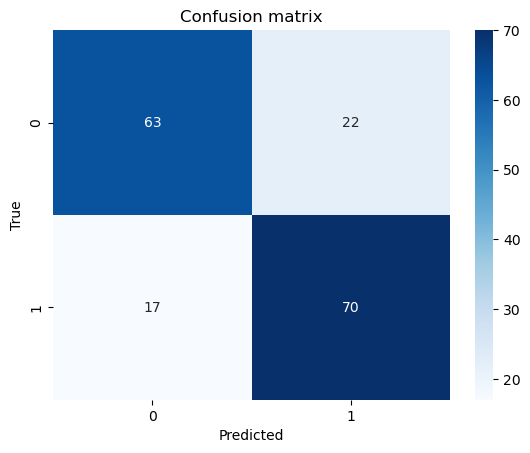

Dmax R^2:  0.477
Dmax RMSD: 0.241
DC50 R^2:  0.658
DC50 RMSD: 0.725


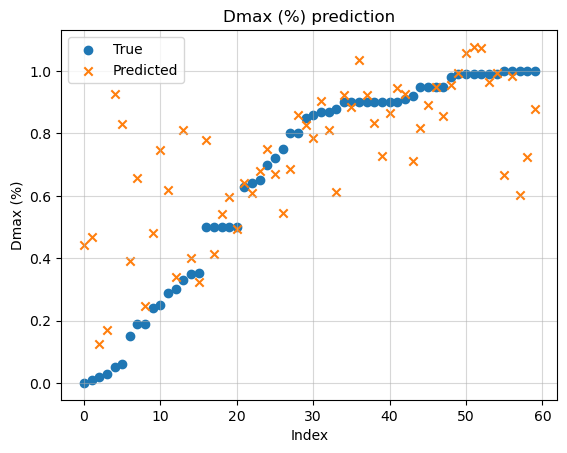

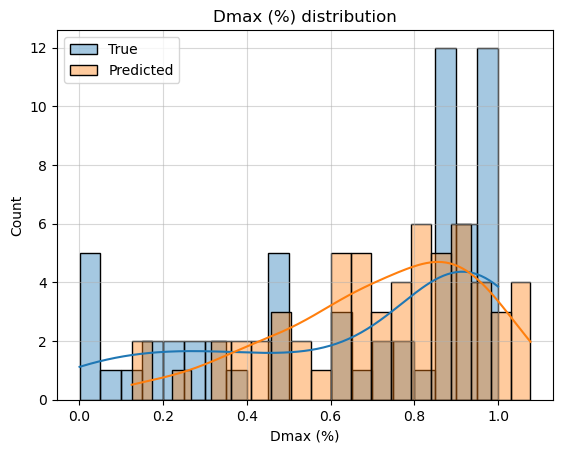

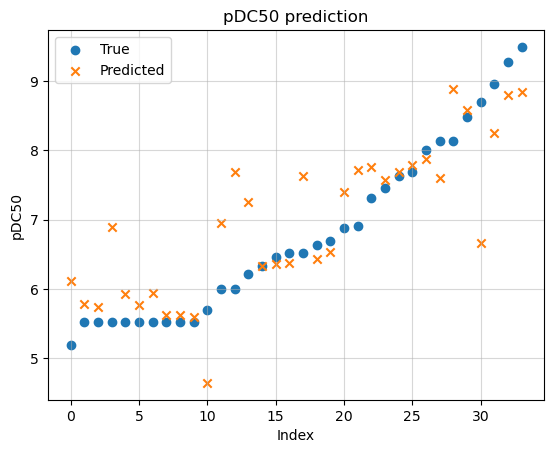

In [ ]:
# Predict the Dmax and DC50 of the X_test data
if scale_dmax:
    dmax_pred = dmax_y_scaler.inverse_transform(dmax_regr.predict(X_test).reshape(-1, 1)).flatten()
else:
    dmax_pred = dmax_regr.predict(X_test)
if scale_dc50:
    dc50_pred = dc50_y_scaler.inverse_transform(dc50_regr.predict(X_test).reshape(-1, 1)).flatten()
else:
    pdc50_pred = dc50_regr.predict(X_test)

# Apply the active definition
y_pred = (dmax_pred >= 0.6) & (pdc50_pred >= 6)
# Get the accuracy and ROC-AUC
accuracy = np.mean(y_pred == y_test)
print(f'Accuracy: {accuracy:.1%}')
roc_auc = roc_auc_score(y_test, y_pred)
print(f'ROC-AUC score: {roc_auc:.3f}')

# Plot confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion matrix')
plt.show()

# Get the y_test values that have Dmax not nan
test_dmax_df = protac_df[protac_df.index.isin(test_df.index)]
test_dmax_df = test_dmax_df[test_dmax_df['Dmax (%)'].notna()]
test_dmax_ds = PROTAC_Dataset(
    test_dmax_df,
    protein_embeddings,
    cell2embedding,
    smiles2fp,
    use_smote=False,
)
test_dmax_ds.apply_scaling(dmax_scaler, use_single_scaler=True)
X_test_dmax = np.hstack([
    np.array(test_dmax_ds.data['Smiles'].tolist()),
    np.array(test_dmax_ds.data['Uniprot'].tolist()),
    np.array(test_dmax_ds.data['E3 Ligase Uniprot'].tolist()),
    np.array(test_dmax_ds.data['Cell Line Identifier'].tolist()),
])
y_test_dmax = test_dmax_df['Dmax (%)'].values / 100

# Get the y_test values that have DC50 not nan
test_dc50_df = protac_df[protac_df.index.isin(test_df.index)]
test_dc50_df = test_dc50_df[test_dc50_df['DC50 (nM)'].notna()]
test_dc50_ds = PROTAC_Dataset(
    test_dc50_df,
    protein_embeddings,
    cell2embedding,
    smiles2fp,
    use_smote=False,
)
test_dc50_ds.apply_scaling(dc50_scaler, use_single_scaler=True)
X_test_dc50 = np.hstack([
    np.array(test_dc50_ds.data['Smiles'].tolist()),
    np.array(test_dc50_ds.data['Uniprot'].tolist()),
    np.array(test_dc50_ds.data['E3 Ligase Uniprot'].tolist()),
    np.array(test_dc50_ds.data['Cell Line Identifier'].tolist()),
])
y_test_dc50 = test_dc50_df['DC50 (nM)'].values
y_test_dc50 = -np.log10(y_test_dc50 * 1e-9)
# Get the predictions
if scale_dmax:
    dmax_pred = dmax_y_scaler.inverse_transform(dmax_regr.predict(X_test_dmax).reshape(-1, 1)).flatten()
else:
    dmax_pred = dmax_regr.predict(X_test_dmax)
if scale_dc50:
    dc50_pred = dc50_y_scaler.inverse_transform(dc50_regr.predict(X_test_dc50).reshape(-1, 1)).flatten()
else:
    pdc50_pred = dc50_regr.predict(X_test_dc50)

# Get and print the R^2 and RMSD scores
from sklearn.metrics import r2_score, mean_squared_error

r2_dmax = r2_score(y_test_dmax, dmax_pred)
r2_dc50 = r2_score(y_test_dc50, dc50_pred)
rmsd_dmax = np.sqrt(mean_squared_error(y_test_dmax, dmax_pred))
rmsd_dc50 = np.sqrt(mean_squared_error(y_test_dc50, dc50_pred))
print(f'Dmax R^2:  {r2_dmax:.3f}')
print(f'Dmax RMSD: {rmsd_dmax:.3f}')
print(f'DC50 R^2:  {r2_dc50:.3f}')
print(f'DC50 RMSD: {rmsd_dc50:.3f}')

# Plot sorted predicted Dmax values
idx = np.argsort(y_test_dmax)
plt.scatter(range(len(y_test_dmax[idx])), y_test_dmax[idx], label='True')
plt.scatter(range(len(dmax_pred[idx])), dmax_pred[idx], label='Predicted', marker='x')
plt.title('Dmax (%) prediction')
plt.xlabel('Index')
plt.ylabel('Dmax (%)')
plt.legend()
plt.grid(axis='both', alpha=0.5)
plt.show()

# Plot the true and predicted Dmax distributions together (faded)
sns.histplot(y_test_dmax, kde=True, color='C0', label='True', alpha=0.4, bins=20)
sns.histplot(dmax_pred, kde=True, color='C1', label='Predicted', alpha=0.4, bins=20)
plt.title('Dmax (%) distribution')
plt.xlabel('Dmax (%)')
plt.legend()
plt.grid(axis='both', alpha=0.5)
plt.show() 

# Plot sorted predicted DC50 values
idx = np.argsort(y_test_dc50)
plt.scatter(range(len(y_test_dc50[idx])), y_test_dc50[idx], label='True')
plt.scatter(range(len(dc50_pred[idx])), dc50_pred[idx], label='Predicted', marker='x')
plt.title('pDC50 prediction')
plt.xlabel('Index')
plt.ylabel('pDC50')
plt.legend()
plt.grid(axis='both', alpha=0.5)
plt.show()

## Other Tests on PROTAC Dataset

In [493]:
print(np.array(protac_ds.data['Smiles'].tolist()).shape)
print(np.array(protac_ds.data['Uniprot'].tolist()).shape)
print(np.array(protac_ds.data['Cell Line Identifier'].tolist()).shape)

(857, 224)
(857, 1024)
(857, 768)


In [494]:
embeddings = np.hstack([
    np.array(protac_ds.data['Smiles'].tolist()),
    np.array(protac_ds.data['Uniprot'].tolist()),
    np.array(protac_ds.data['E3 Ligase Uniprot'].tolist()),
    np.array(protac_ds.data['Cell Line Identifier'].tolist()),
])
print(f'embedding shape: {embeddings.shape}')
hidden_size = 256
print(f'{embeddings.shape[-1] * hidden_size + hidden_size * hidden_size * 3:,}')

embedding shape: (857, 3040)
974,848


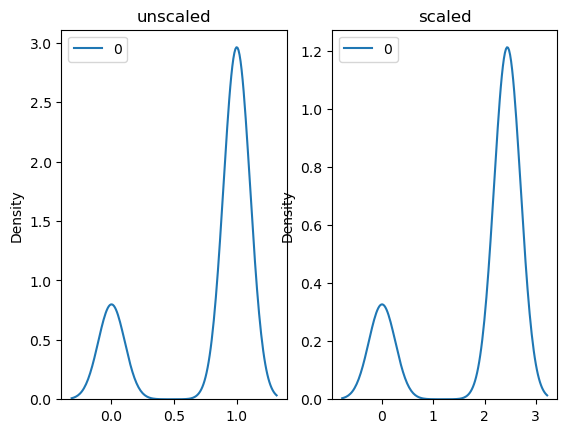

In [495]:
fig, ax = plt.subplots(1, 2)
sns.kdeplot(embeddings_unscaled[:, :1], ax=ax[0], warn_singular=True)
sns.kdeplot(embeddings[:, :1], ax=ax[1], warn_singular=True)
ax[0].set_title('unscaled')
ax[1].set_title('scaled')
plt.show()

In [496]:
if RUN_DIMENSIONALITY_REDUCTION:
    # oversampler = ADASYN(random_state=42, sampling_strategy='minority', n_neighbors=10)
    oversampler = SMOTE(random_state=42, sampling_strategy='minority', k_neighbors=3)

    protac_ds = PROTAC_Dataset(
        protac_df[protac_df[active_col].notna()], use_smote=True, oversampler=oversampler, use_ored_activity=False)
    print(f'Loaded {len(protac_ds)} PROTACs (SMOTE)')

    # Plot PCA for the SMOTE dataset
    protac_data, protac_labels = get_data_for_dim_reduction(protac_ds.data, lookup_embeddings=False)
    plot_pca(protac_data, protac_labels)

    protac_ds = PROTAC_Dataset(
        protac_df[protac_df[active_col].notna()], use_smote=False, oversampler=oversampler, use_ored_activity=False)
    print(f'Loaded {len(protac_ds)} PROTACs')

    # Plot PCA for the non-SMOTE dataset
    protac_data, protac_labels = get_data_for_dim_reduction(protac_ds.data, lookup_embeddings=True)
    plot_pca(protac_data, protac_labels)

In [500]:
protac_ds = PROTAC_Dataset(
    protac_df[~protac_df[active_col].isna()], protein_embeddings, cell2embedding, smiles2fp, use_smote=False)
print(f'Loaded {len(protac_ds)} PROTACs')

Loaded 857 PROTACs


In [505]:
pDC50_scaler = protac_ds.normalize_pDC50()
Dmax_scaler = protac_ds.normalize_Dmax()
pDC50_scaler

StandardScaler()

In [506]:
for elem in protac_ds:
    if elem['active'] == 1 or elem['active'] == 0:
        continue
    print(elem['active'])

In [507]:
protac_dl = DataLoader(protac_ds, batch_size=32, shuffle=True, collate_fn=custom_collate)
print(f'Example batch: {next(iter(protac_dl))}')

Example batch: {'smiles_emb': tensor([[2.4451, 9.8098, 2.3250,  ..., 2.2506, 2.2026, 2.8619],
        [2.4451, 9.8098, 2.3250,  ..., 2.2506, 2.2026, 2.8619],
        [2.4451, 9.8098, 2.3250,  ..., 2.2506, 2.2026, 0.0000],
        ...,
        [2.4451, 9.8098, 2.3250,  ..., 0.0000, 0.0000, 2.8619],
        [0.0000, 9.8098, 2.3250,  ..., 2.2506, 2.2026, 2.8619],
        [0.0000, 9.8098, 0.0000,  ..., 0.0000, 0.0000, 2.8619]]), 'poi_emb': tensor([[ 0.5457,  1.4438,  2.4114,  ..., -0.2300, -1.1045, -0.2744],
        [ 1.0732, -0.1348,  0.2196,  ...,  0.3468,  0.8279, -0.3303],
        [ 1.0397, -0.9426, -1.2832,  ...,  1.6156,  2.2682,  1.3624],
        ...,
        [ 0.4258,  0.8322,  0.8811,  ..., -1.8986, -1.1157,  2.0212],
        [ 3.3970,  2.7638,  2.2043,  ..., -0.6239, -0.7646,  1.8625],
        [ 0.9004,  0.0395,  1.2161,  ...,  0.5625,  1.4495,  1.9269]]), 'e3_emb': tensor([[ 1.8769,  5.2533,  1.7060,  ..., -1.9247, -0.5723,  4.4539],
        [ 1.8769,  5.2533,  1.7060,  ..., -1.

In [414]:
batch = next(iter(protac_dl))
print(batch['smiles_emb'])
print(batch['smiles_emb'].size())

tensor([[1.0000, 1.0000, 1.0000,  ..., 1.0000, 0.0231, 0.0231],
        [1.0000, 1.0000, 0.0000,  ..., 1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
        ...,
        [0.0000, 1.0000, 1.0000,  ..., 0.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000,  ..., 0.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]])
torch.Size([32, 224])


## Define PyTorch Lightning Model

### GNN Model

In [415]:
import pytorch_lightning as pl
import torch_geometric.nn as geom_nn
from torch_geometric.nn.models import GIN, GAT, GCN, AttentiveFP
import torch as torch
from typing import Literal

class GnnSubModel(pl.LightningModule):

    def __init__(
            self,
            num_node_features: int = 9,
            node_edge_dim: int = 3,
            model_type: Literal['gin', 'gat', 'gcn', 'attentivefp'] = 'gin',
            hidden_channels: int = 32,
            num_layers: int = 8,
            out_channels: int = 8,
            dropout: float = 0.2,
            act: Literal['relu', 'elu'] = 'relu',
            jk: Literal['max', 'last', 'cat', 'lstm'] = 'max',
            norm: Literal['batch', 'layer'] = 'batch',
            num_timesteps: int = 16,
        ):
        """Initialize a GNN submodel for encoding SMILES strings into a fixed-length vector representation.
        The SMILES embedding size will be `out_channels` unless the `model_type` is set to `gin`. If so, the SMILES embedding size will be `hidden_channels`.
        
        Args:
            num_node_features (int, optional): Number of node features. Defaults to 9. See `from_smiles` [implementation](https://pytorch-geometric.readthedocs.io/en/latest/_modules/torch_geometric/utils/smiles.html#from_smiles).
            node_edge_dim (int, optional): Number of edge features. Defaults to 3. See `from_smiles` [implementation](https://pytorch-geometric.readthedocs.io/en/latest/_modules/torch_geometric/utils/smiles.html#from_smiles).
            model_type (Literal['gin', 'gat', 'gcn', 'attentivefp'], optional): Type of GNN to use. Defaults to 'gin'.
            hidden_channels (int, optional): Number of hidden channels. Defaults to 32.
            num_layers (int, optional): Number of GNN layers. Defaults to 8.
            out_channels (int, optional): Number of output channels. Defaults to 8.
            dropout (float, optional): Dropout probability. Defaults to 0.2.
            act (Literal['relu', 'elu'], optional): Activation function. Defaults to 'relu'.
            jk (Literal['max', 'last', 'cat', 'lstm'], optional): JK aggregation type. Defaults to 'max'.
            norm (Literal['batch', 'layer'], optional): Normalization type. Defaults to 'batch'.
            num_timesteps (int, optional): Number of timesteps for AttentiveFP. Defaults to 16.
        """
        super().__init__()
        # Set our init args as class attributes
        self.__dict__.update(locals()) # Add arguments as attributes
        self.save_hyperparameters()
        self.smiles_embedding_size = out_channels
        if model_type == 'gin':
            self.smiles_embedding_size = hidden_channels
            self.gnn = GIN(
                in_channels=num_node_features,
                hidden_channels=hidden_channels,
                num_layers=num_layers,
                dropout=dropout,
                act=act,
                norm=norm,
                jk=jk,
            )
        elif model_type == 'gat':
            self.gnn = GAT(
                in_channels=num_node_features,
                hidden_channels=hidden_channels,
                num_layers=num_layers,
                out_channels=out_channels,
                dropout=dropout,
                act=act,
                norm=norm,
                jk=jk,
            )
        elif model_type == 'gcn':
            self.gnn = GCN(
                in_channels=num_node_features,
                hidden_channels=hidden_channels,
                num_layers=num_layers,
                out_channels=out_channels,
                dropout=dropout,
                act=act,
                norm=norm,
                jk=jk,
            )
        elif model_type == 'attentivefp':
            self.gnn = AttentiveFP(
                in_channels=num_node_features,
                hidden_channels=hidden_channels,
                out_channels=out_channels,
                edge_dim=node_edge_dim,
                num_layers=num_layers,
                num_timesteps=num_timesteps,
                dropout=dropout,
            )
        else:
            raise ValueError(f'Unknown model type: {model_type}. Available: gin, gat, gcn, attentivefp')
        
        
    def forward(self, mol_graph):
        if self.model_type == 'gin':
            x = self.gnn(mol_graph.x, mol_graph.edge_index)
            smiles_emb = geom_nn.global_add_pool(x, mol_graph.batch)
        elif self.model_type == 'gat':
            x = self.gnn(
                x=mol_graph.x.to(torch.float),
                edge_index=mol_graph.edge_index,
                edge_attr=mol_graph.edge_attr,
            )
            smiles_emb = geom_nn.global_add_pool(x, mol_graph.batch)
        elif self.model_type == 'gcn':
            x = self.gnn(
                x=mol_graph.x.to(torch.float),
                edge_index=mol_graph.edge_index,
                edge_attr=mol_graph.edge_attr,
            )
            smiles_emb = geom_nn.global_add_pool(x, mol_graph.batch)
        elif self.model_type == 'attentivefp':
            smiles_emb = self.gnn(
                mol_graph.x.to(torch.float),
                mol_graph.edge_index,
                mol_graph.edge_attr,
                mol_graph.batch,
            )
        return smiles_emb


    def get_embedding_size(self):
        return self.smiles_embedding_size

In [416]:
gnn_model = GnnSubModel()
# Test it on a batch from the DataLoader
protac_ds = PROTAC_Dataset(
    protac_df[~protac_df[active_col].isna()], protein_embeddings, cell2embedding, smiles2fp, use_smote=False)
protac_dl = DataLoader(protac_ds, batch_size=8, shuffle=True, collate_fn=custom_collate)
batch = next(iter(protac_dl))
smiles_emb = gnn_model(batch['mol_graph'])
print(f'SMILES embedding shape: {smiles_emb.size()}')

KeyError: 'mol_graph'

### Full Model

In [460]:
import warnings
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import pytorch_lightning as pl
from torchmetrics import (
    Accuracy,
    AUROC,
    Precision,
    Recall,
    F1Score,
)
from torchmetrics import MetricCollection

# Ignore UserWarning from PyTorch Lightning
warnings.filterwarnings("ignore", ".*does not have many workers.*")


class PROTAC_Model(pl.LightningModule):

    def __init__(
        self,
        hidden_dim: int,
        smiles_emb_dim: int = fingerprint_size,
        poi_emb_dim: int = 1024,
        e3_emb_dim: int = 1024,
        cell_emb_dim: int = 768,
        batch_size: int = 32,
        learning_rate: float = 1e-3,
        dropout: float = 0.2,
        join_embeddings: Literal['beginning', 'concat', 'sum'] = 'concat',
        train_dataset: PROTAC_Dataset = None,
        val_dataset: PROTAC_Dataset = None,
        test_dataset: PROTAC_Dataset = None,
        disabled_embeddings: list = [],
        apply_scaling: bool = False,
    ):
        super().__init__()
        self.poi_emb_dim = poi_emb_dim
        self.e3_emb_dim = e3_emb_dim
        self.cell_emb_dim = cell_emb_dim
        self.smiles_emb_dim = smiles_emb_dim
        self.hidden_dim = hidden_dim
        self.batch_size = batch_size
        self.learning_rate = learning_rate
        self.join_embeddings = join_embeddings
        self.train_dataset = train_dataset
        self.val_dataset = val_dataset
        self.test_dataset = test_dataset
        self.disabled_embeddings = disabled_embeddings
        self.apply_scaling = apply_scaling
        # Set our init args as class attributes
        self.__dict__.update(locals())  # Add arguments as attributes
        # Save the arguments passed to init
        ignore_args_as_hyperparams = [
            'train_dataset',
            'test_dataset',
            'val_dataset',
        ]
        self.save_hyperparameters(ignore=ignore_args_as_hyperparams)

        # Define "surrogate models" branches
        if self.join_embeddings != 'beginning':
            if 'poi' not in self.disabled_embeddings:
                self.poi_emb = nn.Linear(poi_emb_dim, hidden_dim)
            if 'e3' not in self.disabled_embeddings:
                self.e3_emb = nn.Linear(e3_emb_dim, hidden_dim)
            if 'cell' not in self.disabled_embeddings:
                self.cell_emb = nn.Linear(cell_emb_dim, hidden_dim)
            if 'smiles' not in self.disabled_embeddings:
                self.smiles_emb = nn.Linear(smiles_emb_dim, hidden_dim)

        # Define hidden dimension for joining layer
        if self.join_embeddings == 'beginning':
            joint_dim = smiles_emb_dim if 'smiles' not in self.disabled_embeddings else 0
            joint_dim += poi_emb_dim if 'poi' not in self.disabled_embeddings else 0
            joint_dim += e3_emb_dim if 'e3' not in self.disabled_embeddings else 0
            joint_dim += cell_emb_dim if 'cell' not in self.disabled_embeddings else 0
        elif self.join_embeddings == 'concat':
            joint_dim = hidden_dim * (4 - len(self.disabled_embeddings))
        elif self.join_embeddings == 'sum':
            joint_dim = hidden_dim

        self.fc0 = nn.Linear(joint_dim, joint_dim)
        self.fc1 = nn.Linear(joint_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, 1)

        self.dropout = nn.Dropout(p=dropout)

        stages = ['train_metrics', 'val_metrics', 'test_metrics']
        self.metrics = nn.ModuleDict({s: MetricCollection({
            'acc': Accuracy(task='binary'),
            'roc_auc': AUROC(task='binary'),
            'precision': Precision(task='binary'),
            'recall': Recall(task='binary'),
            'f1_score': F1Score(task='binary'),
            'opt_score': Accuracy(task='binary') + F1Score(task='binary'),
            'hp_metric': Accuracy(task='binary'),
        }, prefix=s.replace('metrics', '')) for s in stages})

        # Misc settings
        self.missing_dataset_error = \
            '''Class variable `{0}` is None. If the model was loaded from a checkpoint, the dataset must be set manually:
            
            model = {1}.load_from_checkpoint('checkpoint.ckpt')
            model.{0} = my_{0}
            '''
        
        # Apply scaling in datasets
        if self.apply_scaling:
            use_single_scaler = True if self.join_embeddings == 'beginning' else False
            self.scalers = self.train_dataset.fit_scaling(use_single_scaler)
            self.train_dataset.apply_scaling(self.scalers, use_single_scaler)
            self.val_dataset.apply_scaling(self.scalers, use_single_scaler)
            self.test_dataset.apply_scaling(self.scalers, use_single_scaler)

    def forward(self, poi_emb, e3_emb, cell_emb, smiles_emb):
        embeddings = []
        if self.join_embeddings == 'beginning':
            if 'poi' not in self.disabled_embeddings:
                embeddings.append(poi_emb)
            if 'e3' not in self.disabled_embeddings:
                embeddings.append(e3_emb)
            if 'cell' not in self.disabled_embeddings:
                embeddings.append(cell_emb)
            if 'smiles' not in self.disabled_embeddings:
                embeddings.append(smiles_emb)
            x = torch.cat(embeddings, dim=1)
            x = self.dropout(F.relu(self.fc0(x)))
        else:
            if 'poi' not in self.disabled_embeddings:
                embeddings.append(self.poi_emb(poi_emb))
            if 'e3' not in self.disabled_embeddings:
                embeddings.append(self.e3_emb(e3_emb))
            if 'cell' not in self.disabled_embeddings:
                embeddings.append(self.cell_emb(cell_emb))
            if 'smiles' not in self.disabled_embeddings:
                embeddings.append(self.smiles_emb(smiles_emb))
            if self.join_embeddings == 'concat':
                x = torch.cat(embeddings, dim=1)
            elif self.join_embeddings == 'sum':
                if len(embeddings) > 1:
                    embeddings = torch.stack(embeddings, dim=1)
                    x = torch.sum(embeddings, dim=1)
                else:
                    x = embeddings[0]
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.fc3(x)
        return x

    def step(self, batch, batch_idx, stage):
        poi_emb = batch['poi_emb']
        e3_emb = batch['e3_emb']
        cell_emb = batch['cell_emb']
        smiles_emb = batch['smiles_emb']
        y = batch['active'].float().unsqueeze(1)

        y_hat = self.forward(poi_emb, e3_emb, cell_emb, smiles_emb)
        loss = F.binary_cross_entropy_with_logits(y_hat, y)

        self.metrics[f'{stage}_metrics'].update(y_hat, y)
        self.log(f'{stage}_loss', loss, on_epoch=True, prog_bar=True)
        self.log_dict(self.metrics[f'{stage}_metrics'], on_epoch=True)

        return loss

    def training_step(self, batch, batch_idx):
        return self.step(batch, batch_idx, 'train')

    def validation_step(self, batch, batch_idx):
        return self.step(batch, batch_idx, 'val')

    def test_step(self, batch, batch_idx):
        return self.step(batch, batch_idx, 'test')

    def configure_optimizers(self):
        return optim.Adam(self.parameters(), lr=self.learning_rate)

    def predict_step(self, batch, batch_idx):
        poi_emb = batch['poi_emb']
        e3_emb = batch['e3_emb']
        cell_emb = batch['cell_emb']
        smiles_emb = batch['smiles_emb']

        if self.apply_scaling:
            if self.join_embeddings == 'beginning':
                embeddings = np.hstack([
                    np.array(smiles_emb.tolist()),
                    np.array(poi_emb.tolist()),
                    np.array(e3_emb.tolist()),
                    np.array(cell_emb.tolist()),
                ])
                embeddings = self.scalers.transform(embeddings)
                smiles_emb = embeddings[:, :self.smiles_emb_dim]
                poi_emb = embeddings[:, self.smiles_emb_dim:self.smiles_emb_dim+self.poi_emb_dim]
                e3_emb = embeddings[:, self.smiles_emb_dim+self.poi_emb_dim:self.smiles_emb_dim+2*self.poi_emb_dim]
                cell_emb = embeddings[:, -self.cell_emb_dim:]
            else:
                poi_emb = self.scalers['Uniprot'].transform(poi_emb)
                e3_emb = self.scalers['E3 Ligase Uniprot'].transform(e3_emb)
                cell_emb = self.scalers['Cell Line Identifier'].transform(cell_emb)
                smiles_emb = self.scalers['Smiles'].transform(smiles_emb)

        y_hat = self.forward(poi_emb, e3_emb, cell_emb, smiles_emb)
        return torch.sigmoid(y_hat)

    def train_dataloader(self):
        if self.train_dataset is None:
            format = 'train_dataset', self.__class__.__name__
            raise ValueError(self.missing_dataset_error.format(*format))
        
        return DataLoader(
            self.train_dataset,
            batch_size=self.batch_size,
            shuffle=True,
            # drop_last=True,
        )

    def val_dataloader(self):
        if self.val_dataset is None:
            format = 'val_dataset', self.__class__.__name__
            raise ValueError(self.missing_dataset_error.format(*format))
        return DataLoader(
            self.val_dataset,
            batch_size=self.batch_size,
            shuffle=False,
        )

    def test_dataloader(self):
        if self.test_dataset is None:
            format = 'test_dataset', self.__class__.__name__
            raise ValueError(self.missing_dataset_error.format(*format))
        return DataLoader(
            self.test_dataset,
            batch_size=self.batch_size,
            shuffle=False,
        )

In [418]:
dmax_isna = protac_df[protac_df['Dmax (%)'].isna()]
dc50_isna = protac_df[protac_df['DC50 (nM)'].isna()]
print(f'Number of PROTACs with Dmax NaN: {len(dmax_isna)}')
print(f'Number of PROTACs with DC50 NaN: {len(dc50_isna)}')

# Print the percentages
print(f'Percentage of PROTACs with Dmax NaN: {len(dmax_isna) / len(protac_df) * 100:.2f}%')
print(f'Percentage of PROTACs with DC50 NaN: {len(dc50_isna) / len(protac_df) * 100:.2f}%')

dmax_notna = protac_df[protac_df['Dmax (%)'].notna()]
dc50_notna = protac_df[protac_df['DC50 (nM)'].notna()]
print(f'Number of PROTACs with Dmax not-NaN: {len(dmax_notna)}')
print(f'Number of PROTACs with DC50 not-NaN: {len(dc50_notna)}')
print(f'Number of PROTACs with Dmax and DC50 not-NaN: {len(protac_df[protac_df["Dmax (%)"].notna() & protac_df["DC50 (nM)"].notna()])}')

# Print the percentages
print(f'Percentage of PROTACs with Dmax not-NaN: {len(dmax_notna) / len(protac_df) * 100:.2f}%')
print(f'Percentage of PROTACs with DC50 not-NaN: {len(dc50_notna) / len(protac_df) * 100:.2f}%')

notna_idividual = len(dmax_notna) / len(protac_df) * 100 + len(dc50_notna) / len(protac_df) * 100
notna_combined = len(protac_df[protac_df['Dmax (%)'].notna() & protac_df['DC50 (nM)'].notna()]) / len(protac_df) * 100

print(f'Percentage of PROTACs with Dmax and DC50 not-NaN: {notna_combined:.2f}%')
print(f'Percentage of PROTACs with Dmax or DC50 not-NaN: {notna_idividual:.2f}%')

Number of PROTACs with Dmax NaN: 1329
Number of PROTACs with DC50 NaN: 791
Percentage of PROTACs with Dmax NaN: 62.07%
Percentage of PROTACs with DC50 NaN: 36.95%
Number of PROTACs with Dmax not-NaN: 812
Number of PROTACs with DC50 not-NaN: 1350
Number of PROTACs with Dmax and DC50 not-NaN: 525
Percentage of PROTACs with Dmax not-NaN: 37.93%
Percentage of PROTACs with DC50 not-NaN: 63.05%
Percentage of PROTACs with Dmax and DC50 not-NaN: 24.52%
Percentage of PROTACs with Dmax or DC50 not-NaN: 100.98%


## Test Sets

### Old Approach

We want a different test set per Cross-Validation (CV) experiment (see further down). We are interested in three scenarios:
* Randomly splitting the data into training and test sets. Hence, the test st shall contain unique SMILES and Uniprots
* Splitting the data according to their Uniprot. Hence, the test set shall contain unique Uniprots
* Splitting the data according to their SMILES, _i.e._, the test set shall contain unique SMILES

Isolating the unique SMILES and Uniprots:

In [419]:
# active_df = protac_df[protac_df[active_col].notna()].copy()
active_df = protac_df.dropna(subset=['Dmax (%)', 'DC50 (nM)'], how='all').copy()

# Get the unique SMILES and Uniprot
unique_smiles = active_df['Smiles'].value_counts() == 1
unique_uniprot = active_df['Uniprot'].value_counts() == 1
print(f'Number of unique SMILES: {unique_smiles.sum()}')
print(f'Number of unique Uniprot: {unique_uniprot.sum()}')
# Sample 1% of the len(active_df) from unique SMILES and Uniprot and get the
# indices for a test set
n = int(0.05 * len(active_df)) // 2
unique_smiles = unique_smiles[unique_smiles].sample(n=n, random_state=42)
# unique_uniprot = unique_uniprot[unique_uniprot].sample(n=, random_state=42)
unique_indices = active_df[
    active_df['Smiles'].isin(unique_smiles.index) &
    active_df['Uniprot'].isin(unique_uniprot.index)
].index
print(f'Number of unique indices: {len(unique_indices)} ({len(unique_indices) / len(active_df):.1%})')

# # Get the test set
# test_df = active_df.loc[unique_indices]
# # Bar plot of the test Active distribution as percentage
# test_df[active_col].value_counts(normalize=True).plot(kind='bar')
# plt.title('Test set Active distribution')
# plt.show()
# # Bar plot of the test Active - OR distribution as percentage
# test_df['Active - OR'].value_counts(normalize=True).plot(kind='bar')
# plt.title('Test set Active - OR distribution')
# plt.show()

Number of unique SMILES: 606
Number of unique Uniprot: 24
Number of unique indices: 40 (2.4%)


Isolating the unique Uniprots:

In [420]:
# active_df = protac_df[protac_df[active_col].notna()].copy()
active_df = protac_df.dropna(subset=['Dmax (%)', 'DC50 (nM)'], how='all').copy()

unique_uniprot = active_df['Uniprot'].value_counts() == 1
print(f'Number of unique Uniprot: {unique_uniprot.sum()}')
display(unique_uniprot.index)

# NOTE: Since they are very few, all unique Uniprot will be used as test set.
# Get the indices for a test set
unique_indices = active_df[active_df['Uniprot'].isin(unique_uniprot.index)].index

print(f'Number of unique indices: {len(unique_indices)} ({len(unique_indices) / len(active_df):.1%})')

Number of unique Uniprot: 24


Index(['P10275', 'O60885', 'Q06187', 'Q05397', 'P04035', 'P00533', 'P03372',
       'P00520', 'P40763', 'Q00534',
       ...
       'P62937', 'Q460N5', 'O14965', 'Q92831', 'P53350', 'O14744', 'P51451',
       'P62942', 'Q16186', 'P16591'],
      dtype='object', length=102)

Number of unique indices: 1637 (100.0%)


DEPRECATED: The following results in a too Before starting any training, we isolate a small group of test data. Each element in the test set is selected so that all the following conditions are met:
* its SMILES is unique
* its POI is unique
* its (SMILES, POI) pair is unique

Number of unique samples: 10


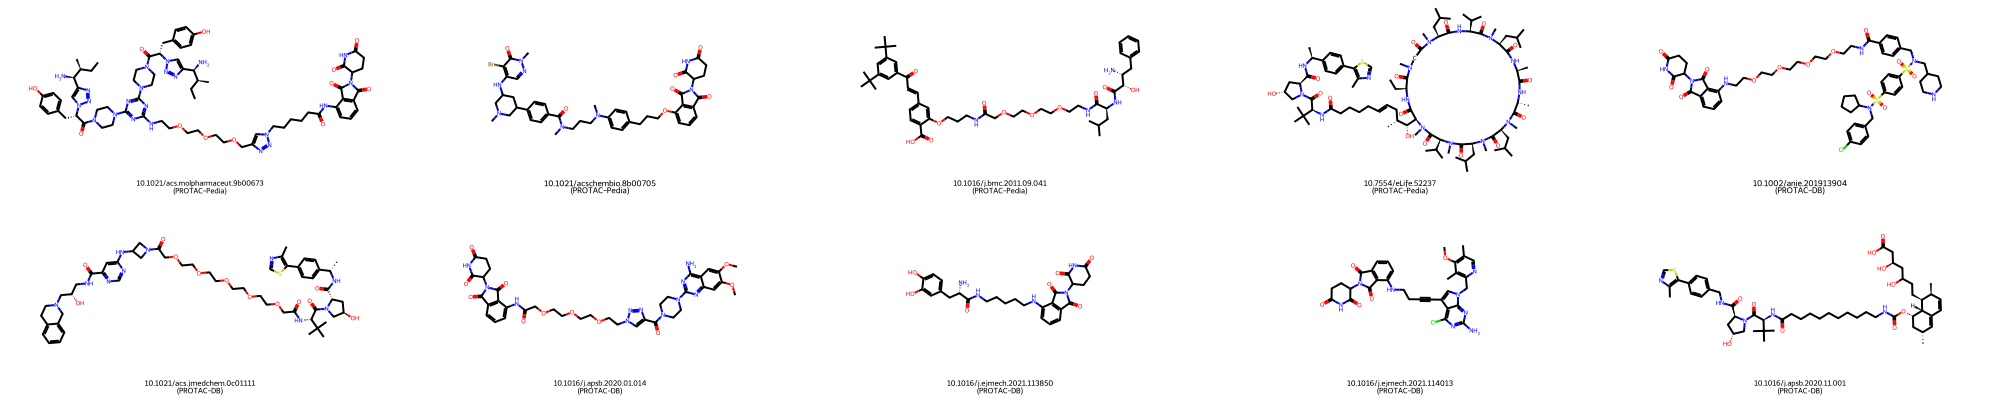

Active (Dmax 0.6, pDC50 6.0) Active
104                          True  False
321                          True   True
793                         False  False
924                          True   True
1249                         True   True
1606                        False  False
1624                        False  False
1956                        False  False
1980                         True  False
2084                         True  False

Percentage of active/inactive PROTACs in test set:
True     0.6
False    0.4
Name: Active (Dmax 0.6, pDC50 6.0), dtype: float64


In [421]:
from rdkit import Chem
from rdkit.Chem import Draw

# active_df = protac_df[protac_df[active_col].notna()]
active_df = protac_df.dropna(subset=['Dmax (%)', 'DC50 (nM)']).copy()

# Find the samples that:
# * have their SMILES appearing only once in the dataframe
# * have their Uniprot appearing only once in the dataframe
# * have their (Smiles, Uniprot) pair appearing only once in the dataframe
unique_smiles = active_df['Smiles'].value_counts() == 1
unique_uniprot = active_df['Uniprot'].value_counts() == 1
unique_smiles_uniprot = active_df.groupby(['Smiles', 'Uniprot']).size() == 1

# Get the indices of the unique samples
unique_smiles_idx = active_df['Smiles'].map(unique_smiles)
unique_uniprot_idx = active_df['Uniprot'].map(unique_uniprot)
unique_smiles_uniprot_idx = active_df.set_index(['Smiles', 'Uniprot']).index.map(unique_smiles_uniprot)

# Cross the indices to get the unique samples
unique_samples = active_df[unique_smiles_idx & unique_uniprot_idx & unique_smiles_uniprot_idx].index
# unique_samples = active_df[unique_smiles_idx & unique_uniprot_idx].index
test_df = active_df.loc[unique_samples]

# Reporting
print(f'Number of unique samples: {len(unique_samples)}')
img = Draw.MolsToGridImage(
    [Chem.MolFromSmiles(s) for s in test_df['Smiles']],
    molsPerRow=5,
    subImgSize=(400, 200),
    legends=[f'{u}\n({s})' for u, s in zip(test_df['Article DOI'], test_df['Database'])],
)
display(img)
display(test_df[[active_col, 'Active']])
print(f'Percentage of active/inactive PROTACs in test set:\n{test_df[active_col].value_counts(normalize=True)}')

The following is a way to determine additional sample to include in the test set:

1. For each target Uniprot, count the number of different E3 ligases associated to it
2. For each target Uniprot, get the SMILES associated to it
3. Based on those SMILES, count all entries that have the same SMILES, but different target Uniprot

Ideally, we want all entries associated to a target Uniprot IDs that have a balanced amount of active/inactive samples, and well distributed E3 ligase classes.

The following code helps isolating those entries, but empirically, we already found Uniprot P00533 to be a good candidate for a test set.

Uniprot                                               P00533
Number of entries                                         45
Number of entries per E3 ligase                            4
Number of entries with same SMILES                        45
Number of entries with same SMILES and not Uniprot         0
Number of active entries                                  22
Number of inactive entries                                23
Name: 3, dtype: object

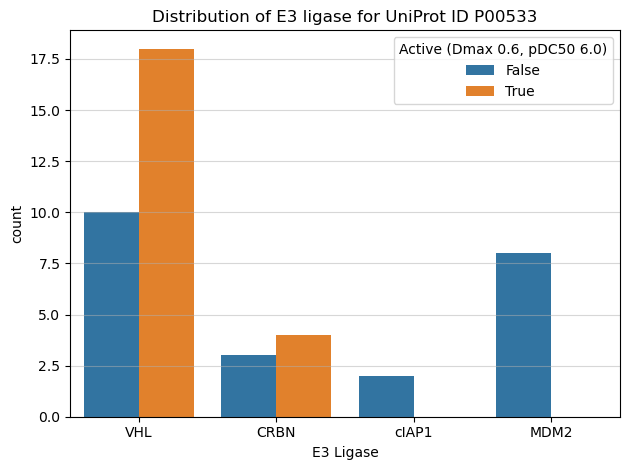

Uniprot                                               P01116
Number of entries                                         31
Number of entries per E3 ligase                            2
Number of entries with same SMILES                        31
Number of entries with same SMILES and not Uniprot         0
Number of active entries                                   7
Number of inactive entries                                24
Name: 7, dtype: object

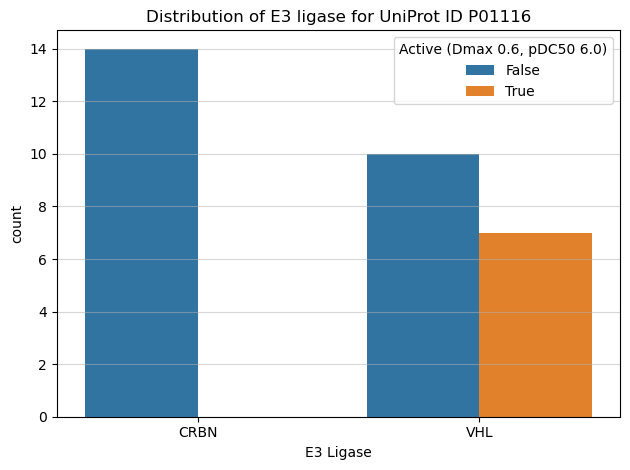

Uniprot                                               P33981
Number of entries                                         32
Number of entries per E3 ligase                            1
Number of entries with same SMILES                        32
Number of entries with same SMILES and not Uniprot         0
Number of active entries                                  21
Number of inactive entries                                11
Name: 6, dtype: object

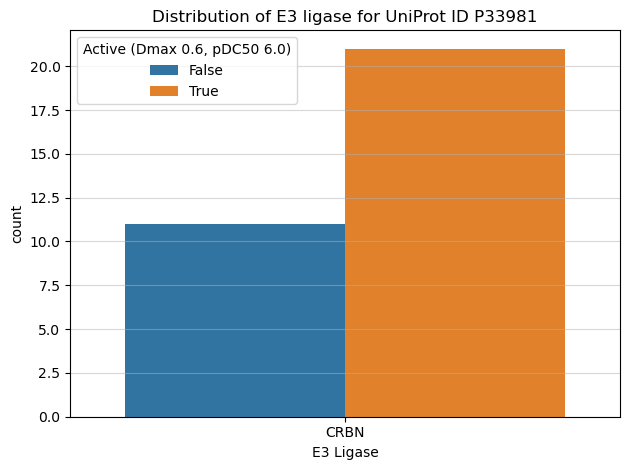

In [422]:
# In active_df, for each uniprot ID, count the corresponding number of entries,
# then count its corresponding number of entries per E3 ligase. The final dataframe
# should have the following columns:
# * Uniprot
# * Number of entries
# * Number of entries per E3 ligase type (e.g. CRL, VHL, etc.)

active_df = protac_df[protac_df[active_col].notna()]
# active_df = protac_df.dropna(subset=['Dmax (%)', 'DC50 (nM)']).copy()

test_candidate_df = active_df['Uniprot'].value_counts().reset_index()
test_candidate_df.columns = ['Uniprot', 'Number of entries']
test_candidate_df['Number of entries per E3 ligase'] = test_candidate_df['Uniprot'].map(active_df.groupby('Uniprot')['E3 Ligase'].nunique())
# Sort by the number of entries per E3 ligase
test_candidate_df = test_candidate_df.sort_values('Number of entries per E3 ligase', ascending=False)
# Take the first row, then get all the SMILES associated to that Uniprot ID
for row_idx in range(len(test_candidate_df)):
    uniprot_id = test_candidate_df['Uniprot'].iloc[row_idx]
    smiles = active_df[active_df['Uniprot'] == uniprot_id]['Smiles']
    # Get the entries in active_df that have the same SMILES but NOT the same Uniprot ID
    uniprot_count = test_candidate_df.iloc[row_idx].copy()
    # uniprot_count['SMILES'] = smiles
    uniprot_count['Number of entries with same SMILES'] = active_df[active_df['Smiles'].isin(smiles)].shape[0]
    uniprot_count['Number of entries with same SMILES and not Uniprot'] = active_df[active_df['Smiles'].isin(smiles) & (active_df['Uniprot'] != uniprot_id)].shape[0]
    # Get the number of active and inactive entries with the same UniProt ID
    uniprot_count['Number of active entries'] = active_df[(active_df['Uniprot'] == uniprot_id) & (active_df[active_col] == True)].shape[0]
    uniprot_count['Number of inactive entries'] = active_df[(active_df['Uniprot'] == uniprot_id) & (active_df[active_col] == False)].shape[0]
    
    if uniprot_count['Number of entries'] > 30 and abs(uniprot_count['Number of active entries'] - uniprot_count['Number of inactive entries']) < 20:
        display(uniprot_count)
        # Plot the distribution of E3 in active_df[active_df['Uniprot'] == uniprot_id]
        sns.countplot(data=active_df[active_df['Uniprot'] == uniprot_id], x='E3 Ligase', hue=active_col)
        plt.title(f'Distribution of E3 ligase for UniProt ID {uniprot_id}')
        # plt.xticks(rotation=45)
        plt.grid(axis='y', alpha=0.5)
        plt.tight_layout()
        plt.show()


Number of entries with UniProt ID P00533: 45
Number of entries in the test set: 55


c:\Users\ste\Anaconda2\envs\env-thesis\Lib\site-packages\rdkit\Chem\Draw\IPythonConsole.py:261: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  warnings.warn(


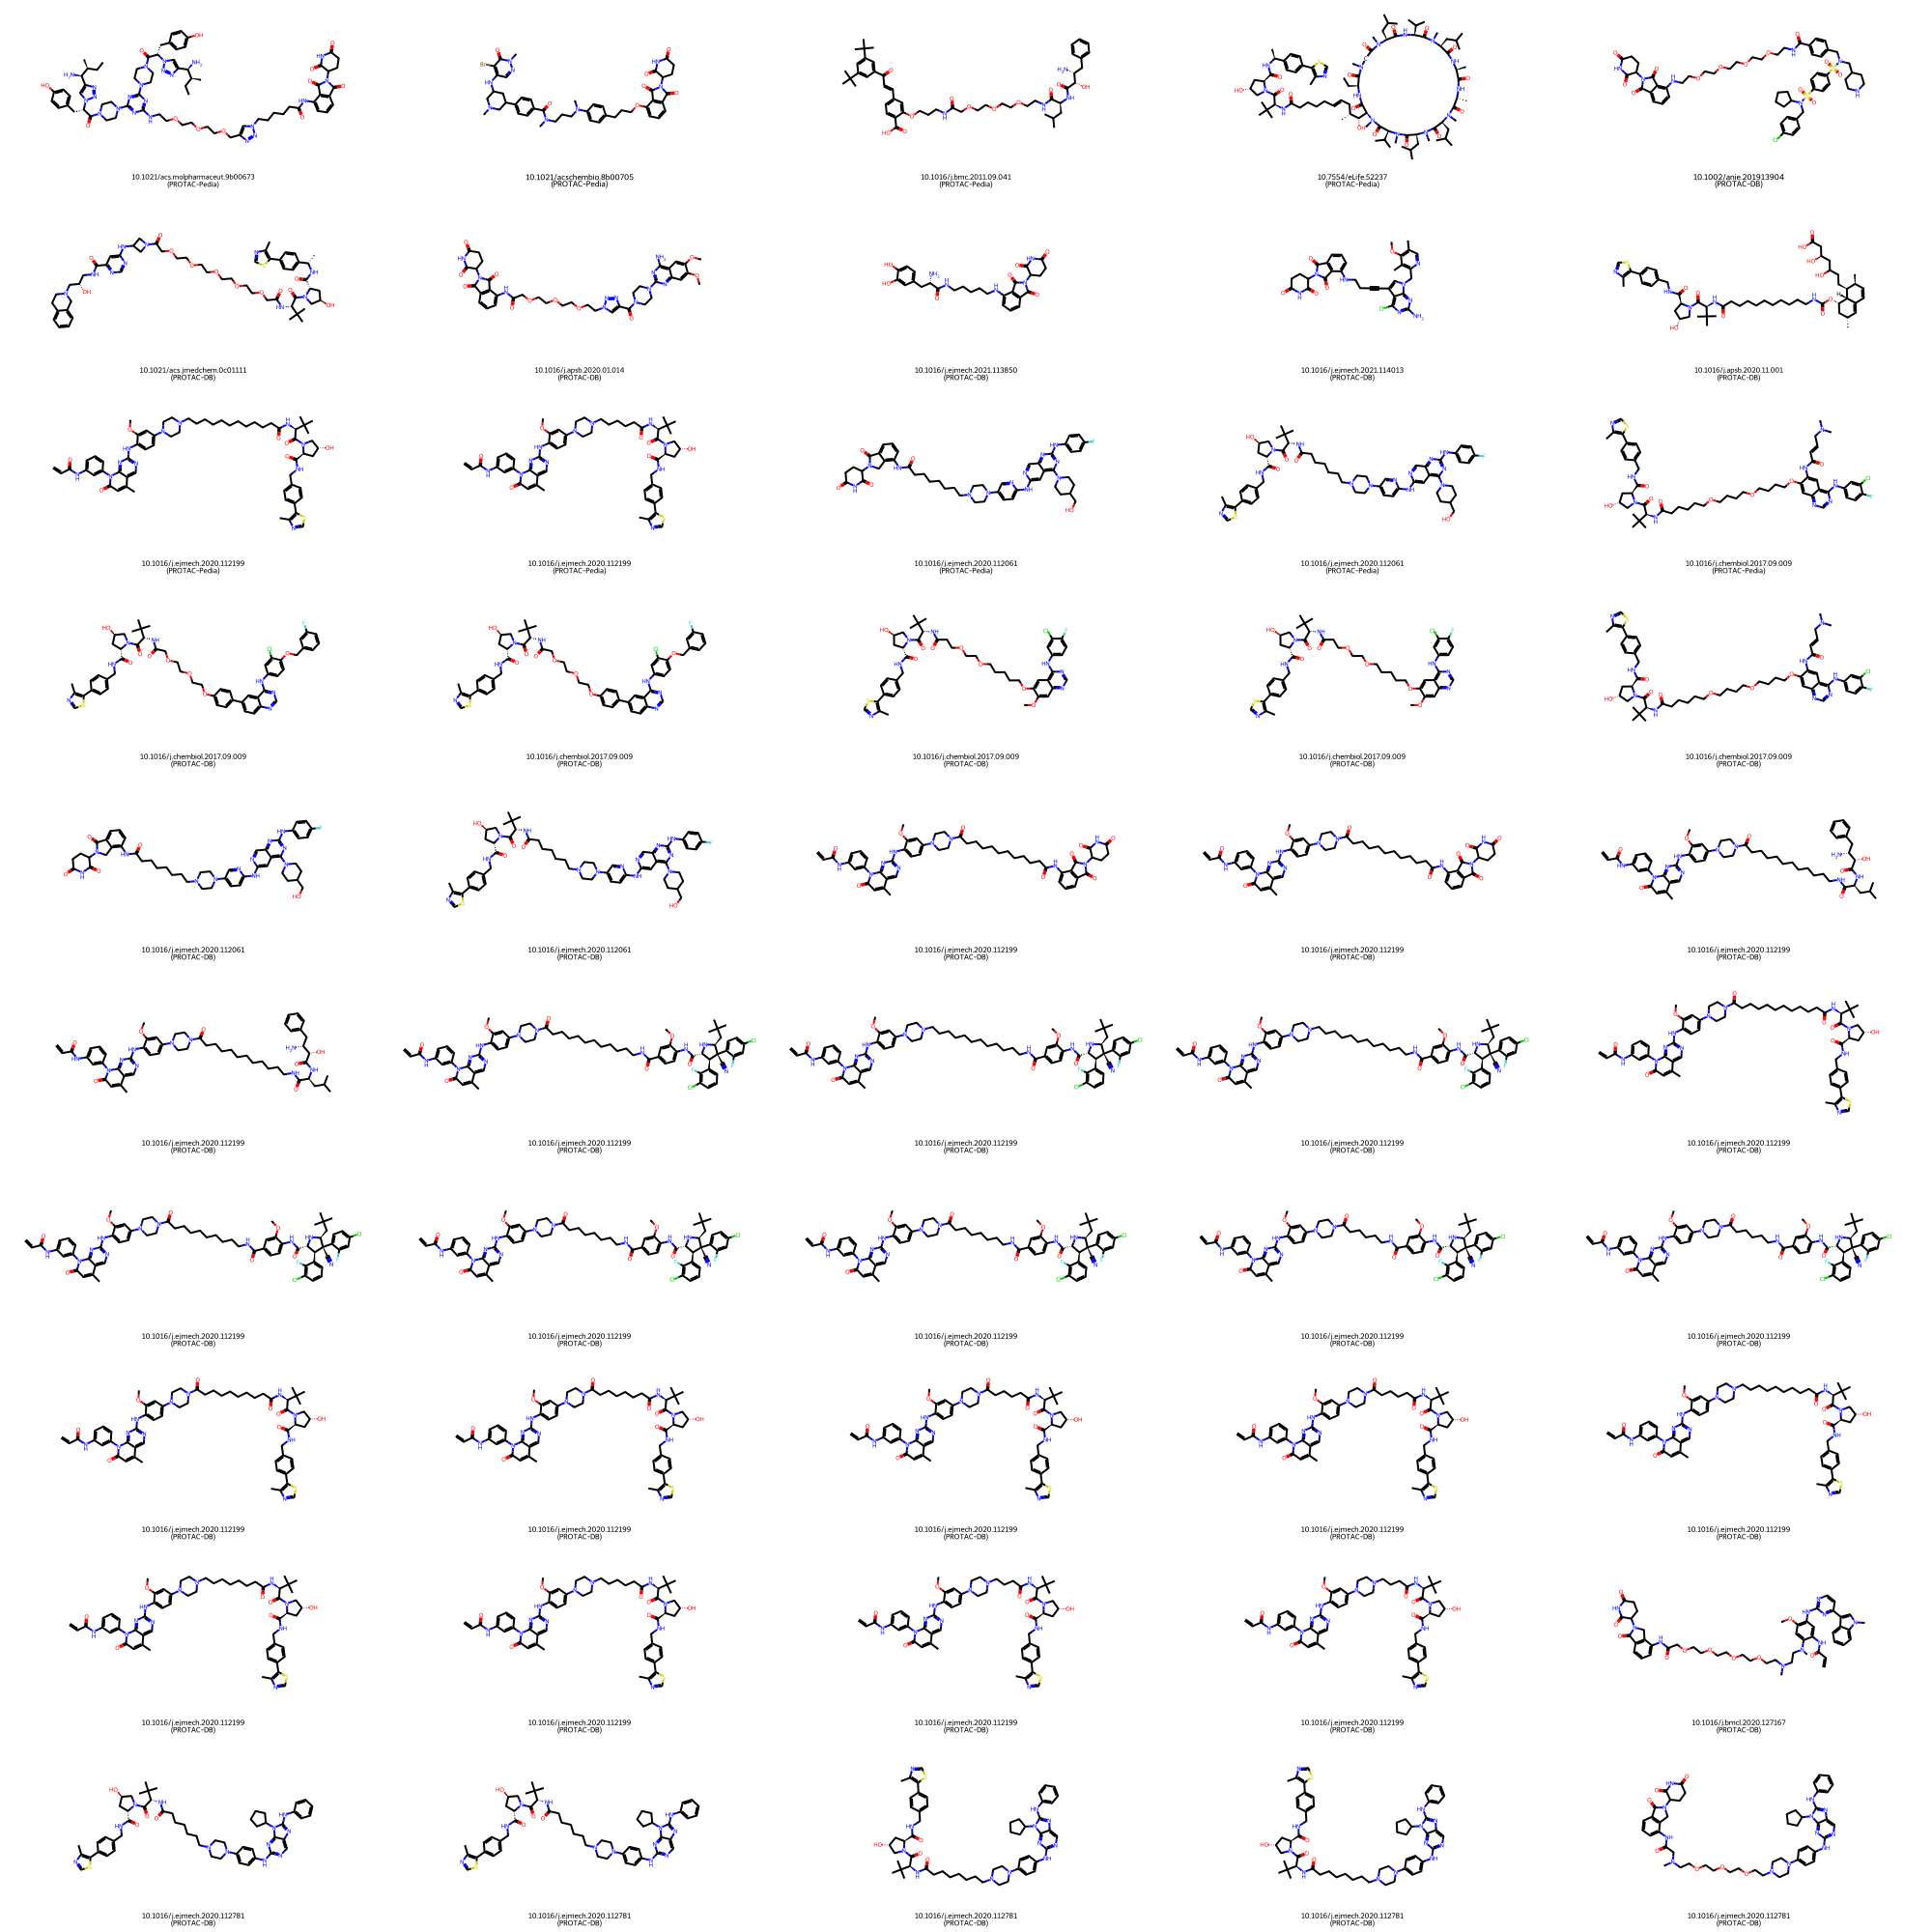

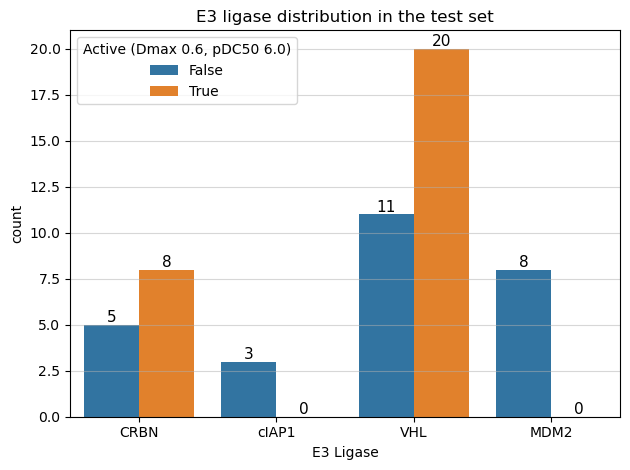

Uniprot E3 Ligase Cell Line Identifier  Dmax (%)  DC50 (nM)  \
104   Q16288      CRBN           Hs578T-Dox    100.00    1000.00   
321   Q92830      CRBN             PSC-THP1     91.00       3.00   
793   P10276     cIAP1          HT1080 EGFP     90.00   10000.00   
924   P62937       VHL       Huh7 IFITM2-/-     90.00      30.00   
1249  O43924      CRBN             PancTu-I     83.40      48.00   
1606  O14744       VHL                MCF-7     74.00    1100.00   
1624  P35348      CRBN               HEK293     94.00    2860.00   
1956  P14679      CRBN              A375-C5     61.00   50000.00   
1980  P07900      CRBN                MCF-7     83.43     990.00   
2084  P04035       VHL           HepG2 hALR     76.00     120.00   
60    P00533       VHL             H1975/WR     90.00      25.30   
69    P00533       VHL             H1975/WR    100.00       5.90   
129   P00533      CRBN               HCC827     87.00      45.20   
137   P00533       VHL               HCC827     98.00      34.80   
504   P00533       VHL             H1975/WR     79.10     215.80   
1036  P00533       VHL              OVCAR-8     97.60      39.20   
1037  P00533       VHL                 HeLa     68.80     736.20   
1038  P00533       VHL               HCC827     98.90      11.70   
1039  P00533       VHL            NCI-H3255     96.60      22.30   
1040  P00533       VHL             H1975/WR     79.10     215.80   
1198  P00533      CRBN               HCC827     87.00      45.20   
1199  P00533       VHL               HCC827     98.00      34.80   
1200  P00533      CRBN             H1975/WR       NaN    2000.00   
1201  P00533      CRBN           A431 siYAP       NaN    2000.00   
1202  P00533     cIAP1             H1975/WR       NaN    2000.00   
1203  P00533     cIAP1           A431 siYAP       NaN    2000.00   
1205  P00533      MDM2           A431 siYAP       NaN    2000.00   
1206  P00533      MDM2             H1975/WR       NaN    2000.00   
1207  P00533      MDM2           A431 siYAP       NaN    2000.00   
1209  P00533       VHL           A431 siYAP       NaN    2000.00   
1213  P00533      MDM2           A431 siYAP       NaN    2000.00   
1214  P00533      MDM2             H1975/WR       NaN    2000.00   
1215  P00533      MDM2           A431 siYAP       NaN    2000.00   
1216  P00533      MDM2             H1975/WR       NaN    2000.00   
1217  P00533      MDM2           A431 siYAP       NaN    2000.00   
1219  P00533       VHL           A431 siYAP       NaN    2000.00   
1221  P00533       VHL           A431 siYAP       NaN    2000.00   
1222  P00533       VHL             H1975/WR       NaN    2000.00   
1223  P00533       VHL           A431 siYAP       NaN    2000.00   
1225  P00533       VHL           A431 siYAP       NaN    2000.00   
1227  P00533       VHL           A431 siYAP       NaN    2000.00   
1229  P00533       VHL           A431 siYAP       NaN    2000.00   
1230  P00533       VHL             H1975/WR       NaN    2000.00   
1231  P00533       VHL           A431 siYAP       NaN    2000.00   
1415  P00533      CRBN             PC9-BrM3     68.00     161.00   
1642  P00533       VHL             H1975/WR     90.30     126.20   
1643  P00533       VHL               HCC827     80.40       0.51   
1644  P00533       VHL             H1975/WR     80.30     151.20   
1645  P00533       VHL               HCC827     74.80       3.54   
1646  P00533      CRBN               HCC827     82.00       1.91   
1721  P00533      CRBN             PC9-BrM3     40.00     100.00   
1824  P00533       VHL    HCC827-Luc [JCRB]     98.00       7.95   
1825  P00533       VHL    HCC827-Luc [JCRB]     91.00       3.57   
1945  P00533       VHL             H1975/WR     86.00       1.56   
1946  P00533       VHL               HCC827     82.00       0.49   

     Active (Dmax 0.6, pDC50 6.0)  
104                          True  
321                          True  
793                         False  
924                          True  
1249            

In [423]:
active_df = protac_df[protac_df[active_col].notna()]
# active_df = protac_df.dropna(subset=['Dmax (%)', 'DC50 (nM)']).copy()

# Get all entries with the UniProt ID set to P00533
uniprot_id = 'P00533'
uniprot_df = active_df[active_df['Uniprot'] == uniprot_id]
# Add it to the test set
test_df = pd.concat([test_df, uniprot_df])
# Reporting
print(f'Number of entries with UniProt ID {uniprot_id}: {len(uniprot_df)}')
print(f'Number of entries in the test set: {len(test_df)}')
img = Draw.MolsToGridImage(
    [Chem.MolFromSmiles(s) for s in test_df['Smiles']],
    molsPerRow=5,
    subImgSize=(400, 200),
    legends=[f'{u}\n({s})' for u, s in zip(test_df['Article DOI'], test_df['Database'])],
)
display(img)
# Histogram plot the the E3 ligases hue-ed by the active and inactive PROTACs
sns.countplot(data=test_df, x='E3 Ligase', hue=active_col)
plt.title('E3 ligase distribution in the test set')
# Add the values on top of the bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                       textcoords='offset points')
plt.tight_layout()
plt.grid(axis='y', alpha=0.5)
plt.show()
display(test_df[['Uniprot', 'E3 Ligase', 'Cell Line Identifier', 'Dmax (%)', 'DC50 (nM)', active_col]])

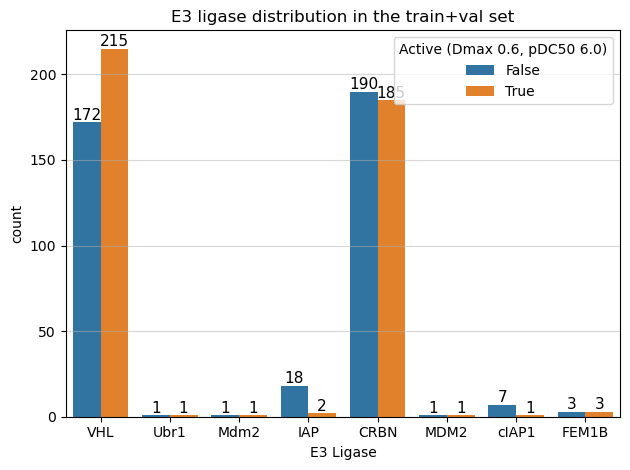

In [424]:
train_val_df = active_df[~active_df.index.isin(test_df.index)]
# Histogram plot the the E3 ligases hue-ed by the active and inactive PROTACs
sns.countplot(data=train_val_df, x='E3 Ligase', hue=active_col)
plt.title('E3 ligase distribution in the train+val set')
# Add the values on top of the bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                       textcoords='offset points')
plt.tight_layout()
plt.grid(axis='y', alpha=0.5)
plt.show()

## Train Model

In [425]:
# Split the dataset into train, val, and test
from sklearn.model_selection import train_test_split

# The train and validation sets will be created from the active PROTACs only,
# i.e., the ones with active_col column not NaN, and that are NOT in the test set
active_df = protac_df[protac_df[active_col].notna()]
train_val_df = active_df[~active_df.index.isin(test_df.index)].copy()

# Get the 20% amount of the train_val_df
val_len = int(0.2 * len(train_val_df))
# Create a new column with the corresponding Uniprot frequency
train_val_df['Uniprot Frequency'] = train_val_df['Uniprot'].map(train_val_df['Uniprot'].value_counts())
# Isolate the least frequent Uniprots as the validation set
least_freq_uniprot = train_val_df['Uniprot Frequency'].nsmallest(val_len).index
val_df = train_val_df.loc[least_freq_uniprot]
# Get the rest as the training set
train_df = train_val_df[~train_val_df.index.isin(val_df.index)]
# Isolate the entries in the val set that have leaking Uniprot in the train set
leaking_uniprots = val_df['Uniprot'].isin(train_df['Uniprot'])
# Remove the leaking Uniprots from the validation set and add them to the training set
leaking_uniprots = val_df[leaking_uniprots]
val_df = val_df[~val_df.index.isin(leaking_uniprots.index)]
train_df = pd.concat([train_df, leaking_uniprots])

# Reporting
print(f"protac_df.shape: {protac_df.shape}")
print(f"active_df.shape: {active_df.shape}")
print(f"train_df.shape: {train_df.shape}")
print(f"val_df.shape: {val_df.shape}")
print(f"test_df.shape: {test_df.shape}")
# Measure leaking Uniprots in the validation set
leaking_uniprots = val_df['Uniprot'].isin(train_df['Uniprot'])
print(f'Number of leaking Uniprots: {leaking_uniprots.sum()}')
print('')
print(f'Active/inactive PROTACs in the training set:\n{train_df[active_col].value_counts(normalize=True).round(2)}')
print('')
print(f'Active/inactive PROTACs in the validation set:\n{val_df[active_col].value_counts(normalize=True).round(2)}')
print('')
print(f'Active/inactive PROTACs in the test set:\n{test_df[active_col].value_counts(normalize=True).round(2)}')

protac_df.shape: (2141, 37)
active_df.shape: (857, 37)
train_df.shape: (644, 38)
val_df.shape: (158, 38)
test_df.shape: (55, 37)
Number of leaking Uniprots: 0

Active/inactive PROTACs in the training set:
True     0.51
False    0.49
Name: Active (Dmax 0.6, pDC50 6.0), dtype: float64

Active/inactive PROTACs in the validation set:
True     0.51
False    0.49
Name: Active (Dmax 0.6, pDC50 6.0), dtype: float64

Active/inactive PROTACs in the test set:
True     0.51
False    0.49
Name: Active (Dmax 0.6, pDC50 6.0), dtype: float64


In [476]:
hidden_dim = 128
batch_size = 4
join_embeddings = 'beginning'
apply_scaling = True
dropout = 0.5
learning_rate = 1e-5
use_smote = True
model_log_label = f'hidden_dim_{hidden_dim}_join_{join_embeddings}_scaling_{apply_scaling}_dropout_{dropout}_lr_{learning_rate}_smote_{use_smote}'

train_ds = PROTAC_Dataset(
    train_df,
    protein_embeddings,
    cell2embedding,
    smiles2fp,
    use_smote=use_smote,
    active_label=active_col,
)
val_ds = PROTAC_Dataset(
    val_df,
    protein_embeddings,
    cell2embedding,
    smiles2fp,
    active_label=active_col,
)
test_ds = PROTAC_Dataset(
    test_df,
    protein_embeddings,
    cell2embedding,
    smiles2fp,
    active_label=active_col,
)

model = PROTAC_Model(
    hidden_dim=hidden_dim,
    smiles_emb_dim=fingerprint_size,
    poi_emb_dim=1024,
    e3_emb_dim=1024,
    cell_emb_dim=768,
    batch_size=batch_size,
    learning_rate=learning_rate, # 2e-5,
    dropout=dropout,
    train_dataset=train_ds,
    val_dataset=val_ds,
    test_dataset=test_ds,
    join_embeddings=join_embeddings,
    apply_scaling=apply_scaling,
)
# Get model parameters size
print(f"Number of parameters: {sum(p.numel() for p in model.parameters()):,}")
print(f"Number of parameters: {model.fc1.weight.shape}")

Number of parameters: 9,650,529
Number of parameters: torch.Size([128, 3040])


In [477]:
logger = pl.loggers.TensorBoardLogger(
    save_dir='../logs',
    name='protac_playground_model',
    sub_dir=model_log_label,
)

callbacks = [
    pl.callbacks.EarlyStopping(
        monitor='train_loss',
        patience=10,
        mode='min',
        verbose=True,
    ),
    pl.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=5,
        mode='min',
        verbose=True,
    ),
    pl.callbacks.EarlyStopping(
        monitor='val_acc',
        patience=10,
        mode='max',
        verbose=True,
    ),
    # pl.callbacks.ModelCheckpoint(
    #     monitor='val_acc',
    #     mode='max',
    #     verbose=True,
    #     filename='{epoch}-{val_metrics_opt_score:.4f}',
    # ),
]
# Define Trainer
trainer = pl.Trainer(
    logger=logger,
    callbacks=callbacks,
    max_epochs=50,)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


In [478]:
trainer.fit(model)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type       | Params
---------------------------------------
0 | fc0     | Linear     | 9.2 M 
1 | fc1     | Linear     | 389 K 
2 | fc2     | Linear     | 16.5 K
3 | fc3     | Linear     | 129   
4 | dropout | Dropout    | 0     
5 | metrics | ModuleDict | 0     
---------------------------------------
9.7 M     Trainable params
0         Non-trainable params
9.7 M     Total params
38.602    Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Metric train_loss improved. New best score: 0.681
Metric val_loss improved. New best score: 0.688
Metric val_acc improved. New best score: 0.500


Validation: 0it [00:00, ?it/s]

Metric train_loss improved by 0.046 >= min_delta = 0.0. New best score: 0.635
Metric val_loss improved by 0.009 >= min_delta = 0.0. New best score: 0.680


Validation: 0it [00:00, ?it/s]

Metric train_loss improved by 0.044 >= min_delta = 0.0. New best score: 0.591
Metric val_loss improved by 0.005 >= min_delta = 0.0. New best score: 0.675
Metric val_acc improved by 0.019 >= min_delta = 0.0. New best score: 0.519


Validation: 0it [00:00, ?it/s]

Metric train_loss improved by 0.037 >= min_delta = 0.0. New best score: 0.555
Metric val_loss improved by 0.003 >= min_delta = 0.0. New best score: 0.672
Metric val_acc improved by 0.070 >= min_delta = 0.0. New best score: 0.589


Validation: 0it [00:00, ?it/s]

Metric train_loss improved by 0.045 >= min_delta = 0.0. New best score: 0.509


Validation: 0it [00:00, ?it/s]

Metric train_loss improved by 0.024 >= min_delta = 0.0. New best score: 0.485
Metric val_acc improved by 0.006 >= min_delta = 0.0. New best score: 0.595


Validation: 0it [00:00, ?it/s]

Metric train_loss improved by 0.019 >= min_delta = 0.0. New best score: 0.465


Validation: 0it [00:00, ?it/s]

Metric train_loss improved by 0.004 >= min_delta = 0.0. New best score: 0.461


Validation: 0it [00:00, ?it/s]

Metric train_loss improved by 0.030 >= min_delta = 0.0. New best score: 0.431
Monitored metric val_loss did not improve in the last 5 records. Best score: 0.672. Signaling Trainer to stop.


In [ ]:
# Open tensorboard
%load_ext tensorboard

## Evaluate Model

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Validation: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

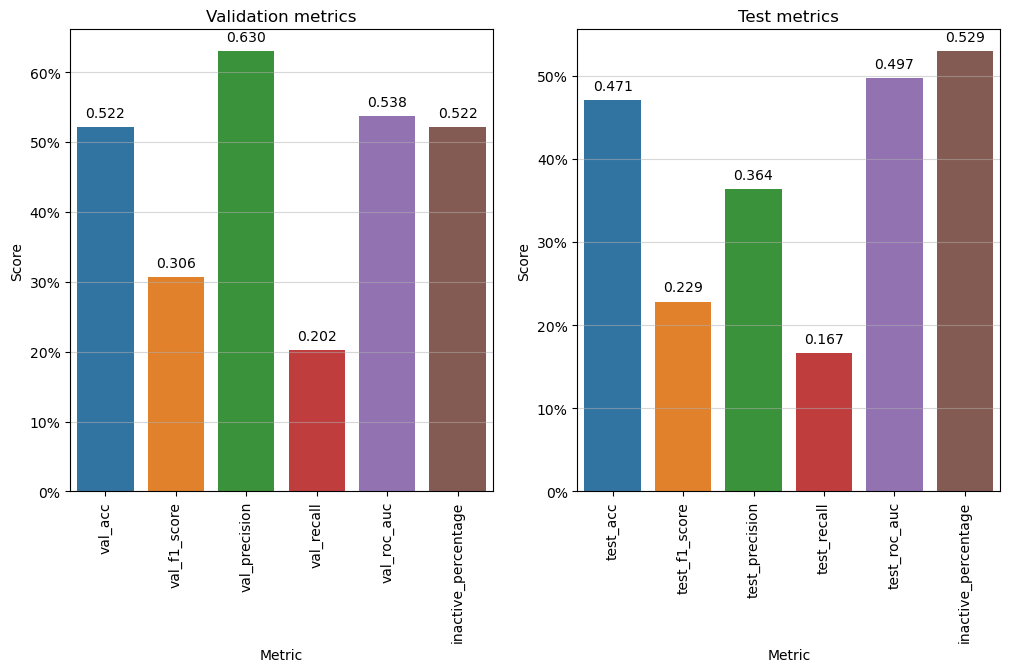

In [184]:
warnings.filterwarnings("ignore", ".*FixedLocator*")

val_metrics = trainer.validate(model, verbose=False)
test_metrics = trainer.test(model, verbose=False)
# Add percentage of inactive PROTACs per dataset
val_metrics[0]['inactive_percentage'] = val_df[active_col].value_counts(normalize=True)[0]
test_metrics[0]['inactive_percentage'] = test_df[active_col].value_counts(normalize=True)[0]
# Remove useless metrics
val_metrics[0].pop('val_loss')
val_metrics[0].pop('val_hp_metric')
val_metrics[0].pop('val_opt_score')
test_metrics[0].pop('test_loss')
test_metrics[0].pop('test_hp_metric')
test_metrics[0].pop('test_opt_score')
# Plot the metrics as bar plots: first melt them into a Score and Metric column
val_metrics_df = pd.DataFrame(val_metrics)
test_metrics_df = pd.DataFrame(test_metrics)
val_metrics_df = val_metrics_df.melt(var_name='Metric', value_name='Score')
test_metrics_df = test_metrics_df.melt(var_name='Metric', value_name='Score')
# Plot the metrics as bar plots in seaborn
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.barplot(data=val_metrics_df, x='Metric', y='Score', ax=ax[0])
sns.barplot(data=test_metrics_df, x='Metric', y='Score', ax=ax[1])
for a in ax:
    a.grid(axis='y', alpha=0.5)
    # Rotate x-axis labels
    a.set_xticklabels(a.get_xticklabels(), rotation=90)
    # Set the y-axis as a percentage
    a.set_yticklabels(['{:,.0%}'.format(x) for x in a.get_yticks()])
    # Write the Score on top of the bars
    for p in a.patches:
        a.annotate(f'{p.get_height():.3f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', xytext=(0, 10), textcoords='offset points')
ax[0].set_title('Validation metrics')
ax[1].set_title('Test metrics')
plt.show()

In [168]:
# Get model predictions on the validation set using the trainer
train_dl = DataLoader(train_ds, batch_size=32, shuffle=False)
train_preds = trainer.predict(model, train_dl)
train_preds = torch.vstack(train_preds).numpy().flatten()

val_dl = DataLoader(val_ds, batch_size=32, shuffle=False)
val_preds = trainer.predict(model, val_dl)
val_preds = torch.vstack(val_preds).numpy().flatten()

test_dl = DataLoader(test_ds, batch_size=1, shuffle=False)
test_preds = trainer.predict(model, test_dl)
test_preds = torch.vstack(test_preds).numpy().flatten()

# NOTE: The test set consists of the unlabeled PROTACs
unlabeled_df[active_col] = False
unlabeled_ds = PROTAC_Dataset(
    unlabeled_df,
    protein_embeddings,
    cell2embedding,
    smiles2fp,
    use_ored_activity=True if active_col == 'Active - OR' else False,
)
unlabeled_dl = DataLoader(unlabeled_ds, batch_size=32, shuffle=False)
unlabeled_preds = trainer.predict(model, unlabeled_dl)
unlabeled_preds = torch.vstack(unlabeled_preds).numpy().flatten()

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

TypeError: expected Tensor as element 0 in argument 0, but got numpy.ndarray

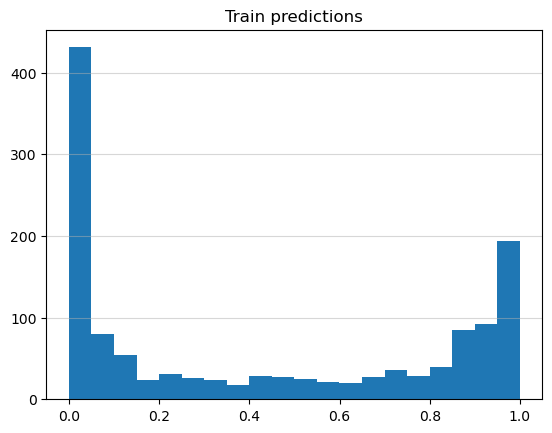

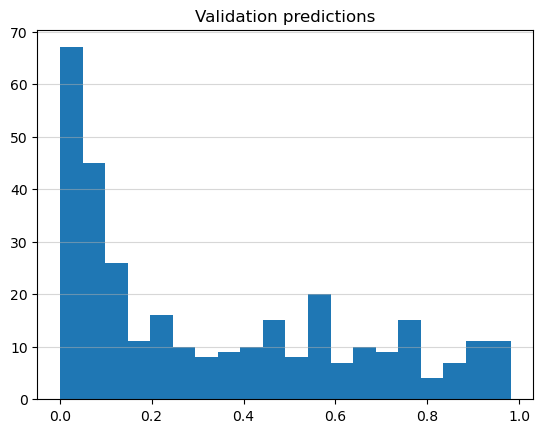

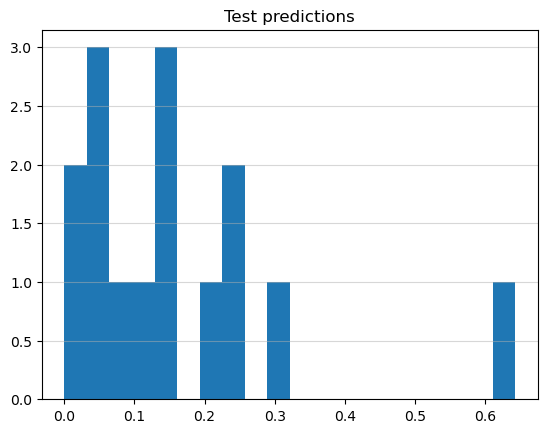

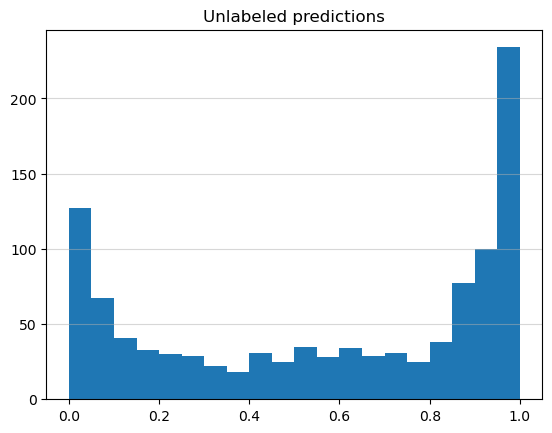

In [139]:
import matplotlib.pyplot as plt

# Plot histogram of predictions
plt.hist(train_preds, bins=20)
plt.title('Train predictions')
plt.grid(axis='y', alpha=0.5)
plt.show()

plt.hist(val_preds, bins=20)
plt.title('Validation predictions')
plt.grid(axis='y', alpha=0.5)
plt.show()

plt.hist(test_preds, bins=20)
plt.title('Test predictions')
plt.grid(axis='y', alpha=0.5)
plt.show()

plt.hist(unlabeled_preds, bins=20)
plt.title('Unlabeled predictions')
plt.grid(axis='y', alpha=0.5)
plt.show()

TODO: Which data are in the most unsure middle region?

c:\Users\ste\Anaconda2\envs\env-thesis\Lib\site-packages\rdkit\Chem\Draw\IPythonConsole.py:261: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  warnings.warn(
c:\Users\ste\Anaconda2\envs\env-thesis\Lib\site-packages\rdkit\Chem\Draw\IPythonConsole.py:264: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  mols = mols[:maxMols]


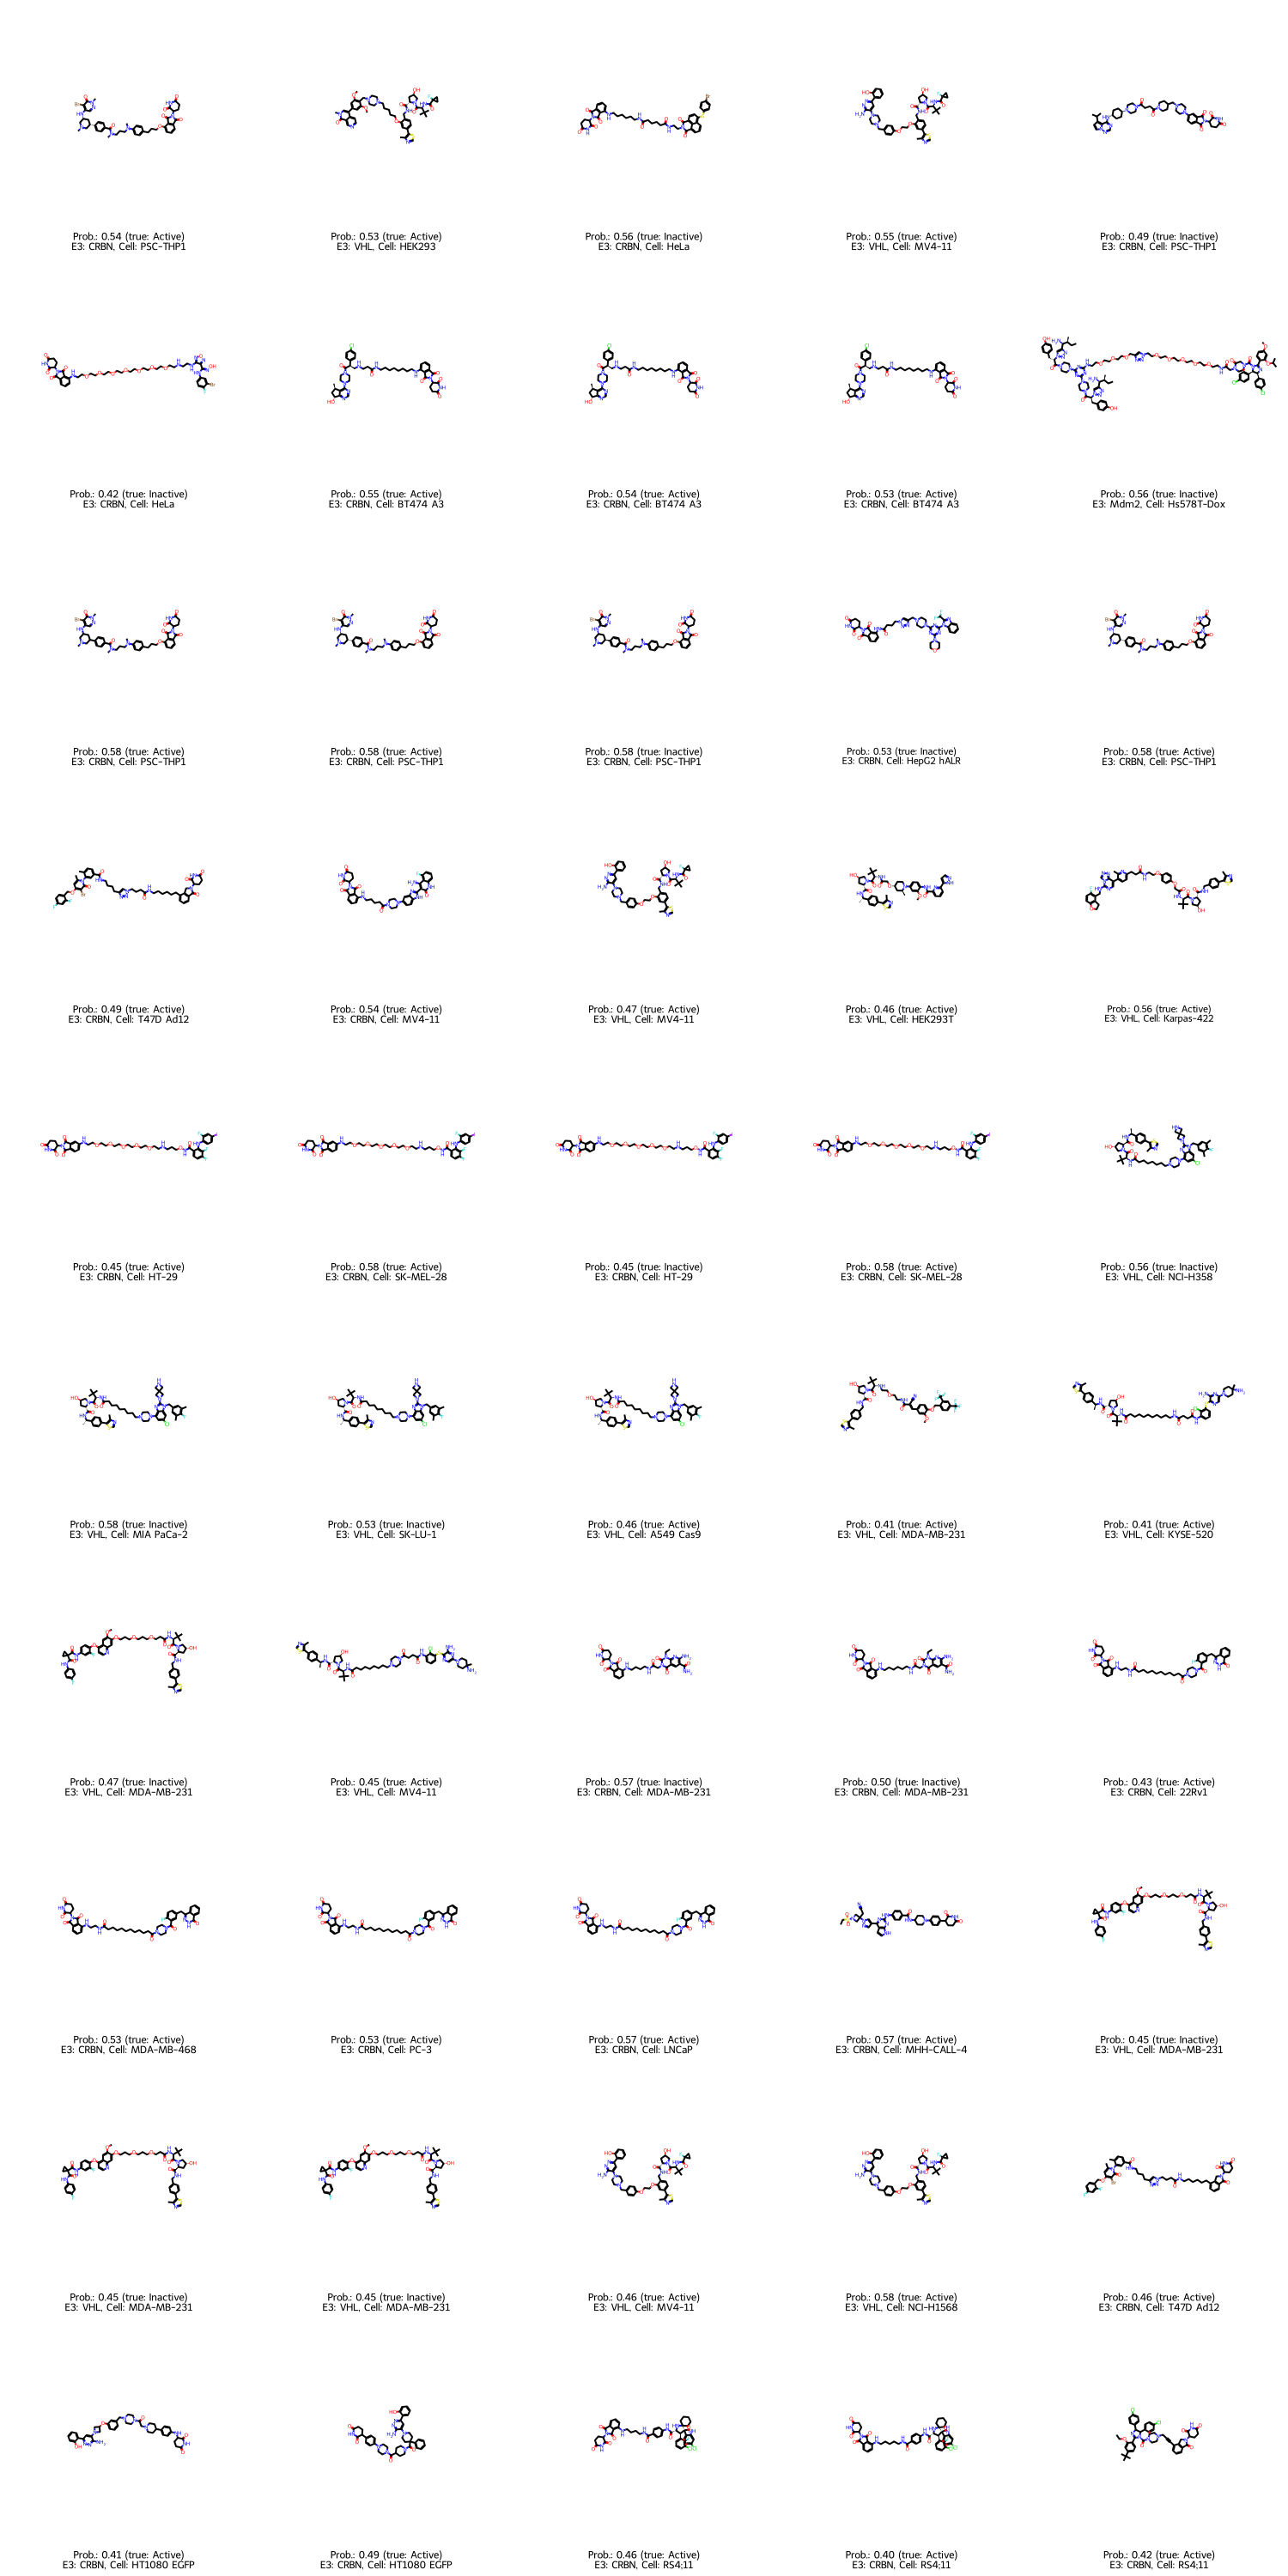

In [140]:
# Draw the molecules of the val set for which the model is not confident, i.e., the ones with probability around 0.5
from rdkit.Chem import Draw
from rdkit.Chem import PandasTools

# Get the indices of the molecules with probability around 0.5
idx = (val_preds > 0.4) & (val_preds < 0.6)

# Add the actual label and probability to the legends
legends = [f'Prob.: {a:.2f} (true: {"Active" if l else "Inactive"})\nE3: {e3}, Cell: {cell}' for a, l, e3, cell in zip(val_preds[idx], val_df[active_col].iloc[idx], val_df['E3 Ligase'].iloc[idx], val_df['Cell Line Identifier'].iloc[idx])]

# Draw the molecules
PandasTools.AddMoleculeColumnToFrame(val_df)
Draw.MolsToGridImage(
    val_df[idx]['ROMol'],
    legends=legends,
    molsPerRow=5,
    subImgSize=(300, 300),
)

In [ ]:
# Get the test set predictions which are very confident
def is_active(p, pos_threshold=0.90, neg_threshold=0.005):
    if p > pos_threshold:
        return True
    elif p < neg_threshold:
        return False
    else:
        return np.nan


unlabeled_df[active_col] = [
    is_active(p, pos_threshold=0.8, neg_threshold=0.15) for p in test_preds]
unlabeled_df['Active Probability'] = test_preds
unlabeled_df[~unlabeled_df[active_col].isna()][active_col].value_counts()

C:\Users\ste\AppData\Local\Temp\ipykernel_25920\2347175426.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['Active'] = [
C:\Users\ste\AppData\Local\Temp\ipykernel_25920\2347175426.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['Active Probability'] = test_preds


False    652
True     179
Name: Active, dtype: int64

c:\Users\ste\Anaconda2\envs\env-thesis\Lib\site-packages\rdkit\Chem\Draw\IPythonConsole.py:261: UserWarning: Truncating the list of molecules to be displayed to 100. Change the maxMols value to display more.
  warnings.warn(


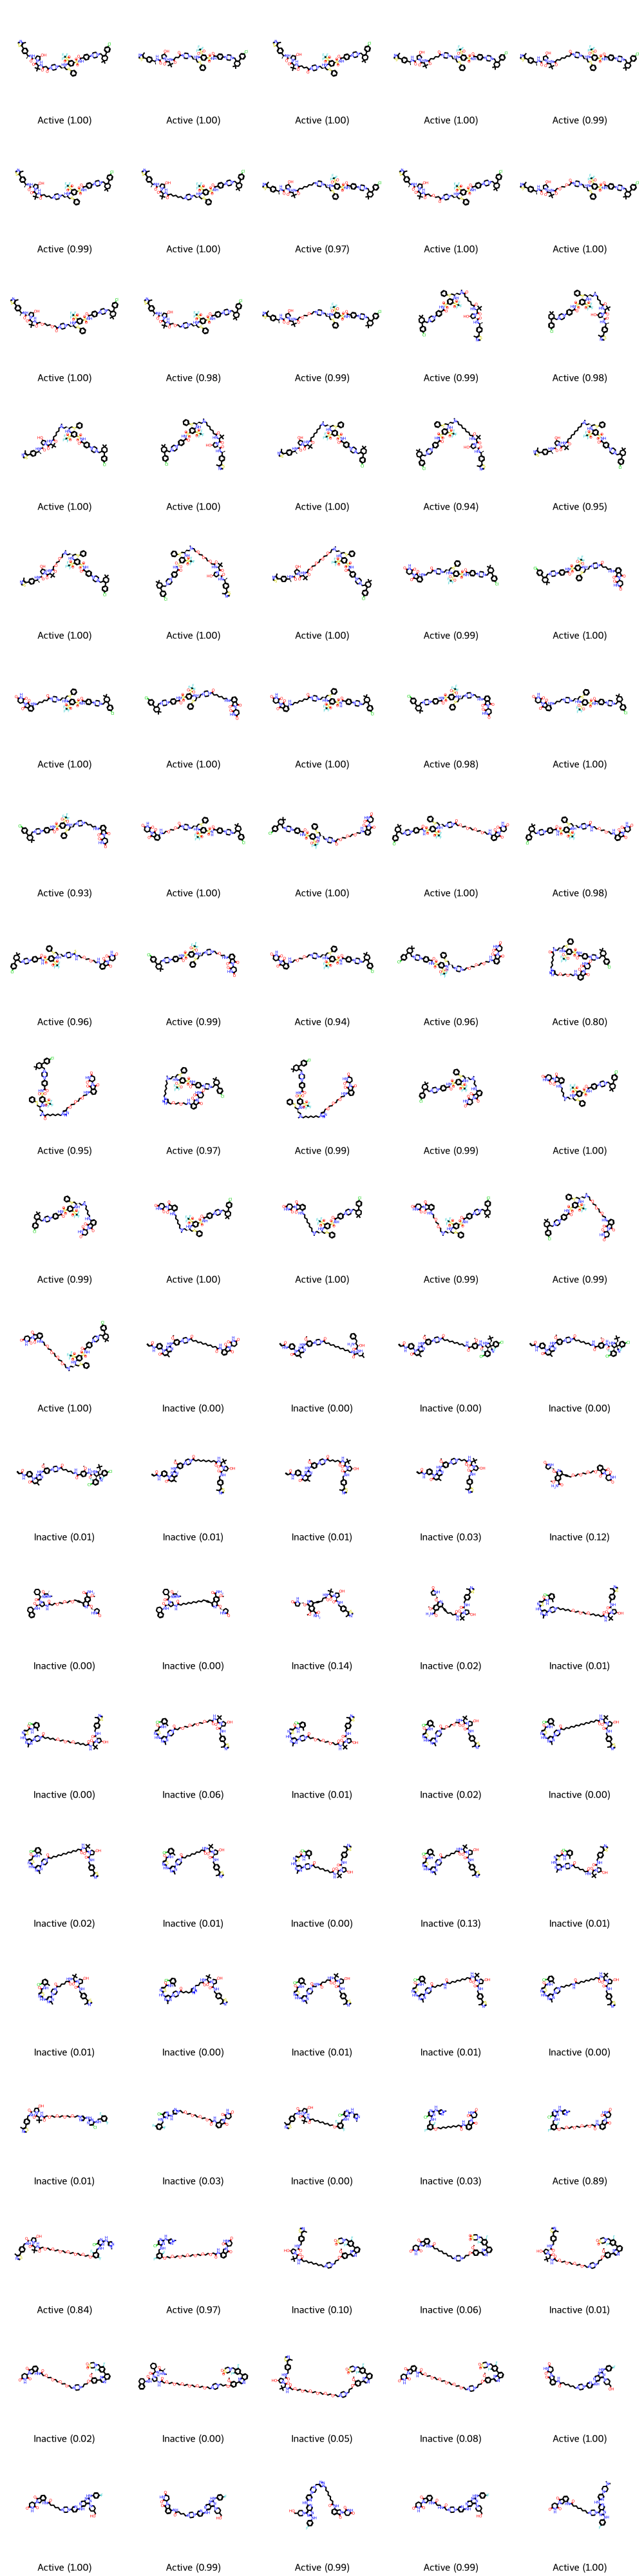

In [ ]:
# Draw the molecules of the test set for which the model is confident, i.e., the ones with high probability (p > 0.8)
# and low probability (p < 0.15)
# Get the indices of the confident molecules
confident_mols = unlabeled_df[~unlabeled_df[active_col].isna()].index
# Get the SMILES of the confident molecules
confident_smiles = unlabeled_df.loc[confident_mols, 'Smiles'].tolist()
# Get the active status of the confident molecules
confident_active = unlabeled_df.loc[confident_mols, active_col].tolist()
# Get the active probability of the confident molecules
confident_prob = unlabeled_df.loc[confident_mols, 'Active Probability'].tolist()
# Draw the confident molecules
Draw.MolsToGridImage(
    [Chem.MolFromSmiles(s) for s in confident_smiles],
    molsPerRow=5,
    subImgSize=(200, 200),
    legends=[f'{"Active" if a > 0.5 else "Inactive"} ({p:.2f})' for a, p in zip(confident_active, confident_prob)],
    maxMols=100,
)

c:\Users\ste\Anaconda2\envs\env-thesis\Lib\site-packages\rdkit\Chem\Draw\IPythonConsole.py:261: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  warnings.warn(


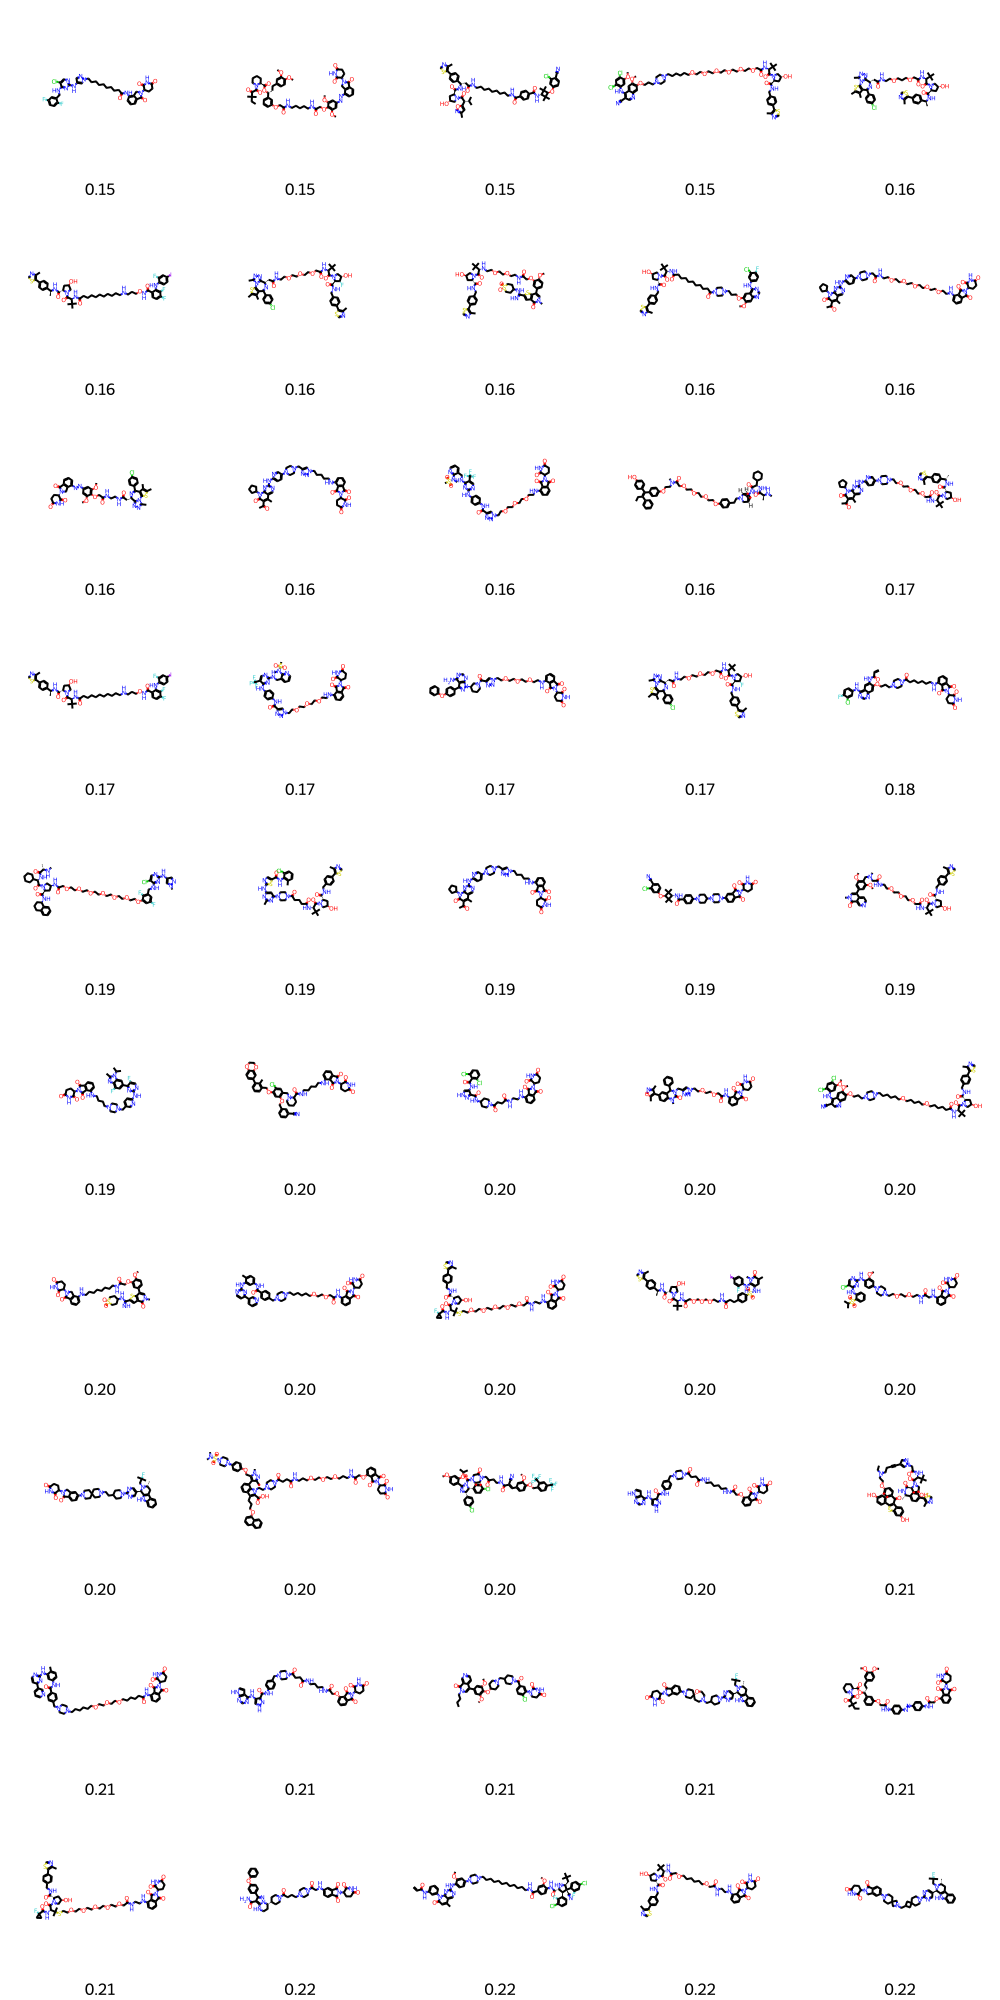

In [ ]:
# Now let's draw the molecules of the test set for which the model is not confident, i.e., the ones with probability
# between 0.001 and 0.97
# Get the indices of the confident molecules
not_confident_mols = unlabeled_df[unlabeled_df[active_col].isna()].index
# Sort the not confident molecules by their probability
not_confident_mols = sorted(not_confident_mols, key=lambda x: unlabeled_df.loc[x, 'Active Probability'])
# Get the SMILES of the confident molecules
not_confident_smiles = unlabeled_df.loc[not_confident_mols, 'Smiles'].tolist()
# Get the active probability of the confident molecules
not_confident_prob = unlabeled_df.loc[not_confident_mols, 'Active Probability'].tolist()
# Draw the confident molecules
Draw.MolsToGridImage(
    [Chem.MolFromSmiles(s) for s in not_confident_smiles],
    molsPerRow=5,
    subImgSize=(200, 200),
    legends=[f'{p:.2f}' for p in not_confident_prob],
)

## Cross-Validation Training

Cross validation training with 5 splits. The split operation is done in three different ways:

* Random split
* POI-wise: some POIs never in both splits
* Least Tanimoto similarity PROTAC-wise

### Plotting CV Folds 

Visualizations taken from [SKlearn](https://scikit-learn.org/stable/auto_examples/model_selection/plot_cv_indices.html).

In [291]:
cmap_data = plt.cm.Paired
cmap_cv = plt.cm.coolwarm

def plot_cv_indices(cv, X, y, group, ax, n_splits, lw=10):
    """Create a sample plot for indices of a cross-validation object."""

    # Generate the training/testing visualizations for each CV split
    for ii, (tr, tt) in enumerate(cv.split(X=X, y=y, groups=group)):
        # Fill in indices with the training/test groups
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0

        # Visualize the results
        ax.scatter(
            range(len(indices)),
            [ii + 0.5] * len(indices),
            c=indices,
            marker="_",
            lw=lw,
            cmap=cmap_cv,
            vmin=-0.2,
            vmax=1.2,
        )

    # Plot the data classes and groups at the end
    ax.scatter(
        range(len(X)), [ii + 1.5] * len(X), c=y, marker="_", lw=lw, cmap=cmap_data
    )

    ax.scatter(
        range(len(X)), [ii + 2.5] * len(X), c=group, marker="_", lw=lw, cmap=cmap_data
    )

    # Formatting
    yticklabels = list(range(n_splits)) + ["class", "group"]
    ax.set(
        yticks=np.arange(n_splits + 2) + 0.5,
        yticklabels=yticklabels,
        xlabel="Sample index",
        ylabel="CV iteration",
        ylim=[n_splits + 2.2, -0.2],
        xlim=[0, 100],
    )
    ax.set_title("{}".format(type(cv).__name__), fontsize=15)
    return ax

### Test Sets

Get the indexes of four test sets, one for each experiment:
* Randomly set aside around 20% of the data
* Isolate all entries with E3 that differs from CRBN and VHL (get at least 15% of the data)
* Tanimoto-based isolate entries
* Target-wise isolate entries

Perform cross-validation on the non-training data.

In [48]:
from sklearn.preprocessing import OrdinalEncoder

test_indeces = {}

#### Random Split

In [49]:
active_df = protac_df[protac_df[active_col].notna()].copy()

# Randomly select 20% of the active PROTACs as the test set
test_df = active_df.sample(frac=0.2, random_state=42)
test_indeces['random'] = test_df.index

# Reporting
print(f'Number of entries in the test set: {len(test_df)} ({len(test_df) / len(active_df):.1%})')
print(f'Active/inactive PROTACs in the test set:\n{test_df[active_col].value_counts(normalize=True).round(2)}')
# Check that the SMILES in test_df are NOT in the train_val_df
train_val_df = active_df[~active_df.index.isin(test_df.index)]
smiles_leak = set(train_val_df['Smiles']).intersection(set(test_df['Smiles']))
print(f'Number of SMILES leaking in the train_val_df dataset: {len(smiles_leak)}')
# Check that the Uniprot in test_df are NOT in the train_val_df
uniprot_leak = set(train_val_df['Uniprot']).intersection(set(test_df['Uniprot']))
print(f'Number of Uniprot leaking in the train_val_df dataset: {len(uniprot_leak)}')

Number of entries in the test set: 171 (20.0%)
Active/inactive PROTACs in the test set:
True     0.5
False    0.5
Name: Active (Dmax 0.6, pDC50 6.0), dtype: float64
Number of SMILES leaking in the train_val_df dataset: 76
Number of Uniprot leaking in the train_val_df dataset: 40


#### E3-based Split

In [50]:
encoder = OrdinalEncoder()
protac_df['E3 Group'] = encoder.fit_transform(protac_df[['E3 Ligase']]).astype(int)

active_df = protac_df[protac_df[active_col].notna()].copy()

test_df = active_df[(active_df['E3 Ligase'] != 'VHL') & (active_df['E3 Ligase'] != 'CRBN')]
test_indeces['e3_ligase'] = test_df.index

# Reporting
print(f'Number of entries in the test set: {len(test_df)} ({len(test_df) / len(active_df):.1%})')
print(f'Active/inactive PROTACs in the test set:\n{test_df[active_col].value_counts(normalize=True).round(2)}')
# Check that the SMILES in test_df are NOT in the train_val_df
train_val_df = active_df[~active_df.index.isin(test_df.index)]
smiles_leak = set(train_val_df['Smiles']).intersection(set(test_df['Smiles']))
print(f'Number of SMILES leaking in the train_val_df dataset: {len(smiles_leak)}')
# Check that the Uniprot in test_df are NOT in the train_val_df
uniprot_leak = set(train_val_df['Uniprot']).intersection(set(test_df['Uniprot']))
print(f'Number of Uniprot leaking in the train_val_df dataset: {len(uniprot_leak)}')

Number of entries in the test set: 51 (6.0%)
Active/inactive PROTACs in the test set:
False    0.82
True     0.18
Name: Active (Dmax 0.6, pDC50 6.0), dtype: float64
Number of SMILES leaking in the train_val_df dataset: 0
Number of Uniprot leaking in the train_val_df dataset: 13


#### Tanimoto-based Split

In [57]:
n_bins_tanimoto = 200
tanimoto_groups = pd.cut(protac_df['Avg Tanimoto'], bins=n_bins_tanimoto).copy()
encoder = OrdinalEncoder()
protac_df['Tanimoto Group'] = encoder.fit_transform(tanimoto_groups.values.reshape(-1, 1)).astype(int)

active_df = protac_df[protac_df[active_col].notna()].copy()
print(f'Number of unique groups: {active_df["Tanimoto Group"].nunique()}')

# # Plot the distribution of the Tanimoto Group
# active_df['Tanimoto Group'].value_counts(normalize=True).plot(kind='bar')
# plt.title('Tanimoto Group distribution')
# # y-axis as percentage
# plt.gca().set_yticklabels(['{:,.0%}'.format(x) for x in plt.gca().get_yticks()])
# plt.grid(axis='y', alpha=0.5)
# plt.show()

# Get the groups ordered by the average tanimoto distance (highest to lowest)
# NOTE: This will put the "less similar" PROTACs in the test set
tanimoto_groups = active_df.groupby('Tanimoto Group')['Avg Tanimoto'].mean().sort_values(ascending=False).index

test_df = []
# For each group, get the number of active and inactive entries. Then, add those
# entries to the test_df if: 1) the test_df lenght + the group entries is less
# 20% of the active_df lenght, and 2) the percentage of True and False entries
# in the active_col in test_df is roughly 50%.
# Start the loop from the groups containing the smallest number of entries.
for group in tanimoto_groups:
    group_df = active_df[active_df['Tanimoto Group'] == group]
    if test_df == []:
        test_df.append(group_df)
        continue
    
    num_entries = len(group_df)
    num_active_group = group_df[active_col].sum()
    num_inactive_group = num_entries - num_active_group

    tmp_test_df = pd.concat(test_df)
    num_entries_test = len(tmp_test_df)
    num_active_test = tmp_test_df[active_col].sum()
    num_inactive_test = num_entries_test - num_active_test
    
    # Check if the group entries can be added to the test_df
    if num_entries_test + num_entries < 0.2 * len(active_df):
        if num_entries_test + num_entries < 0.1 * len(active_df):
            test_df.append(group_df)
            continue
        if (num_active_group + num_active_test) / (num_entries_test + num_entries) < 0.55:
            if (num_inactive_group + num_inactive_test) / (num_entries_test + num_entries) < 0.55:
                test_df.append(group_df)
test_df = pd.concat(test_df)
# Save to global dictionary of test indeces
test_indeces['tanimoto'] = test_df.index

# Reporting
print(f'Number of entries in the test set: {len(test_df)} ({len(test_df) / len(active_df):.1%})')
print(f'Active/inactive PROTACs in the test set:\n{test_df[active_col].value_counts(normalize=True).round(2)}')
# Check that the SMILES in test_df are NOT in the train_val_df
train_val_df = active_df[~active_df.index.isin(test_df.index)]
smiles_leak = set(train_val_df['Smiles']).intersection(set(test_df['Smiles']))
print(f'Number of SMILES leaking in the train_val_df dataset: {len(smiles_leak)}')
# Check that the Uniprot in test_df are NOT in the train_val_df
uniprot_leak = set(train_val_df['Uniprot']).intersection(set(test_df['Uniprot']))
print(f'Number of Uniprot leaking in the train_val_df dataset: {len(uniprot_leak)}')

Number of unique groups: 71
Number of entries in the test set: 171 (20.0%)
Active/inactive PROTACs in the test set:
False    0.53
True     0.47
Name: Active (Dmax 0.6, pDC50 6.0), dtype: float64
Number of SMILES leaking in the train_val_df dataset: 0
Number of Uniprot leaking in the train_val_df dataset: 25


```
Number of unique groups: 71
Number of entries in the test set: 170 (19.8%)
Active/inactive PROTACs in the test set:
False    0.56
True     0.44
Name: Active (Dmax 0.6, pDC50 6.0), dtype: float64
Number of SMILES leaking in the train_val_df dataset: 0
Number of Uniprot leaking in the train_val_df dataset: 32
```

#### Target-based Split

In [364]:
encoder = OrdinalEncoder()
protac_df['Uniprot Group'] = encoder.fit_transform(protac_df[['Uniprot']]).astype(int)

active_df = protac_df[protac_df[active_col].notna()].copy()

test_df = []
# For each group, get the number of active and inactive entries. Then, add those
# entries to the test_df if: 1) the test_df lenght + the group entries is less
# 20% of the active_df lenght, and 2) the percentage of True and False entries
# in the active_col in test_df is roughly 50%.
# Start the loop from the groups containing the smallest number of entries.
for group in reversed(active_df['Uniprot'].value_counts().index):
    group_df = active_df[active_df['Uniprot'] == group]
    if test_df == []:
        test_df.append(group_df)
        continue
    
    num_entries = len(group_df)
    num_active_group = group_df[active_col].sum()
    num_inactive_group = num_entries - num_active_group

    tmp_test_df = pd.concat(test_df)
    num_entries_test = len(tmp_test_df)
    num_active_test = tmp_test_df[active_col].sum()
    num_inactive_test = num_entries_test - num_active_test
    
    # Check if the group entries can be added to the test_df
    if num_entries_test + num_entries < 0.2 * len(active_df):
        if num_entries_test + num_entries < 0.1 * len(active_df):
            test_df.append(group_df)
            continue
        if (num_active_group + num_active_test) / (num_entries_test + num_entries) < 0.6:
            if (num_inactive_group + num_inactive_test) / (num_entries_test + num_entries) < 0.6:
                test_df.append(group_df)
test_df = pd.concat(test_df)
# Save to global dictionary of test indeces
test_indeces['uniprot'] = test_df.index

# Reporting
print(f'Number of entries in the test set: {len(test_df)} ({len(test_df) / len(active_df):.1%})')
print(f'Active/inactive PROTACs in the test set:\n{test_df[active_col].value_counts(normalize=True).round(2)}')
# Check that the SMILES in test_df are NOT in the train_val_df
train_val_df = active_df[~active_df.index.isin(test_df.index)]
smiles_leak = set(train_val_df['Smiles']).intersection(set(test_df['Smiles']))
print(f'Number of SMILES leaking in the train_val_df dataset: {len(smiles_leak)}')
# Check that the Uniprot in test_df are NOT in the train_val_df
uniprot_leak = set(train_val_df['Uniprot']).intersection(set(test_df['Uniprot']))
print(f'Number of Uniprot leaking in the train_val_df dataset: {len(uniprot_leak)}')

Number of entries in the test set: 167 (19.5%)
Active/inactive PROTACs in the test set:
True     0.51
False    0.49
Name: Active (Dmax 0.6, pDC50 6.0), dtype: float64
Number of SMILES leaking in the train_val_df dataset: 17
Number of Uniprot leaking in the train_val_df dataset: 0


Split type: random


C:\Users\ste\AppData\Local\Temp\ipykernel_25336\3799429218.py:31: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(


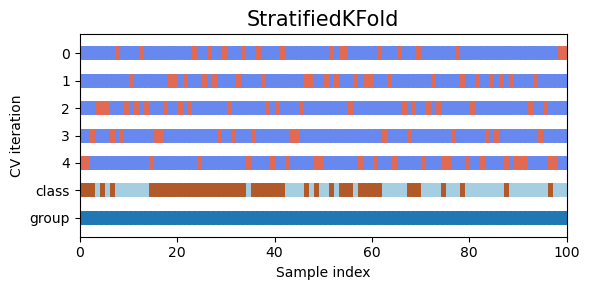

fold  train_len  val_len  train_perc  val_perc  train_active (%)  \
0     0        548      138         0.8       0.2              51.1   
1     1        549      137         0.8       0.2              51.2   
2     2        549      137         0.8       0.2              51.2   
3     3        549      137         0.8       0.2              51.2   
4     4        549      137         0.8       0.2              51.2   

   train_inactive (%)  val_active (%)  val_inactive (%)  num_leaking_uniprot  \
0                48.9            51.4              48.6                   36   
1                48.8            51.1              48.9                   33   
2                48.8            51.1              48.9                   42   
3                48.8            51.1              48.9                   39   
4                48.8            51.1              48.9                   39   

   num_leaking_smiles  train_leaking_uniprot (%)  train_leaking_smiles (%)  
0                  45                       85.6                      12.8  
1                  55                       80.7                      13.8  
2                  46                       93.3                      14.2  
3                  45                       86.0                      11.8  
4                  47                       90.5                      12.4

------------------------------------------------------------------------------------------------------------------------
Split type: e3_ligase


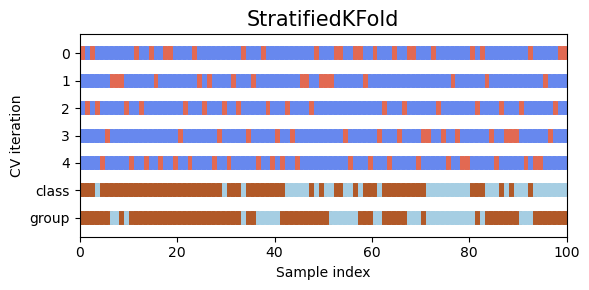

fold  train_len  val_len  train_perc  val_perc  train_active (%)  \
0     0        644      162         0.8       0.2              53.1   
1     1        645      161         0.8       0.2              53.0   
2     2        645      161         0.8       0.2              53.0   
3     3        645      161         0.8       0.2              53.2   
4     4        645      161         0.8       0.2              53.2   

   train_inactive (%)  val_active (%)  val_inactive (%)  num_leaking_uniprot  \
0                46.9            53.1              46.9                   38   
1                47.0            53.4              46.6                   40   
2                47.0            53.4              46.6                   37   
3                46.8            52.8              47.2                   42   
4                46.8            52.8              47.2                   41   

   num_leaking_smiles  train_leaking_uniprot (%)  train_leaking_smiles (%)  \
0                  71                       87.7                      16.9   
1                  78                       93.3                      20.0   
2                  69                       90.1                      19.1   
3                  69                       92.1                      16.6   
4                  80                       91.9                      20.3   

   train_unique_groups  val_unique_groups  
0                    2                  2  
1                    2                  2  
2                    2                  2  
3                    2                  2  
4                    2                  2

------------------------------------------------------------------------------------------------------------------------
Split type: tanimoto


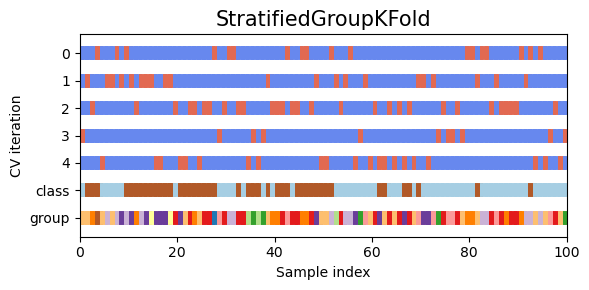

fold  train_len  val_len  train_perc  val_perc  train_active (%)  \
0     0        556      131         0.8       0.2              53.2   
1     1        516      171         0.8       0.2              51.9   
2     2        507      180         0.7       0.3              51.5   
3     3        584      103         0.9       0.1              53.9   
4     4        585      102         0.9       0.1              52.6   

   train_inactive (%)  val_active (%)  val_inactive (%)  num_leaking_uniprot  \
0                46.8            50.4              49.6                   36   
1                48.1            55.0              45.0                   34   
2                48.5            56.1              43.9                   34   
3                46.1            45.6              54.4                   27   
4                47.4            52.9              47.1                   33   

   num_leaking_smiles  train_leaking_uniprot (%)  train_leaking_smiles (%)  \
0                   0                       89.4                       0.0   
1                   0                       85.9                       0.0   
2                   0                       85.4                       0.0   
3                   0                       74.1                       0.0   
4                   0                       84.8                       0.0   

   train_unique_groups  val_unique_groups  
0                   23                  6  
1                   23                  6  
2                   22                  7  
3                   24                  5  
4                   24                  5

------------------------------------------------------------------------------------------------------------------------
Split type: uniprot


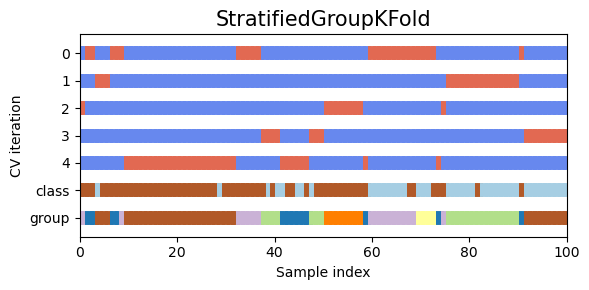

fold  train_len  val_len  train_perc  val_perc  train_active (%)  \
0     0        518      172         0.8       0.2              51.0   
1     1        574      116         0.8       0.2              52.4   
2     2        556      134         0.8       0.2              53.6   
3     3        531      159         0.8       0.2              49.0   
4     4        581      109         0.8       0.2              48.4   

   train_inactive (%)  val_active (%)  val_inactive (%)  num_leaking_uniprot  \
0                49.0            50.6              49.4                    0   
1                47.6            43.1              56.9                    0   
2                46.4            39.6              60.4                    0   
3                51.0            57.2              42.8                    0   
4                51.6            64.2              35.8                    0   

   num_leaking_smiles  train_leaking_uniprot (%)  train_leaking_smiles (%)  \
0                  19                        0.0                       3.7   
1                   0                        0.0                       0.0   
2                  19                        0.0                       6.3   
3                   0                        0.0                       0.0   
4                   0                        0.0                       0.0   

   train_unique_groups  val_unique_groups  
0                   19                  5  
1                   18                  6  
2                   19                  5  
3                   19                  5  
4                   21                  3

------------------------------------------------------------------------------------------------------------------------


In [374]:
from sklearn.model_selection import (
    StratifiedKFold,
    StratifiedGroupKFold,
)

n_splits = 5

for split_type, indeces in test_indeces.items():
    active_df = protac_df[protac_df[active_col].notna()].copy()
    test_df = active_df.loc[indeces]
    train_val_df = active_df[~active_df.index.isin(test_df.index)]
    
    if split_type == 'random':
        kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
        group = None
    elif split_type == 'e3_ligase':
        kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
        group = train_val_df['E3 Group'].to_numpy()
    elif split_type == 'tanimoto':
        kf = StratifiedGroupKFold(n_splits=n_splits, shuffle=True, random_state=42)
        group = train_val_df['Tanimoto Group'].to_numpy()
    elif split_type == 'uniprot':
        kf = StratifiedGroupKFold(n_splits=n_splits, shuffle=True, random_state=42)
        group = train_val_df['Uniprot Group'].to_numpy()

    X = train_val_df.drop(columns=active_col)
    y = train_val_df[active_col].tolist()

    print(f'Split type: {split_type}')
    fig, ax = plt.subplots(figsize=(6, 3))
    plot_cv_indices(kf, X=X, y=y, group=group, ax=ax, n_splits=n_splits)
    plt.tight_layout()
    plt.show()

    stats = []
    for k, (train_index, val_index) in enumerate(kf.split(X, y, group)):
        train_df = train_val_df.iloc[train_index]
        val_df = train_val_df.iloc[val_index]

        leaking_uniprot = list(set(train_df['Uniprot']).intersection(set(val_df['Uniprot'])))
        leaking_smiles = list(set(train_df['Smiles']).intersection(set(val_df['Smiles'])))

        stat = {
            'fold': k,
            'train_len': len(train_df),
            'val_len': len(val_df),
            'train_perc': len(train_df) / len(train_val_df),
            'val_perc': len(val_df) / len(train_val_df),
            'train_active (%)': train_df[active_col].sum() / len(train_df) * 100,
            'train_inactive (%)': (len(train_df) - train_df[active_col].sum()) / len(train_df) * 100,
            'val_active (%)': val_df[active_col].sum() / len(val_df) * 100,
            'val_inactive (%)': (len(val_df) - val_df[active_col].sum()) / len(val_df) * 100,
            'num_leaking_uniprot': len(leaking_uniprot),
            'num_leaking_smiles': len(leaking_smiles),
            'train_leaking_uniprot (%)': len(train_df[train_df['Uniprot'].isin(leaking_uniprot)]) / len(train_df) * 100,
            'train_leaking_smiles (%)': len(train_df[train_df['Smiles'].isin(leaking_smiles)]) / len(train_df) * 100,
        }
        if split_type != 'random':
            stat['train_unique_groups'] = len(np.unique(group[train_index]))
            stat['val_unique_groups'] = len(np.unique(group[val_index]))
        stats.append(stat)
    display(pd.DataFrame(stats).round(1))
    print('-' * 120)

### Train/Val Sets

Group: random


C:\Users\ste\AppData\Local\Temp\ipykernel_21940\3799429218.py:31: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(


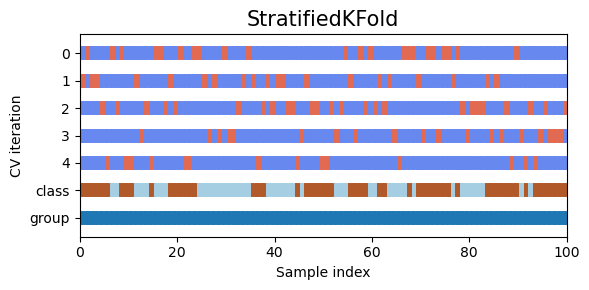

fold  train_len  val_len  train_perc  val_perc  train_active (%)  \
0     0       1297      325         0.8       0.2              50.7   
1     1       1297      325         0.8       0.2              50.7   
2     2       1298      324         0.8       0.2              50.7   
3     3       1298      324         0.8       0.2              50.7   
4     4       1298      324         0.8       0.2              50.7   

   train_inactive (%)  val_active (%)  val_inactive (%)  num_leaking_uniprot  \
0                49.3            50.8              49.2                   60   
1                49.3            50.8              49.2                   61   
2                49.3            50.6              49.4                   59   
3                49.3            50.6              49.4                   62   
4                49.3            50.6              49.4                   56   

   num_leaking_smiles  
0                 154  
1                 169  
2                 155  
3                 150  
4                 149

------------------------------------------------------------------------------------------------------------------------
Number of unique groups: 87
Group: uniprot


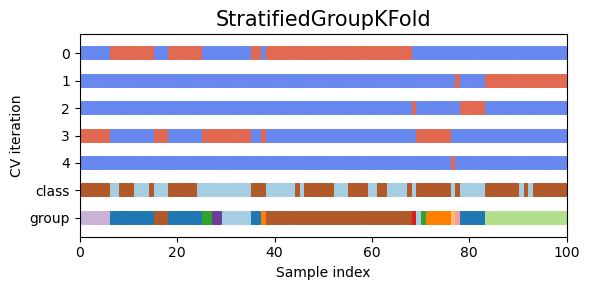

fold  train_len  val_len  train_perc  val_perc  train_active (%)  \
0     0       1037      585         0.6       0.4              52.6   
1     1       1259      363         0.8       0.2              52.5   
2     2       1471      151         0.9       0.1              49.8   
3     3       1304      318         0.8       0.2              50.2   
4     4       1417      205         0.9       0.1              49.0   

   train_inactive (%)  val_active (%)  val_inactive (%)  num_leaking_uniprot  \
0                47.4            47.4              52.6                    0   
1                47.5            44.4              55.6                    0   
2                50.2            58.9              41.1                    0   
3                49.8            52.8              47.2                    0   
4                51.0            62.0              38.0                    0   

   num_leaking_smiles  train_unique_groups  val_unique_groups  
0                 104                   66                 21  
1                  17                   73                 14  
2                   4                   74                 13  
3                  68                   66                 21  
4                  59                   69                 18

------------------------------------------------------------------------------------------------------------------------
Number of unique groups: 68
Group: tanimoto


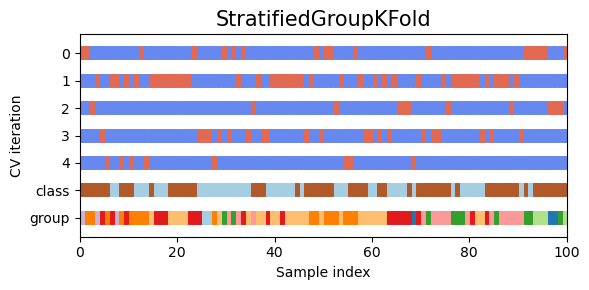

fold  train_len  val_len  train_perc  val_perc  train_active (%)  \
0     0       1305      317         0.8       0.2              49.9   
1     1       1034      588         0.6       0.4              49.9   
2     2       1412      210         0.9       0.1              50.6   
3     3       1277      345         0.8       0.2              52.3   
4     4       1460      162         0.9       0.1              50.5   

   train_inactive (%)  val_active (%)  val_inactive (%)  num_leaking_uniprot  \
0                50.1            53.9              46.1                   52   
1                50.1            52.0              48.0                   54   
2                49.4            51.0              49.0                   46   
3                47.7            44.6              55.4                   46   
4                49.5            51.9              48.1                   39   

   num_leaking_smiles  train_unique_groups  val_unique_groups  
0                   0                   54                 14  
1                   0                   51                 17  
2                   0                   58                 10  
3                   0                   57                 11  
4                   0                   52                 16

------------------------------------------------------------------------------------------------------------------------


In [171]:
from sklearn.model_selection import (
    StratifiedKFold,
    StratifiedGroupKFold,
)
from sklearn.preprocessing import OrdinalEncoder

# NOTE: When set to 60, it will result in 29 groups, with nice distributions of
# the number of unique groups in the train and validation sets, together with
# the number of active and inactive PROTACs. 
n_bins_tanimoto = 60 if active_col == active_col else 400
n_splits = 5
# The train and validation sets will be created from the active PROTACs only,
# i.e., the ones with active_col column not NaN, and that are NOT in the test set
active_df = protac_df[protac_df[active_col].notna()]
train_val_df = active_df[~active_df.index.isin(test_df.index)].copy()

# Make three groups for CV:
# * Random split
# * Split by Uniprot (POI)
# * Split by least tanimoto similarity PROTAC-wise
groups = [
    'random',
    'uniprot',
    'tanimoto',
]
for group_type in groups:
    if group_type == 'random':
        kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
        groups = None
    elif group_type == 'uniprot':
        # Split by Uniprot
        kf = StratifiedGroupKFold(n_splits=n_splits, shuffle=True, random_state=42)
        encoder = OrdinalEncoder()
        groups = encoder.fit_transform(train_val_df['Uniprot'].values.reshape(-1, 1))
        print(f'Number of unique groups: {len(encoder.categories_[0])}')
    elif group_type == 'tanimoto':
        # Split by tanimoto similarity, i.e., group_type PROTACs with similar Avg Tanimoto
        kf = StratifiedGroupKFold(n_splits=n_splits, shuffle=True, random_state=42)
        tanimoto_groups = pd.cut(train_val_df['Avg Tanimoto'], bins=n_bins_tanimoto).copy()
        encoder = OrdinalEncoder()
        groups = encoder.fit_transform(tanimoto_groups.values.reshape(-1, 1))
        print(f'Number of unique groups: {len(encoder.categories_[0])}')

    X = train_val_df.drop(columns=active_col)
    y = train_val_df[active_col].tolist()

    print(f'Group: {group_type}')
    fig, ax = plt.subplots(figsize=(6, 3))
    plot_cv_indices(kf, X=X, y=y, group=groups, ax=ax, n_splits=n_splits)
    plt.tight_layout()
    plt.show()

    stats = []
    for k, (train_index, val_index) in enumerate(kf.split(X, y, groups)):
        train_df = train_val_df.iloc[train_index]
        val_df = train_val_df.iloc[val_index]
        stat = {
            'fold': k,
            'train_len': len(train_df),
            'val_len': len(val_df),
            'train_perc': len(train_df) / len(train_val_df),
            'val_perc': len(val_df) / len(train_val_df),
            'train_active (%)': train_df[active_col].sum() / len(train_df) * 100,
            'train_inactive (%)': (len(train_df) - train_df[active_col].sum()) / len(train_df) * 100,
            'val_active (%)': val_df[active_col].sum() / len(val_df) * 100,
            'val_inactive (%)': (len(val_df) - val_df[active_col].sum()) / len(val_df) * 100,
            'num_leaking_uniprot': len(set(train_df['Uniprot']).intersection(set(val_df['Uniprot']))),
            'num_leaking_smiles': len(set(train_df['Smiles']).intersection(set(val_df['Smiles']))),
        }
        if group_type != 'random':
            stat['train_unique_groups'] = len(np.unique(groups[train_index]))
            stat['val_unique_groups'] = len(np.unique(groups[val_index]))
        stats.append(stat)
    display(pd.DataFrame(stats).round(1))
    print('-' * 120)

### Run CV

In [172]:
import warnings

# Seed everything in pytorch lightning
pl.seed_everything(42)


def train_model(
        train_df,
        val_df,
        test_df=None,
        hidden_dim=768,
        batch_size=8,
        learning_rate=2e-5,
        max_epochs=50,
        smiles_emb_dim=1024,
        smote_n_neighbors=5,
        use_ored_activity=False if active_col == active_col else True,
        fast_dev_run=False,
        disabled_embeddings=[],
) -> tuple:
    """ Train a PROTAC model using the given datasets and hyperparameters.
    
    Args:
        train_df (pd.DataFrame): The training set.
        val_df (pd.DataFrame): The validation set.
        test_df (pd.DataFrame): The test set.
        hidden_dim (int): The hidden dimension of the model.
        batch_size (int): The batch size.
        learning_rate (float): The learning rate.
        max_epochs (int): The maximum number of epochs.
        smiles_emb_dim (int): The dimension of the SMILES embeddings.
        smote_n_neighbors (int): The number of neighbors for the SMOTE oversampler.
        use_ored_activity (bool): Whether to use the ORED activity column.
        fast_dev_run (bool): Whether to run a fast development run.
        disabled_embeddings (list): The list of disabled embeddings.
    
    Returns:
        tuple: The trained model, the trainer, and the metrics.
    """
    oversampler = SMOTE(k_neighbors=smote_n_neighbors, random_state=42)
    train_ds = PROTAC_Dataset(
        train_df,
        protein_embeddings,
        cell2embedding,
        smiles2fp,
        use_smote=True,
        oversampler=oversampler,
        use_ored_activity=use_ored_activity,
    )
    val_ds = PROTAC_Dataset(
        val_df,
        protein_embeddings,
        cell2embedding,
        smiles2fp,
        use_ored_activity=use_ored_activity,
    )
    if test_df is not None:
        test_ds = PROTAC_Dataset(
            test_df,
            protein_embeddings,
            cell2embedding,
            smiles2fp,
            use_ored_activity=use_ored_activity,
        )
    logger = pl.loggers.TensorBoardLogger(
        save_dir='../logs',
        name='protac',
    )
    callbacks = [
        pl.callbacks.EarlyStopping(
            monitor='train_loss',
            patience=10,
            mode='max',
            verbose=True,
        ),
        # pl.callbacks.ModelCheckpoint(
        #     monitor='val_acc',
        #     mode='max',
        #     verbose=True,
        #     filename='{epoch}-{val_metrics_opt_score:.4f}',
        # ),
    ]
    # Define Trainer
    trainer = pl.Trainer(
        logger=logger,
        callbacks=callbacks,
        max_epochs=max_epochs,
        fast_dev_run=fast_dev_run,
        enable_model_summary=False,
        enable_checkpointing=False,
    )
    model = PROTAC_Model(
        hidden_dim=hidden_dim,
        smiles_emb_dim=smiles_emb_dim,
        poi_emb_dim=1024,
        e3_emb_dim=1024,
        cell_emb_dim=768,
        batch_size=batch_size,
        learning_rate=learning_rate,
        train_dataset=train_ds,
        val_dataset=val_ds,
        test_dataset=test_ds if test_df is not None else None,
        disabled_embeddings=disabled_embeddings,
    )
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        trainer.fit(model)
    metrics = trainer.validate(model, verbose=False)[0]
    if test_df is not None:
        test_metrics = trainer.test(model, verbose=False)[0]
        metrics.update(test_metrics)
    return model, trainer, metrics

Global seed set to 42


Setup hyperparameter optimization:

In [173]:
import optuna
import pandas as pd


def objective(
        trial,
        train_df,
        val_df,
        hidden_dim_options,
        batch_size_options,
        learning_rate_options,
        max_epochs_options,
        fast_dev_run=False,
) -> float:
    # Generate the hyperparameters
    hidden_dim = trial.suggest_categorical('hidden_dim', hidden_dim_options)
    batch_size = trial.suggest_categorical('batch_size', batch_size_options)
    learning_rate = trial.suggest_loguniform('learning_rate', *learning_rate_options)
    max_epochs = trial.suggest_categorical('max_epochs', max_epochs_options)

    # Train the model with the current set of hyperparameters
    _, _, metrics = train_model(
        train_df,
        val_df,
        hidden_dim=hidden_dim,
        batch_size=batch_size,
        learning_rate=learning_rate,
        max_epochs=max_epochs,
        fast_dev_run=fast_dev_run,
    )

    # Metrics is a dictionary containing at least the validation loss
    val_loss = metrics['val_loss']
    val_acc = metrics['val_acc']
    val_roc_auc = metrics['val_roc_auc']
    
    # Optuna aims to minimize the objective
    return val_loss - val_acc - val_roc_auc


def hyperparameter_tuning_and_training(
        train_df,
        val_df,
        test_df,
        fast_dev_run=False,
        n_trials=20,
) -> tuple:
    """ Hyperparameter tuning and training of a PROTAC model.
    
    Args:
        train_df (pd.DataFrame): The training set.
        val_df (pd.DataFrame): The validation set.
        test_df (pd.DataFrame): The test set.
        fast_dev_run (bool): Whether to run a fast development run.

    Returns:
        tuple: The trained model, the trainer, and the best metrics.
    """
    # Define the search space
    hidden_dim_options = [256, 512, 768]
    batch_size_options = [8, 16, 32]
    learning_rate_options = (1e-5, 1e-3) # min and max values for loguniform distribution
    max_epochs_options = [10, 20, 50]

    # Create an Optuna study object
    study = optuna.create_study(direction='minimize')
    study.optimize(lambda trial: objective(
            trial,
            train_df,
            val_df,
            hidden_dim_options,
            batch_size_options,
            learning_rate_options,
            max_epochs_options,
            fast_dev_run=fast_dev_run,),
        n_trials=n_trials,
    )

    # Retrieve the best hyperparameters
    best_params = study.best_params
    best_hidden_dim = best_params['hidden_dim']
    best_batch_size = best_params['batch_size']
    best_learning_rate = best_params['learning_rate']
    best_max_epochs = best_params['max_epochs']

    # Retrain the model with the best hyperparameters
    model, trainer, metrics = train_model(
        train_df,
        val_df,
        test_df,
        hidden_dim=best_hidden_dim,
        batch_size=best_batch_size,
        learning_rate=best_learning_rate,
        max_epochs=best_max_epochs,
        fast_dev_run=fast_dev_run,
    )

    # Return the best metrics
    return model, trainer, metrics

# Example usage
# train_df, val_df, test_df = load_your_data()  # You need to load your datasets here
# model, trainer, best_metrics = hyperparameter_tuning_and_training(train_df, val_df, test_df)

Loop over the different splits and train the model:

In [174]:
report = []
active_df = protac_df[protac_df[active_col].notna()]
train_val_df = active_df[~active_df.index.isin(unique_samples)]

# Make directory ../reports if it does not exist
if not os.path.exists('../reports'):
    os.makedirs('../reports')

for group_type in ['random', 'uniprot', 'tanimoto']:
    print(f'Starting CV for group type: {group_type}')
    # Setup CV iterator and groups
    if group_type == 'random':
        kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
        groups = None
    elif group_type == 'uniprot':
        # Split by Uniprot
        kf = StratifiedGroupKFold(n_splits=n_splits, shuffle=True, random_state=42)
        encoder = OrdinalEncoder()
        groups = encoder.fit_transform(train_val_df['Uniprot'].values.reshape(-1, 1))
    elif group_type == 'tanimoto':
        # Split by tanimoto similarity, i.e., group_type PROTACs with similar Avg Tanimoto
        kf = StratifiedGroupKFold(n_splits=n_splits, shuffle=True, random_state=42)
        tanimoto_groups = pd.cut(train_val_df['Avg Tanimoto'], bins=n_bins_tanimoto).copy()
        encoder = OrdinalEncoder()
        groups = encoder.fit_transform(tanimoto_groups.values.reshape(-1, 1))
    # Start the CV over the folds
    X = train_val_df.drop(columns=active_col)
    y = train_val_df[active_col].tolist()
    for k, (train_index, val_index) in enumerate(kf.split(X, y, groups)):
        train_df = train_val_df.iloc[train_index]
        val_df = train_val_df.iloc[val_index]
        stats = {
            'fold': k,
            'group_type': group_type,
            'train_len': len(train_df),
            'val_len': len(val_df),
            'train_perc': len(train_df) / len(train_val_df),
            'val_perc': len(val_df) / len(train_val_df),
            'train_active_perc': train_df[active_col].sum() / len(train_df),
            'train_inactive_perc': (len(train_df) - train_df[active_col].sum()) / len(train_df),
            'val_active_perc': val_df[active_col].sum() / len(val_df),
            'val_inactive_perc': (len(val_df) - val_df[active_col].sum()) / len(val_df),
            'test_active_perc': test_df[active_col].sum() / len(test_df),
            'test_inactive_perc': (len(test_df) - test_df[active_col].sum()) / len(test_df),
            'num_leaking_uniprot': len(set(train_df['Uniprot']).intersection(set(val_df['Uniprot']))),
            'num_leaking_smiles': len(set(train_df['Smiles']).intersection(set(val_df['Smiles']))),
        }
        if group_type != 'random':
            stats['train_unique_groups'] = len(np.unique(groups[train_index]))
            stats['val_unique_groups'] = len(np.unique(groups[val_index]))
        # Train and evaluate the model
        # model, trainer, metrics = train_model(train_df, val_df, test_df)
        model, trainer, metrics = hyperparameter_tuning_and_training(train_df, val_df, test_df, fast_dev_run=True, n_trials=5)
        stats.update(metrics)
        del model
        del trainer
        report.append(stats)
    display(pd.DataFrame(report).round(1))
report = pd.DataFrame(report)
report.to_csv(
    f'../reports/cv_report_hparam_search_{n_splits}-splits.csv', index=False,
)

[I 2024-03-11 12:25:16,758] A new study created in memory with name: no-name-5e5f8509-91a1-4cf5-bf2a-2179a65be311


Starting CV for group type: random


C:\Users\ste\AppData\Local\Temp\ipykernel_21940\687521909.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', *learning_rate_options)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Running in `fast_dev_run` mode: will run the requested loop using 1 batch(es). Logging and checkpointing is suppressed.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_steps=1` reached.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Validation: 0it [00:00, ?it/s]

[I 2024-03-11 12:25:21,288] Trial 0 finished with value: -0.49837255477905273 and parameters: {'hidden_dim': 256, 'batch_size': 16, 'learning_rate': 0.00020308991149780922, 'max_epochs': 50}. Best is trial 0 with value: -0.49837255477905273.
C:\Users\ste\AppData\Local\Temp\ipykernel_21940\687521909.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', *learning_rate_options)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Running in `fast_dev_run` mode: will run the requested loop using 1 batch(es). Logging and checkpointing is suppressed.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_steps=1` reached.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Validation: 0it [00:00, ?it/s]

[I 2024-03-11 12:25:22,371] Trial 1 finished with value: -0.35346728563308716 and parameters: {'hidden_dim': 768, 'batch_size': 32, 'learning_rate': 0.00031805066402740723, 'max_epochs': 20}. Best is trial 0 with value: -0.49837255477905273.
C:\Users\ste\AppData\Local\Temp\ipykernel_21940\687521909.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', *learning_rate_options)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Running in `fast_dev_run` mode: will run the requested loop using 1 batch(es). Logging and checkpointing is suppressed.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_steps=1` reached.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Validation: 0it [00:00, ?it/s]

[I 2024-03-11 12:25:23,655] Trial 2 finished with value: -0.2880619168281555 and parameters: {'hidden_dim': 768, 'batch_size': 32, 'learning_rate': 1.176575131420344e-05, 'max_epochs': 20}. Best is trial 0 with value: -0.49837255477905273.
C:\Users\ste\AppData\Local\Temp\ipykernel_21940\687521909.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', *learning_rate_options)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Running in `fast_dev_run` mode: will run the requested loop using 1 batch(es). Logging and checkpointing is suppressed.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_steps=1` reached.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Validation: 0it [00:00, ?it/s]

[I 2024-03-11 12:25:24,659] Trial 3 finished with value: -0.5414311289787292 and parameters: {'hidden_dim': 768, 'batch_size': 16, 'learning_rate': 0.00013698234841601027, 'max_epochs': 10}. Best is trial 3 with value: -0.5414311289787292.
C:\Users\ste\AppData\Local\Temp\ipykernel_21940\687521909.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', *learning_rate_options)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Running in `fast_dev_run` mode: will run the requested loop using 1 batch(es). Logging and checkpointing is suppressed.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_steps=1` reached.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Validation: 0it [00:00, ?it/s]

[I 2024-03-11 12:25:25,674] Trial 4 finished with value: -0.1361178308725357 and parameters: {'hidden_dim': 512, 'batch_size': 16, 'learning_rate': 1.9352863157222062e-05, 'max_epochs': 50}. Best is trial 3 with value: -0.5414311289787292.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: ../logs\protac
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Metric train_loss improved. New best score: 0.626


Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=10` reached.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Validation: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

[I 2024-03-11 12:25:49,371] A new study created in memory with name: no-name-67599f74-76a3-4f9a-872e-7fc2c9bbfc95
C:\Users\ste\AppData\Local\Temp\ipykernel_21940\687521909.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', *learning_rate_options)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Running in `fast_dev_run` mode: will run the requested loop using 1 batch(es). Logging and checkpointing is suppressed.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_steps=1` reached.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Validation: 0it [00:00, ?it/s]

[I 2024-03-11 12:25:50,372] Trial 0 finished with value: -0.3695070147514343 and parameters: {'hidden_dim': 512, 'batch_size': 16, 'learning_rate': 5.4143985566835615e-05, 'max_epochs': 10}. Best is trial 0 with value: -0.3695070147514343.
C:\Users\ste\AppData\Local\Temp\ipykernel_21940\687521909.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', *learning_rate_options)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Running in `fast_dev_run` mode: will run the requested loop using 1 batch(es). Logging and checkpointing is suppressed.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_steps=1` reached.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Validation: 0it [00:00, ?it/s]

[I 2024-03-11 12:25:51,384] Trial 1 finished with value: 0.20001351833343506 and parameters: {'hidden_dim': 768, 'batch_size': 8, 'learning_rate': 0.0007220062724631033, 'max_epochs': 20}. Best is trial 0 with value: -0.3695070147514343.
C:\Users\ste\AppData\Local\Temp\ipykernel_21940\687521909.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', *learning_rate_options)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Running in `fast_dev_run` mode: will run the requested loop using 1 batch(es). Logging and checkpointing is suppressed.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_steps=1` reached.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Validation: 0it [00:00, ?it/s]

[I 2024-03-11 12:25:52,377] Trial 2 finished with value: -0.8092958331108093 and parameters: {'hidden_dim': 256, 'batch_size': 8, 'learning_rate': 9.439937829603916e-05, 'max_epochs': 20}. Best is trial 2 with value: -0.8092958331108093.
C:\Users\ste\AppData\Local\Temp\ipykernel_21940\687521909.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', *learning_rate_options)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Running in `fast_dev_run` mode: will run the requested loop using 1 batch(es). Logging and checkpointing is suppressed.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_steps=1` reached.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Validation: 0it [00:00, ?it/s]

[I 2024-03-11 12:25:53,408] Trial 3 finished with value: -0.5887078046798706 and parameters: {'hidden_dim': 512, 'batch_size': 16, 'learning_rate': 8.932618736601939e-05, 'max_epochs': 20}. Best is trial 2 with value: -0.8092958331108093.
C:\Users\ste\AppData\Local\Temp\ipykernel_21940\687521909.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', *learning_rate_options)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Running in `fast_dev_run` mode: will run the requested loop using 1 batch(es). Logging and checkpointing is suppressed.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_steps=1` reached.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Validation: 0it [00:00, ?it/s]

[I 2024-03-11 12:25:54,462] Trial 4 finished with value: -0.40962374210357666 and parameters: {'hidden_dim': 512, 'batch_size': 32, 'learning_rate': 1.2467004427511022e-05, 'max_epochs': 50}. Best is trial 2 with value: -0.8092958331108093.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Metric train_loss improved. New best score: 0.675


Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Monitored metric train_loss did not improve in the last 10 records. Best score: 0.675. Signaling Trainer to stop.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Validation: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

[I 2024-03-11 12:26:53,634] A new study created in memory with name: no-name-9e12d8d9-2324-43cb-90d5-b5b5c0f9a5a6
C:\Users\ste\AppData\Local\Temp\ipykernel_21940\687521909.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', *learning_rate_options)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Running in `fast_dev_run` mode: will run the requested loop using 1 batch(es). Logging and checkpointing is suppressed.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_steps=1` reached.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Validation: 0it [00:00, ?it/s]

[I 2024-03-11 12:26:55,435] Trial 0 finished with value: -0.3183702230453491 and parameters: {'hidden_dim': 512, 'batch_size': 32, 'learning_rate': 0.00017987995942499933, 'max_epochs': 10}. Best is trial 0 with value: -0.3183702230453491.
C:\Users\ste\AppData\Local\Temp\ipykernel_21940\687521909.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', *learning_rate_options)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Running in `fast_dev_run` mode: will run the requested loop using 1 batch(es). Logging and checkpointing is suppressed.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_steps=1` reached.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Validation: 0it [00:00, ?it/s]

[I 2024-03-11 12:26:57,107] Trial 1 finished with value: -0.9303019046783447 and parameters: {'hidden_dim': 768, 'batch_size': 16, 'learning_rate': 2.5785375263063633e-05, 'max_epochs': 50}. Best is trial 1 with value: -0.9303019046783447.
C:\Users\ste\AppData\Local\Temp\ipykernel_21940\687521909.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', *learning_rate_options)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Running in `fast_dev_run` mode: will run the requested loop using 1 batch(es). Logging and checkpointing is suppressed.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_steps=1` reached.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Validation: 0it [00:00, ?it/s]

[I 2024-03-11 12:26:58,309] Trial 2 finished with value: -0.4402801990509033 and parameters: {'hidden_dim': 512, 'batch_size': 32, 'learning_rate': 0.0006063649844421645, 'max_epochs': 50}. Best is trial 1 with value: -0.9303019046783447.
C:\Users\ste\AppData\Local\Temp\ipykernel_21940\687521909.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', *learning_rate_options)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Running in `fast_dev_run` mode: will run the requested loop using 1 batch(es). Logging and checkpointing is suppressed.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_steps=1` reached.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Validation: 0it [00:00, ?it/s]

[I 2024-03-11 12:26:59,729] Trial 3 finished with value: -0.44254231452941895 and parameters: {'hidden_dim': 768, 'batch_size': 16, 'learning_rate': 5.679380197917534e-05, 'max_epochs': 10}. Best is trial 1 with value: -0.9303019046783447.
C:\Users\ste\AppData\Local\Temp\ipykernel_21940\687521909.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', *learning_rate_options)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Running in `fast_dev_run` mode: will run the requested loop using 1 batch(es). Logging and checkpointing is suppressed.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_steps=1` reached.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Validation: 0it [00:00, ?it/s]

[I 2024-03-11 12:27:01,015] Trial 4 finished with value: -0.7399877309799194 and parameters: {'hidden_dim': 768, 'batch_size': 8, 'learning_rate': 0.00021518663878199198, 'max_epochs': 20}. Best is trial 1 with value: -0.9303019046783447.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Metric train_loss improved. New best score: 0.689


Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Validation: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

[I 2024-03-11 12:27:23,770] A new study created in memory with name: no-name-5978f2ae-4e51-4035-aacd-87423edd0942
C:\Users\ste\AppData\Local\Temp\ipykernel_21940\687521909.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', *learning_rate_options)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Running in `fast_dev_run` mode: will run the requested loop using 1 batch(es). Logging and checkpointing is suppressed.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_steps=1` reached.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Validation: 0it [00:00, ?it/s]

[I 2024-03-11 12:27:25,058] Trial 0 finished with value: -0.6108406186103821 and parameters: {'hidden_dim': 768, 'batch_size': 16, 'learning_rate': 1.9351370333038925e-05, 'max_epochs': 20}. Best is trial 0 with value: -0.6108406186103821.
C:\Users\ste\AppData\Local\Temp\ipykernel_21940\687521909.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', *learning_rate_options)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Running in `fast_dev_run` mode: will run the requested loop using 1 batch(es). Logging and checkpointing is suppressed.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_steps=1` reached.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Validation: 0it [00:00, ?it/s]

[I 2024-03-11 12:27:26,310] Trial 1 finished with value: -0.4195728898048401 and parameters: {'hidden_dim': 768, 'batch_size': 32, 'learning_rate': 2.3905094257098406e-05, 'max_epochs': 10}. Best is trial 0 with value: -0.6108406186103821.
C:\Users\ste\AppData\Local\Temp\ipykernel_21940\687521909.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', *learning_rate_options)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Running in `fast_dev_run` mode: will run the requested loop using 1 batch(es). Logging and checkpointing is suppressed.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_steps=1` reached.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Validation: 0it [00:00, ?it/s]

[I 2024-03-11 12:27:27,552] Trial 2 finished with value: -0.4152451157569885 and parameters: {'hidden_dim': 768, 'batch_size': 32, 'learning_rate': 8.361618937706058e-05, 'max_epochs': 20}. Best is trial 0 with value: -0.6108406186103821.
C:\Users\ste\AppData\Local\Temp\ipykernel_21940\687521909.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', *learning_rate_options)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Running in `fast_dev_run` mode: will run the requested loop using 1 batch(es). Logging and checkpointing is suppressed.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_steps=1` reached.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Validation: 0it [00:00, ?it/s]

[I 2024-03-11 12:27:28,605] Trial 3 finished with value: -0.7726385593414307 and parameters: {'hidden_dim': 256, 'batch_size': 8, 'learning_rate': 1.4712830758755632e-05, 'max_epochs': 50}. Best is trial 3 with value: -0.7726385593414307.
C:\Users\ste\AppData\Local\Temp\ipykernel_21940\687521909.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', *learning_rate_options)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Running in `fast_dev_run` mode: will run the requested loop using 1 batch(es). Logging and checkpointing is suppressed.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_steps=1` reached.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Validation: 0it [00:00, ?it/s]

[I 2024-03-11 12:27:29,884] Trial 4 finished with value: -0.5356066226959229 and parameters: {'hidden_dim': 768, 'batch_size': 32, 'learning_rate': 0.0008882131950057027, 'max_epochs': 50}. Best is trial 3 with value: -0.7726385593414307.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Metric train_loss improved. New best score: 0.692


In [ ]:
report.groupby('group_type').mean().round(3)[['val_inactive_perc', 'val_acc', 'val_roc_auc', 'test_inactive_perc', 'test_acc', 'test_roc_auc']]

val_inactive_perc  val_acc  val_roc_auc  test_inactive_perc  \
group_type                                                                
random                  0.740    0.834        0.903               0.923   
tanimoto                0.753    0.774        0.784               0.923   
uniprot                 0.705    0.658        0.626               0.923   

            test_acc  test_roc_auc  
group_type                          
random         0.846         0.050  
tanimoto       0.892         0.117  
uniprot        0.862         0.100

### CV Plotting

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
cols_to_show = [
    'val_active_perc',
    'val_inactive_perc',
    'val_acc',
    'val_roc_auc',
    'test_active_perc',
    'test_inactive_perc',
    'test_acc',
    'test_roc_auc',
]
report = pd.read_csv('../reports/cv_report_hparam_search_5-splits_active-and.csv')
report.groupby('group_type').mean().round(3)[cols_to_show]

val_active_perc  val_inactive_perc  val_acc  val_roc_auc  \
group_type                                                             
random                0.260              0.740    0.818        0.889   
tanimoto              0.236              0.764    0.770        0.723   
uniprot               0.295              0.705    0.658        0.602   

            test_active_perc  test_inactive_perc  test_acc  test_roc_auc  
group_type                                                                
random                 0.077               0.923     0.877         0.083  
tanimoto               0.077               0.923     0.831         0.050  
uniprot                0.077               0.923     0.846         0.017

In [33]:
report = pd.read_csv(f'../reports/cv_report_hparam_search_5-splits_active-or.csv')
tmp = report.groupby('group_type').mean().round(3)[cols_to_show]
# Add a "dummy_accuracy" columns, one for val and one for test, to the dataframe consisting of the majority between active and inactive percentages
tmp['dummy_accuracy_val'] = tmp[['val_active_perc', 'val_inactive_perc']].max(axis=1)
tmp['dummy_accuracy_test'] = tmp[['test_active_perc', 'test_inactive_perc']].max(axis=1)
# Drop percentage columns
tmp = tmp.drop(columns=['val_active_perc', 'val_inactive_perc', 'test_active_perc', 'test_inactive_perc'])
# Print to console
print(tmp)


            val_acc  val_roc_auc  test_acc  test_roc_auc  dummy_accuracy_val  \
group_type                                                                     
random        0.784        0.874     0.640         0.671               0.507   
tanimoto      0.719        0.789     0.547         0.618               0.501   
uniprot       0.582        0.614     0.547         0.611               0.531   

            dummy_accuracy_test  
group_type                       
random                    0.533  
tanimoto                  0.533  
uniprot                   0.533  


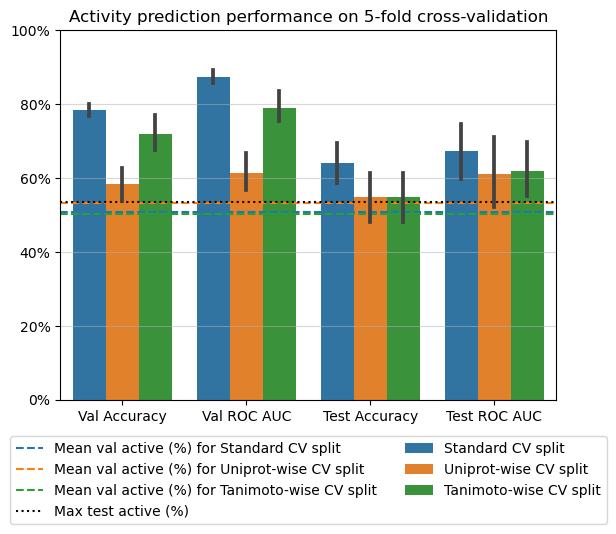

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

n_splits = 5

tmp = report.copy()[[
    'fold', 'group_type',
    'val_acc', 'val_roc_auc', # 'val_precision', 'val_recall', 'val_f1_score',
    'test_acc', 'test_roc_auc', # 'test_precision', 'test_recall', 'test_f1_score',
]]
# Rename columns
tmp.columns = [
    'Fold', 'CV-Groups',
    'Val Accuracy', 'Val ROC AUC', # 'Val Precision', 'Val Recall', 'Val F1 score',
    'Test Accuracy', 'Test ROC AUC', # 'Test Precision', 'Test Recall', 'Test F1 score',
]
# Plot aggregated mean value of all metrics in one bar plot
tmp = tmp.melt(id_vars=['Fold', 'CV-Groups'], var_name='Metric', value_name='Score')
# Rename elements in 'CV-Groups' column
group2name = {
    'random': 'Standard CV split',
    'uniprot': 'Uniprot-wise CV split',
    'tanimoto': 'Tanimoto-wise CV split',
}

tmp['CV-Groups'] = tmp['CV-Groups'].map(group2name)
# Draw one horizontal line for each CV-group representing the max value of inactive PROTACs percentage across the folds
for i, group in enumerate(report['group_type'].unique()):
    # Get the majority class in group_df
    group_df = report[report['group_type'] == group]
    major_col = 'inactive' if group_df['val_inactive_perc'].mean() > 0.5 else active_col
    # plt.axhline(group_df[f'val_{major_col}_perc'].max(), color=f'C{i}', linestyle='-.', label=f'Max val {major_col} (%) for {group2name[group]}')
    plt.axhline(group_df[f'val_{major_col}_perc'].mean(), color=f'C{i}', linestyle='--', label=f'Mean val {major_col} (%) for {group2name[group].split(" (")[0]}')
plt.axhline(report[f'test_{major_col}_perc'].max(), color='black', linestyle=':', label=f'Max test {major_col} (%)')

sns.barplot(data=tmp, x='Metric', y='Score', hue='CV-Groups')

# num_data = len(protac_df[protac_df[active_col].notna()])
# plt.title(f'Activity prediction on {n_splits}-fold cross-validation and separate test set')
plt.title(f'Activity prediction performance on {n_splits}-fold cross-validation')

plt.grid(axis='y', alpha=0.5)
# Set y-axis to end at 1.0
plt.ylim(0, 1.0)
# Make the y-axis as percentage
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.PercentFormatter(1, decimals=0))
# Plot the legend external on the left side of the plot
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Plot the legend below the x-axis, outside the plot, and divided in two columns
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.08), ncol=2)

# Rotate x-axis labels to 90 degrees
# plt.xticks(rotation=90)
# Remove axis labels
plt.xlabel('')
plt.ylabel('')
plt.show()

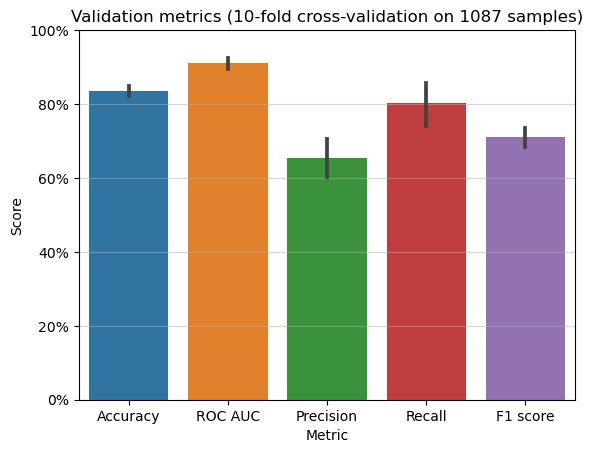

In [ ]:
# Plot aggregated results
import seaborn as sns
import matplotlib.pyplot as plt

for n_splits in [5, 10]:
    val_metrics = pd.read_csv(
        f'../data/results/val_metrics_{n_splits}-splits_ablation.csv'
    )

    tmp = val_metrics.copy()[['fold', 'val_acc', 'val_roc_auc',
                              'val_precision', 'val_recall', 'val_f1_score']]
    # Rename columns
    tmp.columns = ['fold', 'Accuracy', 'ROC AUC',
                   'Precision', 'Recall', 'F1 score']
    # Plot aggregated mean value of all metrics in one bar plot
    tmp = tmp.melt(id_vars='fold', var_name='Metric', value_name='Score')

    sns.barplot(data=tmp, x='Metric', y='Score')

    num_data = len(protac_df[protac_df[active_col].notna()])
    plt.title(
        f'Validation metrics ({n_splits}-fold cross-validation on {num_data} samples)')
    plt.grid(axis='y', alpha=0.5)
    # Set y-axis to end at 1.0
    plt.ylim(0, 1.0)
    # Make the y-axis as percentage
    plt.gca().yaxis.set_major_formatter(
        plt.matplotlib.ticker.PercentFormatter(1, decimals=0),
    )
    plt.show()

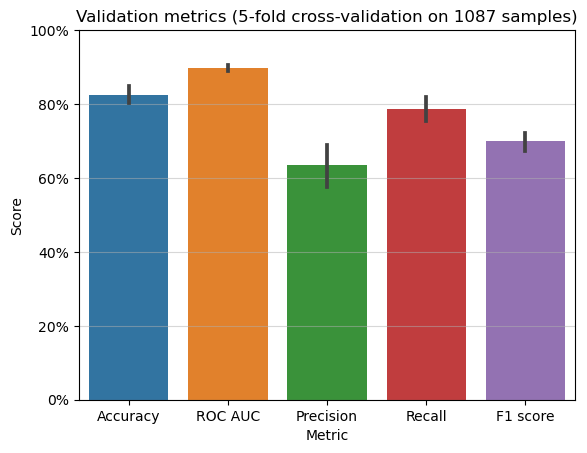

In [ ]:
# Plot aggregated results
import seaborn as sns
import matplotlib.pyplot as plt

n_splits = 5
val_metrics = pd.read_csv(
    f'../data/results/val_metrics_{n_splits}-splits_ablation.csv'
)

tmp = val_metrics.copy()[['fold', 'val_acc', 'val_roc_auc',
                          'val_precision', 'val_recall', 'val_f1_score']]
# Rename columns
tmp.columns = ['fold', 'Accuracy', 'ROC AUC',
               'Precision', 'Recall', 'F1 score']
# Plot aggregated mean value of all metrics in one bar plot
tmp = tmp.melt(id_vars='fold', var_name='Metric', value_name='Score')

sns.barplot(data=tmp, x='Metric', y='Score')


num_data = len(protac_df[protac_df[active_col].notna()])
plt.title(
    f'Validation metrics ({n_splits}-fold cross-validation on {num_data} samples)')
plt.grid(axis='y', alpha=0.5)
# Set y-axis to end at 1.0
plt.ylim(0, 1.0)
# Make the y-axis as percentage
plt.gca().yaxis.set_major_formatter(
    plt.matplotlib.ticker.PercentFormatter(1, decimals=0))
plt.show()

## Ablation Studies

In [ ]:
# Random split the data into train and test
from sklearn.model_selection import train_test_split

train_df, unlabeled_df = train_test_split(
    protac_df[protac_df[active_col].notna()], test_size=0.2, random_state=42,
)
model, trainer, val_metric = train_model(
    train_df, val_df, disabled_embeddings=['poi', 'e3', 'cell'],
)
val_metric

c:\Users\ste\Anaconda2\envs\env-thesis\Lib\site-packages\imblearn\over_sampling\_smote\base.py:345: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type       | Params
------------------------------------------
0 | smiles_emb | Linear     | 787 K 
1 | fc1        | Linear     | 590 K 
2 | fc2        | Linear     | 590 K 
3 | fc3        | Linear     | 769   
4 | dropout    | Dropout    | 0     
5 | metrics    | ModuleDict | 0     
------------------------------------------
2.0 M     Trainable params
0         Non-trainable params
2.0 M     Total params
7.877     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

c:\Users\ste\Anaconda2\envs\env-thesis\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:432: PossibleUserWarning: The dataloader, val_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
c:\Users\ste\Anaconda2\envs\env-thesis\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:432: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Metric train_loss improved. New best score: 0.679


Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Monitored metric train_loss did not improve in the last 10 records. Best score: 0.679. Signaling Trainer to stop.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Validation: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃  Runningstage.validating  ┃                           ┃
┃          metric           ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│          val_acc          │    0.8894008994102478     │
│       val_f1_score        │    0.8285714387893677     │
│       val_hp_metric       │    0.8894008994102478     │
│         val_loss          │    0.22978010773658752    │
│       val_opt_score       │    1.7179722785949707     │
│       val_precision       │    0.7250000238418579     │
│        val_recall         │    0.9666666388511658     │
│        val_roc_auc        │    0.9700636863708496     │
└───────────────────────────┴───────────────────────────┘

{'val_loss': 0.22978010773658752,
 'val_acc': 0.8894008994102478,
 'val_f1_score': 0.8285714387893677,
 'val_hp_metric': 0.8894008994102478,
 'val_opt_score': 1.7179722785949707,
 'val_precision': 0.7250000238418579,
 'val_recall': 0.9666666388511658,
 'val_roc_auc': 0.9700636863708496}

In [ ]:
# K-fold cross-validation loop
import os
from sklearn.model_selection import KFold

n_splits = 5
embeddings_to_disable = [
    # ['poi'],
    # ['e3'],
    # ['cell'],
    # ['smiles'],
    ['poi', 'e3', 'cell'],
]

csv_filepath = f'../data/results/val_metrics_{n_splits}-splits_ablation.csv'
if os.path.exists(csv_filepath):
    tmp = pd.read_csv(csv_filepath)
else:
    tmp = pd.DataFrame()

kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
val_metrics = []
tmp = protac_df[protac_df[active_col].notna()]
for k, (train_index, val_index) in enumerate(kf.split(tmp)):
    train_df = tmp.iloc[train_index]
    val_df = tmp.iloc[val_index]
    for disabled_embeddings in embeddings_to_disable:
        print(f'Fold {k}, disabled embeddings: {disabled_embeddings}')
        model, trainer, val_metric = train_model(
            train_df, val_df, disabled_embeddings,
        )
        val_metric['fold'] = k
        val_metric['disabled_embeddings'] = ' '.join(disabled_embeddings)
        val_metrics.append(val_metric)
val_metrics = pd.DataFrame(val_metrics)

val_metrics = pd.concat([tmp, val_metrics])

val_metrics.to_csv(
    f'../data/results/val_metrics_{n_splits}-splits_ablation.csv',
    index=False
)
val_metrics.aggregate(['mean', 'std'])

Fold 0, disabled embeddings: ['poi', 'e3', 'cell']


c:\Users\ste\Anaconda2\envs\env-thesis\Lib\site-packages\imblearn\over_sampling\_smote\base.py:345: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type       | Params
------------------------------------------
0 | smiles_emb | Linear     | 787 K 
1 | fc1        | Linear     | 590 K 
2 | fc2        | Linear     | 590 K 
3 | fc3        | Linear     | 769   
4 | dropout    | Dropout    | 0     
5 | metrics    | ModuleDict | 0     
------------------------------------------
2.0 M     Trainable params
0         Non-trainable params
2.0 M     Total params
7.877     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

c:\Users\ste\Anaconda2\envs\env-thesis\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:432: PossibleUserWarning: The dataloader, val_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
c:\Users\ste\Anaconda2\envs\env-thesis\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:432: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Metric train_loss improved. New best score: 0.681


Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Monitored metric train_loss did not improve in the last 10 records. Best score: 0.681. Signaling Trainer to stop.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Validation: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃  Runningstage.validating  ┃                           ┃
┃          metric           ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│          val_acc          │    0.8256880640983582     │
│       val_f1_score        │    0.6984127163887024     │
│       val_hp_metric       │    0.8256880640983582     │
│         val_loss          │    0.43253543972969055    │
│       val_opt_score       │    1.5241007804870605     │
│       val_precision       │    0.6666666865348816     │
│        val_recall         │    0.7333333492279053     │
│        val_roc_auc        │    0.8918248414993286     │
└───────────────────────────┴───────────────────────────┘

Fold 1, disabled embeddings: ['poi', 'e3', 'cell']


c:\Users\ste\Anaconda2\envs\env-thesis\Lib\site-packages\imblearn\over_sampling\_smote\base.py:345: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type       | Params
------------------------------------------
0 | smiles_emb | Linear     | 787 K 
1 | fc1        | Linear     | 590 K 
2 | fc2        | Linear     | 590 K 
3 | fc3        | Linear     | 769   
4 | dropout    | Dropout    | 0     
5 | metrics    | ModuleDict | 0     
------------------------------------------
2.0 M     Trainable params
0         Non-trainable params
2.0 M     Total params
7.877     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

c:\Users\ste\Anaconda2\envs\env-thesis\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:432: PossibleUserWarning: The dataloader, val_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
c:\Users\ste\Anaconda2\envs\env-thesis\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:432: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Metric train_loss improved. New best score: 0.681


Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Monitored metric train_loss did not improve in the last 10 records. Best score: 0.681. Signaling Trainer to stop.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Validation: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃  Runningstage.validating  ┃                           ┃
┃          metric           ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│          val_acc          │    0.8302752375602722     │
│       val_f1_score        │     0.678260862827301     │
│       val_hp_metric       │    0.8302752375602722     │
│         val_loss          │    0.42626988887786865    │
│       val_opt_score       │    1.5085361003875732     │
│       val_precision       │    0.6393442749977112     │
│        val_recall         │    0.7222222089767456     │
│        val_roc_auc        │     0.878669798374176     │
└───────────────────────────┴───────────────────────────┘

Fold 2, disabled embeddings: ['poi', 'e3', 'cell']


c:\Users\ste\Anaconda2\envs\env-thesis\Lib\site-packages\imblearn\over_sampling\_smote\base.py:345: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type       | Params
------------------------------------------
0 | smiles_emb | Linear     | 787 K 
1 | fc1        | Linear     | 590 K 
2 | fc2        | Linear     | 590 K 
3 | fc3        | Linear     | 769   
4 | dropout    | Dropout    | 0     
5 | metrics    | ModuleDict | 0     
------------------------------------------
2.0 M     Trainable params
0         Non-trainable params
2.0 M     Total params
7.877     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

c:\Users\ste\Anaconda2\envs\env-thesis\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:432: PossibleUserWarning: The dataloader, val_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
c:\Users\ste\Anaconda2\envs\env-thesis\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:432: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Metric train_loss improved. New best score: 0.681


Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Monitored metric train_loss did not improve in the last 10 records. Best score: 0.681. Signaling Trainer to stop.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Validation: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃  Runningstage.validating  ┃                           ┃
┃          metric           ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│          val_acc          │    0.8018433451652527     │
│       val_f1_score        │    0.6814814805984497     │
│       val_hp_metric       │    0.8018433451652527     │
│         val_loss          │    0.44118818640708923    │
│       val_opt_score       │    1.4833247661590576     │
│       val_precision       │    0.5822784900665283     │
│        val_recall         │    0.8214285969734192     │
│        val_roc_auc        │    0.8986246585845947     │
└───────────────────────────┴───────────────────────────┘

Fold 3, disabled embeddings: ['poi', 'e3', 'cell']


c:\Users\ste\Anaconda2\envs\env-thesis\Lib\site-packages\imblearn\over_sampling\_smote\base.py:345: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type       | Params
------------------------------------------
0 | smiles_emb | Linear     | 787 K 
1 | fc1        | Linear     | 590 K 
2 | fc2        | Linear     | 590 K 
3 | fc3        | Linear     | 769   
4 | dropout    | Dropout    | 0     
5 | metrics    | ModuleDict | 0     
------------------------------------------
2.0 M     Trainable params
0         Non-trainable params
2.0 M     Total params
7.877     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

c:\Users\ste\Anaconda2\envs\env-thesis\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:432: PossibleUserWarning: The dataloader, val_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
c:\Users\ste\Anaconda2\envs\env-thesis\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:432: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Metric train_loss improved. New best score: 0.681


Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Monitored metric train_loss did not improve in the last 10 records. Best score: 0.681. Signaling Trainer to stop.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Validation: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃  Runningstage.validating  ┃                           ┃
┃          metric           ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│          val_acc          │    0.7972350120544434     │
│       val_f1_score        │    0.6271186470985413     │
│       val_hp_metric       │    0.7972350120544434     │
│         val_loss          │    0.4882689416408539     │
│       val_opt_score       │    1.4243535995483398     │
│       val_precision       │    0.5441176295280457     │
│        val_recall         │    0.7400000095367432     │
│        val_roc_auc        │    0.8674850463867188     │
└───────────────────────────┴───────────────────────────┘

Fold 4, disabled embeddings: ['poi', 'e3', 'cell']


c:\Users\ste\Anaconda2\envs\env-thesis\Lib\site-packages\imblearn\over_sampling\_smote\base.py:345: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type       | Params
------------------------------------------
0 | smiles_emb | Linear     | 787 K 
1 | fc1        | Linear     | 590 K 
2 | fc2        | Linear     | 590 K 
3 | fc3        | Linear     | 769   
4 | dropout    | Dropout    | 0     
5 | metrics    | ModuleDict | 0     
------------------------------------------
2.0 M     Trainable params
0         Non-trainable params
2.0 M     Total params
7.877     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

c:\Users\ste\Anaconda2\envs\env-thesis\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:432: PossibleUserWarning: The dataloader, val_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
c:\Users\ste\Anaconda2\envs\env-thesis\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:432: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Metric train_loss improved. New best score: 0.679


Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Monitored metric train_loss did not improve in the last 10 records. Best score: 0.679. Signaling Trainer to stop.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Validation: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃  Runningstage.validating  ┃                           ┃
┃          metric           ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│          val_acc          │    0.8018433451652527     │
│       val_f1_score        │    0.6861313581466675     │
│       val_hp_metric       │    0.8018433451652527     │
│         val_loss          │    0.46606215834617615    │
│       val_opt_score       │    1.4879746437072754     │
│       val_precision       │    0.6103895902633667     │
│        val_recall         │    0.7833333611488342     │
│        val_roc_auc        │    0.8800424337387085     │
└───────────────────────────┴───────────────────────────┘

C:\Users\ste\AppData\Local\Temp\ipykernel_9048\4021510138.py:42: FutureWarning: ['Uniprot', 'Smiles', 'E3 Ligase', 'InChI', 'InChI Key', 'Cell Type', 'Article DOI', 'Comments', 'Database', 'Molecular Formula', 'Target', 'PDB', 'Name', 'Assay (DC50/Dmax)', 'Target (Parsed)', 'POI Sequence', 'E3 Ligase Uniprot', 'E3 Ligase Sequence', 'Cell Line Identifier', 'disabled_embeddings'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  val_metrics.aggregate(['mean', 'std'])


Compound ID  Molecular Weight  Heavy Atom Count  Ring Count  \
mean  1309.798528        984.393343         70.029439    7.385465   
std    931.846640        165.936373         11.294283    1.368378   

      Rotatable Bond Count  Topological Polar Surface Area  \
mean             20.139834                      220.732282   
std               6.379550                       38.692208   

      Hydrogen Bond Acceptor Count  Hydrogen Bond Donor Count  \
mean                     13.651334                   4.467341   
std                       2.872499                   1.429301   

      Treatment Time (h)    DC50 (nM)  ...    XLogP3  val_loss   val_acc  \
mean           18.154774  2396.467627  ...  5.260886  0.450865  0.811377   
std            10.410593  8579.934090  ...  2.418567  0.025810  0.015360   

      val_f1_score  val_hp_metric  val_opt_score  val_precision  val_recall  \
mean      0.674281       0.811377       1.485658       0.608559    0.760064   
std       0.027453       0.015360       0.037981       0.047883    0.041401   

      val_roc_auc      fold  
mean     0.883329  2.000000  
std      0.012142  1.581139  

[2 rows x 24 columns]

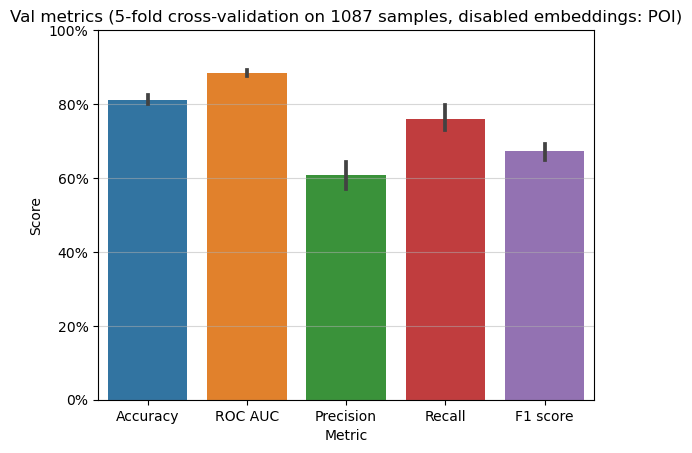

In [ ]:
# Plot aggregated results
import seaborn as sns
import matplotlib.pyplot as plt

val_metrics = pd.read_csv(
    f'../data/results/val_metrics_{n_splits}-splits_ablation.csv'
)

for disabled_embeddings in embeddings_to_disable:
    tmp = val_metrics[val_metrics['disabled_embeddings']
                      == ' '.join(disabled_embeddings)].copy()
    tmp = tmp[['fold', 'val_acc', 'val_roc_auc',
               'val_precision', 'val_recall', 'val_f1_score']]
    # Rename columns
    tmp.columns = ['fold', 'Accuracy', 'ROC AUC',
                   'Precision', 'Recall', 'F1 score']
    # Plot aggregated mean value of all metrics in one bar plot
    tmp = tmp.melt(id_vars='fold', var_name='Metric', value_name='Score')
    sns.barplot(data=tmp, x='Metric', y='Score')

    num_data = len(protac_df[protac_df[active_col].notna()])
    plt.title(
        f'Val metrics ({n_splits}-fold cross-validation on {num_data} samples, disabled embeddings: {disabled_embeddings[0].upper()})')
    plt.grid(axis='y', alpha=0.5)
    # Set y-axis to end at 1.0
    plt.ylim(0, 1.0)
    # Make the y-axis as percentage
    plt.gca().yaxis.set_major_formatter(
        plt.matplotlib.ticker.PercentFormatter(1, decimals=0))
    plt.show()

## Psuedo-Label Training

In [ ]:
from copy import copy

oracle_model = copy(model)
print(
    f'Number of parameters: {sum(p.numel() for p in oracle_model.parameters()):,}')

Number of parameters: 5,903,617


In [ ]:
def get_oracle_predictions(model, trainer, unlabeled_df):
    test_ds = PROTAC_Dataset(
        unlabeled_df,
        protein_embeddings,
        cell2embedding,
        smiles2fp,
    )
    test_dl = DataLoader(test_ds, batch_size=32, shuffle=False)
    test_preds = trainer.predict(model, test_dl)
    test_preds = torch.vstack(test_preds).numpy().flatten()
    unlabeled_df[active_col] = [
        is_active(p, pos_threshold=0.97, neg_threshold=0.001) for p in test_preds]
    return unlabeled_df


train_df, val_df = train_test_split(
    protac_df[protac_df[active_col].notna()], test_size=0.2, random_state=42)
unlabeled_df = protac_df[protac_df[active_col].isna()]

val_metrics = []
for i in range(5):
    print(f'Oracle iteration {i}')
    model, trainer, metrics = train_model(train_df, val_df)
    val_metrics.append(metrics)
    unlabeled_df = get_oracle_predictions(model, trainer, unlabeled_df)
    # Update the training set
    train_df = pd.concat([
        train_df,
        unlabeled_df[unlabeled_df[active_col].notna()]], axis=0).drop_duplicates()
    display(metrics)

Oracle iteration 0


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type       | Params
------------------------------------------
0 | poi_emb    | Linear     | 787 K 
1 | e3_emb     | Linear     | 787 K 
2 | cell_emb   | Linear     | 590 K 
3 | smiles_emb | Linear     | 787 K 
4 | fc1        | Linear     | 2.4 M 
5 | fc2        | Linear     | 590 K 
6 | fc3        | Linear     | 769   
7 | dropout    | Dropout    | 0     
8 | metrics    | ModuleDict | 0     
------------------------------------------
5.9 M     Trainable params
0         Non-trainable params
5.9 M     Total params
23.614    Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Metric train_loss improved. New best score: 0.681


Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Validation: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃  Runningstage.validating  ┃                           ┃
┃          metric           ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│          val_acc          │    0.8119266033172607     │
│       val_f1_score        │    0.6611570119857788     │
│       val_hp_metric       │    0.8119266033172607     │
│         val_loss          │    0.36858928203582764    │
│       val_opt_score       │    1.4730836153030396     │
│       val_precision       │    0.6557376980781555     │
│        val_recall         │    0.6666666865348816     │
│        val_roc_auc        │    0.8914557695388794     │
└───────────────────────────┴───────────────────────────┘

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

[{'val_loss': 0.36858928203582764,
  'val_acc': 0.8119266033172607,
  'val_f1_score': 0.6611570119857788,
  'val_hp_metric': 0.8119266033172607,
  'val_opt_score': 1.4730836153030396,
  'val_precision': 0.6557376980781555,
  'val_recall': 0.6666666865348816,
  'val_roc_auc': 0.8914557695388794}]

Oracle iteration 1


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type       | Params
------------------------------------------
0 | poi_emb    | Linear     | 787 K 
1 | e3_emb     | Linear     | 787 K 
2 | cell_emb   | Linear     | 590 K 
3 | smiles_emb | Linear     | 787 K 
4 | fc1        | Linear     | 2.4 M 
5 | fc2        | Linear     | 590 K 
6 | fc3        | Linear     | 769   
7 | dropout    | Dropout    | 0     
8 | metrics    | ModuleDict | 0     
------------------------------------------
5.9 M     Trainable params
0         Non-trainable params
5.9 M     Total params
23.614    Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Metric train_loss improved. New best score: 0.680


Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Validation: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃  Runningstage.validating  ┃                           ┃
┃          metric           ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│          val_acc          │    0.8119266033172607     │
│       val_f1_score        │    0.7284768223762512     │
│       val_hp_metric       │    0.8119266033172607     │
│         val_loss          │    0.4363510012626648     │
│       val_opt_score       │    1.5404033660888672     │
│       val_precision       │    0.6043956279754639     │
│        val_recall         │    0.9166666865348816     │
│        val_roc_auc        │    0.8967299461364746     │
└───────────────────────────┴───────────────────────────┘

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

[{'val_loss': 0.4363510012626648,
  'val_acc': 0.8119266033172607,
  'val_f1_score': 0.7284768223762512,
  'val_hp_metric': 0.8119266033172607,
  'val_opt_score': 1.5404033660888672,
  'val_precision': 0.6043956279754639,
  'val_recall': 0.9166666865348816,
  'val_roc_auc': 0.8967299461364746}]

Oracle iteration 2


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type       | Params
------------------------------------------
0 | poi_emb    | Linear     | 787 K 
1 | e3_emb     | Linear     | 787 K 
2 | cell_emb   | Linear     | 590 K 
3 | smiles_emb | Linear     | 787 K 
4 | fc1        | Linear     | 2.4 M 
5 | fc2        | Linear     | 590 K 
6 | fc3        | Linear     | 769   
7 | dropout    | Dropout    | 0     
8 | metrics    | ModuleDict | 0     
------------------------------------------
5.9 M     Trainable params
0         Non-trainable params
5.9 M     Total params
23.614    Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Metric train_loss improved. New best score: 0.678


Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Validation: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃  Runningstage.validating  ┃                           ┃
┃          metric           ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│          val_acc          │    0.8486238718032837     │
│       val_f1_score        │    0.7441860437393188     │
│       val_hp_metric       │    0.8486238718032837     │
│         val_loss          │    0.3814685344696045     │
│       val_opt_score       │    1.5928099155426025     │
│       val_precision       │     0.695652186870575     │
│        val_recall         │     0.800000011920929     │
│        val_roc_auc        │    0.9017932415008545     │
└───────────────────────────┴───────────────────────────┘

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

[{'val_loss': 0.3814685344696045,
  'val_acc': 0.8486238718032837,
  'val_f1_score': 0.7441860437393188,
  'val_hp_metric': 0.8486238718032837,
  'val_opt_score': 1.5928099155426025,
  'val_precision': 0.695652186870575,
  'val_recall': 0.800000011920929,
  'val_roc_auc': 0.9017932415008545}]

Oracle iteration 3


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type       | Params
------------------------------------------
0 | poi_emb    | Linear     | 787 K 
1 | e3_emb     | Linear     | 787 K 
2 | cell_emb   | Linear     | 590 K 
3 | smiles_emb | Linear     | 787 K 
4 | fc1        | Linear     | 2.4 M 
5 | fc2        | Linear     | 590 K 
6 | fc3        | Linear     | 769   
7 | dropout    | Dropout    | 0     
8 | metrics    | ModuleDict | 0     
------------------------------------------
5.9 M     Trainable params
0         Non-trainable params
5.9 M     Total params
23.614    Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Metric train_loss improved. New best score: 0.665


Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Validation: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃  Runningstage.validating  ┃                           ┃
┃          metric           ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│          val_acc          │    0.8486238718032837     │
│       val_f1_score        │    0.7591241002082825     │
│       val_hp_metric       │    0.8486238718032837     │
│         val_loss          │    0.3775690495967865     │
│       val_opt_score       │     1.607748031616211     │
│       val_precision       │    0.6753246784210205     │
│        val_recall         │    0.8666666746139526     │
│        val_roc_auc        │    0.8989450931549072     │
└───────────────────────────┴───────────────────────────┘

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

[{'val_loss': 0.3775690495967865,
  'val_acc': 0.8486238718032837,
  'val_f1_score': 0.7591241002082825,
  'val_hp_metric': 0.8486238718032837,
  'val_opt_score': 1.607748031616211,
  'val_precision': 0.6753246784210205,
  'val_recall': 0.8666666746139526,
  'val_roc_auc': 0.8989450931549072}]

Oracle iteration 4


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type       | Params
------------------------------------------
0 | poi_emb    | Linear     | 787 K 
1 | e3_emb     | Linear     | 787 K 
2 | cell_emb   | Linear     | 590 K 
3 | smiles_emb | Linear     | 787 K 
4 | fc1        | Linear     | 2.4 M 
5 | fc2        | Linear     | 590 K 
6 | fc3        | Linear     | 769   
7 | dropout    | Dropout    | 0     
8 | metrics    | ModuleDict | 0     
------------------------------------------
5.9 M     Trainable params
0         Non-trainable params
5.9 M     Total params
23.614    Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Metric train_loss improved. New best score: 0.665


Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Validation: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃  Runningstage.validating  ┃                           ┃
┃          metric           ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│          val_acc          │    0.8348624110221863     │
│       val_f1_score        │          0.71875          │
│       val_hp_metric       │    0.8348624110221863     │
│         val_loss          │    0.38852933049201965    │
│       val_opt_score       │     1.553612470626831     │
│       val_precision       │    0.6764705777168274     │
│        val_recall         │    0.7666666507720947     │
│        val_roc_auc        │    0.8900843858718872     │
└───────────────────────────┴───────────────────────────┘

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

[{'val_loss': 0.38852933049201965,
  'val_acc': 0.8348624110221863,
  'val_f1_score': 0.71875,
  'val_hp_metric': 0.8348624110221863,
  'val_opt_score': 1.553612470626831,
  'val_precision': 0.6764705777168274,
  'val_recall': 0.7666666507720947,
  'val_roc_auc': 0.8900843858718872}]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

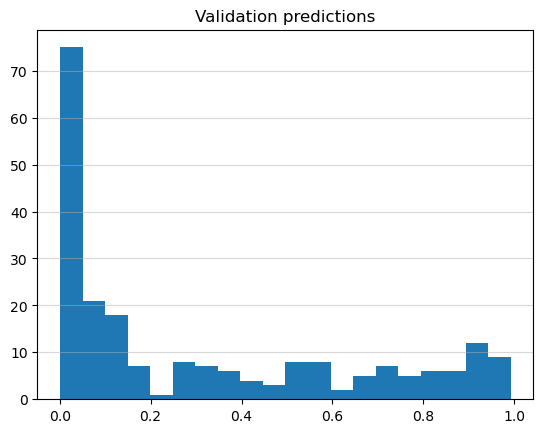

In [ ]:
val_dl = DataLoader(val_ds, batch_size=32, shuffle=False)
val_preds = trainer.predict(model, val_dl)
val_preds = torch.vstack(val_preds).numpy().flatten()

# Plot histogram of predictions
plt.hist(val_preds, bins=20)
plt.title('Validation predictions')
plt.grid(axis='y', alpha=0.5)
plt.show()